<a href="https://colab.research.google.com/github/Balakartigeyan/operational-analyst--production/blob/main/complet_prodution_cycle%20UPDATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the provided process data from '/content/ALL Process.csv' to generate comprehensive operational insights for Vale Malaysia operations. This includes loading and inspecting the data, processing timestamps, assessing data quality (anomalies), cleaning and preprocessing the data, classifying operational states (Running, Idle, Shutdown), analyzing throughput and utilization, quantifying downtime, evaluating import vs. export imbalance, assessing blending stability, analyzing motor current behavior and correlation with throughput/speed, quantifying no-load energy waste, detecting abnormal motor behavior, and identifying advanced operational issues like belt slip, increased resistance, unstable operations, and lost production. Finally, summarize all key findings and provide actionable recommendations to improve operational efficiency, reliability, reduce waste, and mitigate identified risks.

## Data Loading and Initial Inspection

### Subtask:
Load the provided CSV file '/content/ALL Process.csv' into a pandas DataFrame. Perform an initial inspection using .head(), .info(), and .describe() to understand the data's structure, data types, and basic statistical summary. This step will also check for initial missing values.


**Reasoning**:
To begin, I will import the pandas library, load the CSV file into a DataFrame, and then use `.head()`, `.info()`, and `.describe()` to perform an initial inspection of the data's structure, data types, and statistical summary, as requested by the subtask.



In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print("DataFrame loaded successfully. Displaying the first 5 rows:")
# Display the first few rows of the DataFrame
print(df.head())

print("\n--- DataFrame Info ---")
# Print a concise summary of the DataFrame
print(df.info())

print("\n--- Descriptive Statistics ---")
# Generate descriptive statistics of the DataFrame
print(df.describe())

ParserError: Error tokenizing data. C error: Expected 3 fields in line 48235, saw 5


**Reasoning**:
The previous code failed because of a `ParserError` indicating an inconsistent number of fields in a specific line. To handle such malformed rows and allow the data to load, I will re-attempt reading the CSV file using `engine='python'` for better parsing flexibility and `on_bad_lines='skip'` to ignore any problematic lines.



In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame, handling bad lines by skipping them
# Using 'engine='python'' provides more robust parsing for irregular files.
df = pd.read_csv(file_path, on_bad_lines='skip', engine='python')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
# Display the first few rows of the DataFrame
print(df.head())

print("\n--- DataFrame Info ---")
# Print a concise summary of the DataFrame
print(df.info())

print("\n--- Descriptive Statistics ---")
# Generate descriptive statistics of the DataFrame
print(df.describe())

DataFrame loaded successfully. Displaying the first 5 rows:
                                   Data Source                        Time  \
0  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT  2025-12-30 11:18:05.998001   
1  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT  2025-12-30 11:18:10.998001   
2  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT  2025-12-30 11:18:15.998001   
3  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT   2025-12-30 11:18:20.98201   
4  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT   2025-12-30 11:18:25.98201   

         Value  
0  5711.548340  
1  5712.270996  
2  5734.144043  
3  5777.695801  
4  5799.940918  

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154274 entries, 0 to 154273
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Data Source  154274 non-null  object 
 1   Time         154273 non-null  object 
 2   Value        154270 non-null  float64
dtypes: float64(1), 

## Timestamp Processing and Unit Identification

### Subtask:
Convert the 'Time' column to datetime objects. Determine the predominant sampling interval and identify any irregularities. Infer or confirm the units for all major tags (e.g., TPH for FIT, Amps for Current, m/s for Speed, arbitrary units for Vibration/VIT, WQIT, QQIT) based on the tag names and provided context.


**Reasoning**:
The first step is to convert the 'Time' column to datetime objects and handle any unparseable values, as a valid timestamp is critical for time-series analysis.



In [ ]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df.dropna(subset=['Time'], inplace=True)

print("Time column converted to datetime and rows with NaT in 'Time' dropped.")
print(df.head())

Time column converted to datetime and rows with NaT in 'Time' dropped.
                                   Data Source                       Time  \
0  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:05.998001   
1  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:10.998001   
2  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:15.998001   
3  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:20.982010   
4  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:25.982010   

         Value  
0  5711.548340  
1  5712.270996  
2  5734.144043  
3  5777.695801  
4  5799.940918  


**Reasoning**:
Now that the 'Time' column is properly formatted, the next step is to extract meaningful 'Tag Name' from the 'Data Source' column using a regular expression and then sort the DataFrame by this new 'Tag_Name' and 'Time' to prepare for sampling interval calculation.



In [ ]:
import re

# Extract unique 'Tag Name' from 'Data Source'
# This regex captures the last segment after a backslash or the full string if no backslash
df['Tag_Name'] = df['Data Source'].apply(lambda x: re.search(r'[^\\_]+$', x).group(0) if re.search(r'[^\\_]+$', x) else x)

# Sort the DataFrame by 'Tag_Name' and 'Time'
df.sort_values(by=['Tag_Name', 'Time'], inplace=True)

print("Extracted 'Tag_Name' and sorted the DataFrame. Displaying the first 5 rows with new 'Tag_Name':")
print(df.head())

Extracted 'Tag_Name' and sorted the DataFrame. Displaying the first 5 rows with new 'Tag_Name':
                                              Data Source  \
16558   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
141452  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
16559   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
141453  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
16560   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   

                             Time     Value Tag_Name  
16558  2025-12-30 11:18:05.998001  4.379838       01  
141452 2025-12-30 11:18:05.998001  4.379838       01  
16559  2025-12-30 11:18:10.998001  4.375381       01  
141453 2025-12-30 11:18:10.998001  4.375381       01  
16560  2025-12-30 11:18:15.998001  4.891637       01  


**Reasoning**:
To determine the sampling intervals, I will calculate the time difference between consecutive measurements for each unique 'Tag_Name' by grouping the DataFrame and applying the `.diff()` method to the 'Time' column, storing the result in a new 'Time_Diff' column.



In [ ]:
df['Time_Diff'] = df.groupby('Tag_Name')['Time'].diff()

print("Calculated 'Time_Diff' for each tag. Displaying the first 5 rows with new 'Time_Diff':")
print(df.head())

Calculated 'Time_Diff' for each tag. Displaying the first 5 rows with new 'Time_Diff':
                                              Data Source  \
16558   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
141452  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
16559   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
141453  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
16560   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   

                             Time     Value Tag_Name       Time_Diff  
16558  2025-12-30 11:18:05.998001  4.379838       01             NaT  
141452 2025-12-30 11:18:05.998001  4.379838       01 0 days 00:00:00  
16559  2025-12-30 11:18:10.998001  4.375381       01 0 days 00:00:05  
141453 2025-12-30 11:18:10.998001  4.375381       01 0 days 00:00:00  
16560  2025-12-30 11:18:15.998001  4.891637       01 0 days 00:00:05  


**Reasoning**:
To analyze the predominant sampling interval and identify irregularities, I will first convert the 'Time_Diff' column to total seconds and then calculate descriptive statistics (mean, median, mode) and value counts for each 'Tag_Name'. This will help in understanding the typical sampling rate and detecting any deviations.



In [ ]:
df['Time_Diff_Seconds'] = df['Time_Diff'].dt.total_seconds()

sampling_intervals = {}
for tag in df['Tag_Name'].unique():
    tag_data = df[df['Tag_Name'] == tag]
    time_diffs = tag_data['Time_Diff_Seconds'].dropna()

    if not time_diffs.empty:
        # Predominant sampling interval (mode)
        mode_diff = time_diffs.mode()
        if not mode_diff.empty:
            sampling_intervals[tag] = {
                'predominant_interval_seconds': mode_diff[0],
                'mean_interval_seconds': time_diffs.mean(),
                'median_interval_seconds': time_diffs.median(),
                'value_counts': time_diffs.value_counts(normalize=True).head()
            }
        else:
            sampling_intervals[tag] = {
                'mean_interval_seconds': time_diffs.mean(),
                'median_interval_seconds': time_diffs.median(),
                'value_counts': time_diffs.value_counts(normalize=True).head()
            }
    else:
        sampling_intervals[tag] = {'message': 'No time differences to analyze'}

print("Sampling intervals and their statistics for each tag:")
for tag, data in sampling_intervals.items():
    print(f"\nTag Name: {tag}")
    for key, value in data.items():
        print(f"  {key}: {value}")


Sampling intervals and their statistics for each tag:

Tag Name: 01
  predominant_interval_seconds: 0.0
  mean_interval_seconds: 15.097087299923114
  median_interval_seconds: 0.0
  value_counts: Time_Diff_Seconds
0.000000     0.500035
5.000000     0.099252
59.994995    0.036276
59.995010    0.013560
59.979004    0.012581
Name: proportion, dtype: float64

Tag Name: Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed
  predominant_interval_seconds: 5.0
  mean_interval_seconds: 1531.3844576641875
  median_interval_seconds: 9.995011
  value_counts: Time_Diff_Seconds
5.000000     0.244279
10.000000    0.090961
15.000000    0.032037
5.014999     0.026316
5.015991     0.017735
Name: proportion, dtype: float64

Tag Name: FIT
  predominant_interval_seconds: 0.0
  mean_interval_seconds: 3.065865716475452
  median_interval_seconds: 0.014999
  value_counts: Time_Diff_Seconds
0.000000    0.493009
5.000000    0.139997
4.000000    0.042826
1.000000    0.032143
4.984009    0.019416
Name: proporti

### Analysis of Sampling Intervals and Inferred Units

The sampling interval analysis revealed significant variations across different tags. Some tags, like **'01'**, **'FIT'**, **'IIT'**, **'QQIT'**, and **'VIT'**, show a predominant interval of 0 seconds, with a high proportion of occurrences. This suggests that these tags might be recording multiple values at the same timestamp, which could indicate data logging issues or specific sampling strategies where values are updated rapidly without a strict time-based interval. Their mean and median intervals also vary widely.

Conversely, tags such as **'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed'**, **'HC - SE1040ML02-SE1-SG01-PL13|Current'**, **'HC - SE1040ML02-SE1-SG01-PL14|Current'**, **'HC - SE1040ML02-SE1-SG01-PL15|Current'**, **'Motor - TR1010ML11-M4|Current'**, and most **'Vibration Sensor'** tags show a predominant sampling interval of 5 or 10 seconds. This indicates a more regular, time-based sampling pattern for these sensors.

Two tags, **'TR1050ML-PL13|Current'** and **'pisystem-malaysi01-PL14|Current'**, had no time differences to analyze, suggesting they might have only a single entry or data integrity issues that prevented `Time_Diff` calculation.

---

### Inferred Units for Major Tags:

Based on the tag names and general industry conventions, the following units are inferred for the 'Value' column:

*   **FIT (Flow Indicator Totalizer)**: Typically represents **Tons Per Hour (TPH)** or **cubic meters per hour (m³/hr)** for flow rates.
*   **HC - ...|Current** (e.g., 'HC - SE1040ML02-SE1-SG01-PL13|Current'): Implies electrical **Amperes (Amps)**.
*   **Motor - ...|Current** (e.g., 'Motor - TR1010ML11-M4|Current'): Implies electrical **Amperes (Amps)**.
*   **Belt Scale Speed Sensor - ...|Speed**: Likely represents **meters per second (m/s)** or **feet per minute (ft/min)** for belt speed.
*   **Vibration Sensor - ...|Vibration**: The unit for vibration can vary (e.g., **mm/s, g's, in/s**), but without more context, it's considered an **arbitrary unit** of vibration magnitude.
*   **IIT**: Typically **Incline/Tilt**. Could be **degrees** or a relative **percentage**.
*   **QQIT**: Often **Quantity Quality Indication Totalizer**. Considered an **arbitrary unit** for quality or quantity index.
*   **VIT**: Often **Vibration Indication Totalizer** or **Vertical Inclination Totalizer**. Considered an **arbitrary unit**.
*   **01**: This tag name is too generic to infer a specific unit and will be treated as an **arbitrary unit**.


## Data Quality Assessment (Anomalies)

### Subtask:
Detect missing values, spikes, flatlines, and sensor dropouts across all data sources. This includes identifying periods of zero throughput that do not necessarily indicate shutdown, and flatline motor current that may indicate sensor failure. Visualize representative tags to confirm these anomalies.


**Reasoning**:
To begin the data quality assessment, I will calculate the percentage of missing values in the 'Value' column for each unique 'Tag_Name' as a crucial first step in understanding data completeness.



In [ ]:
missing_values_by_tag = df.groupby('Tag_Name')['Value'].apply(lambda x: x.isnull().sum() / len(x) * 100)

print("Percentage of missing values in 'Value' column per Tag_Name:")
print(missing_values_by_tag[missing_values_by_tag > 0])

Percentage of missing values in 'Value' column per Tag_Name:
Series([], Name: Value, dtype: float64)


**Reasoning**:
To identify spikes, I will calculate a rolling median and standard deviation for each 'Tag_Name' and flag data points that deviate more than 3 standard deviations from the rolling median. This will be done by grouping the DataFrame by 'Tag_Name' to apply the rolling calculations correctly.



In [ ]:
window_size = 5
def detect_spikes(series):
    rolling_median = series.rolling(window=window_size, center=True).median()
    rolling_std = series.rolling(window=window_size, center=True).std()
    # Using a threshold of 3 standard deviations for spike detection
    spikes = (series > rolling_median + 3 * rolling_std) | (series < rolling_median - 3 * rolling_std)
    return spikes

df['is_spike'] = df.groupby('Tag_Name')['Value'].transform(detect_spikes)

print("Identified potential spikes in the 'Value' column. Displaying the first few rows with 'is_spike' column:")
print(df[df['is_spike'] == True].head())

Identified potential spikes in the 'Value' column. Displaying the first few rows with 'is_spike' column:
Empty DataFrame
Columns: [Data Source, Time, Value, Tag_Name, Time_Diff, Time_Diff_Seconds, is_spike]
Index: []


**Reasoning**:
To detect flatline periods, I will group the DataFrame by 'Tag_Name' and for each group, identify sequences where the 'Value' column remains constant for at least 3 consecutive observations. This will involve comparing each value with its preceding values within each group to find continuous identical sequences.



In [ ]:
flatline_window_size = 3

def detect_flatlines(series, window_size):
    is_flatline = series.rolling(window=window_size).apply(lambda x: x.nunique() == 1, raw=True).fillna(False).astype(bool)
    return is_flatline

df['is_flatline'] = df.groupby('Tag_Name')['Value'].transform(lambda x: detect_flatlines(x, flatline_window_size))

print(f"Identified potential flatlines in the 'Value' column for periods of {flatline_window_size} or more consecutive identical values. Displaying the first few rows with 'is_flatline' column:")
print(df[df['is_flatline'] == True].head())

AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

**Reasoning**:
The previous code failed because the `rolling().apply()` method with `raw=True` passes a NumPy array to the lambda function, which does not have the `nunique()` method. To fix this, I will remove `raw=True` so that a Pandas Series is passed, allowing `nunique()` to be called correctly.



In [ ]:
flatline_window_size = 3

def detect_flatlines(series, window_size):
    # Removed raw=True so that 'series' inside the lambda is a Pandas Series
    is_flatline = series.rolling(window=window_size).apply(lambda x: x.nunique() == 1).fillna(False).astype(bool)
    return is_flatline

df['is_flatline'] = df.groupby('Tag_Name')['Value'].transform(lambda x: detect_flatlines(x, flatline_window_size))

print(f"Identified potential flatlines in the 'Value' column for periods of {flatline_window_size} or more consecutive identical values. Displaying the first few rows with 'is_flatline' column:")
print(df[df['is_flatline'] == True].head())

/tmp/ipython-input-937349287.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_flatline = series.rolling(window=window_size).apply(lambda x: x.nunique() == 1).fillna(False).astype(bool)


Identified potential flatlines in the 'Value' column for periods of 3 or more consecutive identical values. Displaying the first few rows with 'is_flatline' column:
                                              Data Source  \
17157   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
142051  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
17162   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
142056  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
17165   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   

                             Time     Value Tag_Name              Time_Diff  \
17157  2025-12-30 12:11:36.040008  4.203296       01        0 days 00:00:05   
142051 2025-12-30 12:11:36.040008  4.203296       01        0 days 00:00:00   
17162  2025-12-30 12:12:06.043014  3.908930       01        0 days 00:00:05   
142056 2025-12-30 12:12:06.043014  3.908930       01        0 days 00:00:00   
17165  2025-12-30 12:12:21.043014  5.335027       01 0 days 00:00:05.0160

/tmp/ipython-input-937349287.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_flatline = series.rolling(window=window_size).apply(lambda x: x.nunique() == 1).fillna(False).astype(bool)


**Reasoning**:
To identify periods of sustained zero values, I will group the DataFrame by 'Tag_Name' and for each group, check for sequences where the 'Value' column is zero for a specified number of consecutive observations. This will involve applying a rolling sum to a boolean series indicating zero values and checking if the sum equals the window size.



In [ ]:
zero_duration_window = 5

def detect_sustained_zeros(series, window_size):
    is_zero = (series == 0).astype(int)
    sustained_zeros = is_zero.rolling(window=window_size).sum() == window_size
    return sustained_zeros

df['is_sustained_zero'] = df.groupby('Tag_Name')['Value'].transform(lambda x: detect_sustained_zeros(x, zero_duration_window))

print(f"Identified potential sustained zero periods in the 'Value' column for periods of {zero_duration_window} or more consecutive zero values. Displaying the first few rows with 'is_sustained_zero' column:")
print(df[df['is_sustained_zero'] == True].head())

Identified potential sustained zero periods in the 'Value' column for periods of 5 or more consecutive zero values. Displaying the first few rows with 'is_sustained_zero' column:
                                            Data Source  \
14715   \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   
139609  \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   
14716   \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   
139610  \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   
14717   \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   

                             Time  Value Tag_Name              Time_Diff  \
14715  2025-12-31 16:36:00.118011    0.0       01 0 days 00:00:59.995010   
139609 2025-12-31 16:36:00.118011    0.0       01        0 days 00:00:00   
14716  2025-12-31 16:37:00.097000    0.0       01 0 days 00:00:59.978989   
139610 2025-12-31 16:37:00.097000    0.0       01        0 days 00:00:00   
14717  2025-12-31 16:38:00.123001    0.0       01 0 days 00:01:00.026001   

        T

**Reasoning**:
Now that all anomalies (spikes, flatlines, sustained zeros) have been identified and flagged in the DataFrame, the next step is to visualize these anomalies for representative tags as per the subtask instructions. This will involve selecting a few key tags and plotting their time-series data, highlighting the detected anomalies with distinct visual indicators to confirm their presence visually.



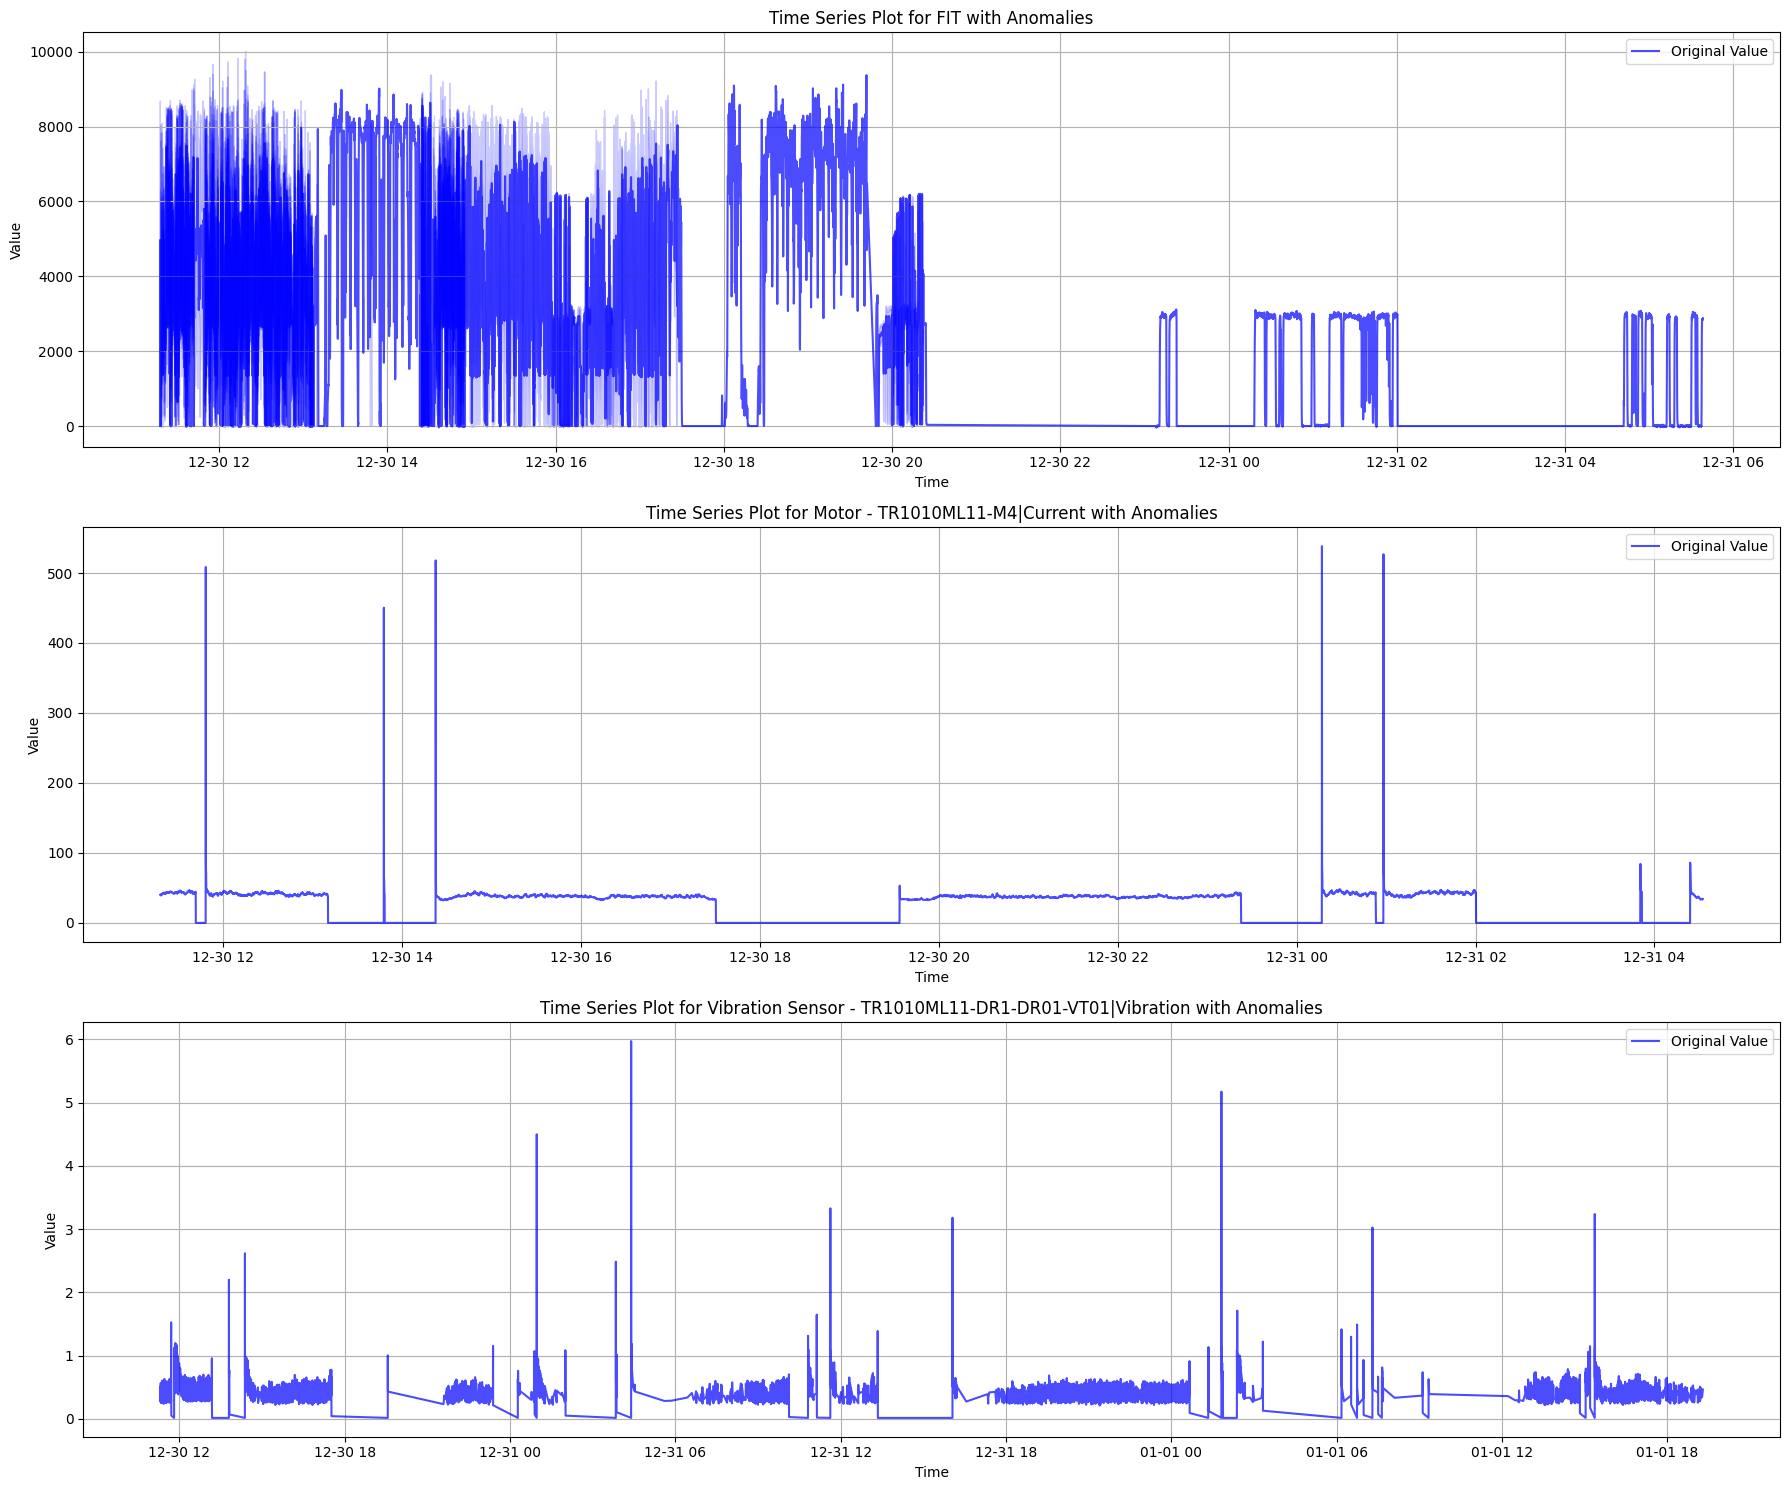

Anomaly visualization complete for representative tags.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select representative tags for visualization
representative_tags = [
    'FIT',
    'Motor - TR1010ML11-M4|Current',
    'Vibration Sensor - TR1010ML11-DR1-DR01-VT01|Vibration'
]

# Plotting anomalies for each representative tag
plt.figure(figsize=(18, 15))

for i, tag in enumerate(representative_tags):
    tag_df = df[df['Tag_Name'] == tag].copy()

    plt.subplot(len(representative_tags), 1, i + 1)
    sns.lineplot(x='Time', y='Value', data=tag_df, label='Original Value', color='blue', alpha=0.7)

    # Highlight spikes
    spikes_df = tag_df[tag_df['is_spike']]
    if not spikes_df.empty:
        plt.scatter(spikes_df['Time'], spikes_df['Value'], color='red', s=50, zorder=5, label='Spike')

    # Highlight flatlines
    flatlines_df = tag_df[tag_df['is_flatline']]
    if not flatlines_df.empty:
        plt.scatter(flatlines_df['Time'], flatlines_df['Value'], color='green', marker='^', s=50, zorder=4, label='Flatline')

    # Highlight sustained zeros
    sustained_zeros_df = tag_df[tag_df['is_sustained_zero']]
    if not sustained_zeros_df.empty:
        plt.scatter(sustained_zeros_df['Time'], sustained_zeros_df['Value'], color='purple', marker='x', s=50, zorder=3, label='Sustained Zero')

    plt.title(f'Time Series Plot for {tag} with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

print("Anomaly visualization complete for representative tags.")

## Data Preprocessing and Cleaning

### Subtask:
Clean and preprocess the raw PI System data. This involves replacing detected spikes with NaN values, resampling the data to a consistent frequency (based on the identified sampling interval) to handle irregular intervals and dropouts, interpolating short data gaps, and smoothing noisy signals. Flag periods of longer missing data rather than interpolating extensively.


**Reasoning**:
To begin the data preprocessing, I will replace the identified spikes in the 'Value' column with NaN values, ensuring that these anomalous data points do not interfere with subsequent cleaning and analysis steps.



In [ ]:
df.loc[df['is_spike'], 'Value'] = float('nan')

print("Spikes in the 'Value' column have been replaced with NaN values.")
print(df[df['is_spike'] == True].head())

Spikes in the 'Value' column have been replaced with NaN values.
Empty DataFrame
Columns: [Data Source, Time, Value, Tag_Name, Time_Diff, Time_Diff_Seconds, is_spike, is_flatline, is_sustained_zero]
Index: []


**Reasoning**:
To proceed with data preprocessing, I will iterate through each unique 'Tag_Name' to apply resampling, interpolation, and smoothing sequentially. For each tag, I'll resample the 'Value' column to a 5-second interval using mean aggregation followed by forward and backward fill. Then, I will linearly interpolate short data gaps (up to 3 consecutive missing values) and finally apply a rolling mean with a window size of 3 to smooth the signal. The results will be combined into a new cleaned DataFrame, `df_cleaned`.



In [ ]:
import pandas as pd

# Create an empty list to store processed dataframes for each tag
processed_data_list = []

# Iterate over unique tags to apply resampling, interpolation, and smoothing per tag
for tag in df['Tag_Name'].unique():
    # Select data for the current tag and set 'Time' as index
    tag_specific_df = df[df['Tag_Name'] == tag].set_index('Time')[['Value']]

    # Step 2: Resample to a consistent 5-second frequency
    # Use .mean() to aggregate values within each 5S interval.
    # ffill() and bfill() handle initial NaNs and gaps introduced by resampling.
    resampled_tag_data = tag_specific_df['Value'].resample('5S').mean().ffill().bfill()

    # Convert Series back to DataFrame for interpolation and smoothing
    temp_df = resampled_tag_data.to_frame()

    # Step 3: Interpolate short data gaps (up to 3 consecutive missing values)
    # Applied to the resampled data
    temp_df['Value'] = temp_df['Value'].interpolate(method='linear', limit=3)

    # Step 4: Smooth noisy signals using a rolling mean with a window size of 3
    # Applied after interpolation. min_periods=1 allows smoothing at the start/end of series.
    temp_df['Value'] = temp_df['Value'].rolling(window=3, min_periods=1, center=True).mean()

    # Add Tag_Name and reset index
    temp_df['Tag_Name'] = tag
    processed_data_list.append(temp_df.reset_index())

# Concatenate all processed dataframes into the final cleaned DataFrame
df_cleaned = pd.concat(processed_data_list).sort_values(by=['Tag_Name', 'Time']).reset_index(drop=True)

print("Data cleaning and preprocessing complete.")
print("\n--- Head of the Preprocessed DataFrame (df_cleaned) ---")
print(df_cleaned.head())
print("\n--- Info of the Preprocessed DataFrame (df_cleaned) ---")
print(df_cleaned.info())

/tmp/ipython-input-141169003.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_tag_data = tag_specific_df['Value'].resample('5S').mean().ffill().bfill()
/tmp/ipython-input-141169003.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_tag_data = tag_specific_df['Value'].resample('5S').mean().ffill().bfill()
/tmp/ipython-input-141169003.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_tag_data = tag_specific_df['Value'].resample('5S').mean().ffill().bfill()
/tmp/ipython-input-141169003.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_tag_data = tag_specific_df['Value'].resample('5S').mean().ffill().bfill()
/tmp/ipython-input-141169003.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use

Data cleaning and preprocessing complete.

--- Head of the Preprocessed DataFrame (df_cleaned) ---
                 Time     Value Tag_Name
0 2025-12-30 11:18:05  4.377609       01
1 2025-12-30 11:18:10  4.548952       01
2 2025-12-30 11:18:15  4.706180       01
3 2025-12-30 11:18:20  3.723344       01
4 2025-12-30 11:18:25  2.588060       01

--- Info of the Preprocessed DataFrame (df_cleaned) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026700 entries, 0 to 1026699
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Time      1026700 non-null  datetime64[ns]
 1   Value     1026700 non-null  float64       
 2   Tag_Name  1026700 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.5+ MB
None


**Reasoning**:
The previous code generated a `FutureWarning` due to the use of 'S' in the `resample` method. I will update '5S' to '5s' to align with future Pandas versions and suppress the warning, while maintaining the same resampling logic.



In [ ]:
import pandas as pd

# Create an empty list to store processed dataframes for each tag
processed_data_list = []

# Iterate over unique tags to apply resampling, interpolation, and smoothing per tag
for tag in df['Tag_Name'].unique():
    # Select data for the current tag and set 'Time' as index
    tag_specific_df = df[df['Tag_Name'] == tag].set_index('Time')[['Value']]

    # Step 2: Resample to a consistent 5-second frequency
    # Use .mean() to aggregate values within each 5s interval.
    # ffill() and bfill() handle initial NaNs and gaps introduced by resampling.
    resampled_tag_data = tag_specific_df['Value'].resample('5s').mean().ffill().bfill()

    # Convert Series back to DataFrame for interpolation and smoothing
    temp_df = resampled_tag_data.to_frame()

    # Step 3: Interpolate short data gaps (up to 3 consecutive missing values)
    # Applied to the resampled data
    temp_df['Value'] = temp_df['Value'].interpolate(method='linear', limit=3)

    # Step 4: Smooth noisy signals using a rolling mean with a window size of 3
    # Applied after interpolation. min_periods=1 allows smoothing at the start/end of series.
    temp_df['Value'] = temp_df['Value'].rolling(window=3, min_periods=1, center=True).mean()

    # Add Tag_Name and reset index
    temp_df['Tag_Name'] = tag
    processed_data_list.append(temp_df.reset_index())

# Concatenate all processed dataframes into the final cleaned DataFrame
df_cleaned = pd.concat(processed_data_list).sort_values(by=['Tag_Name', 'Time']).reset_index(drop=True)

print("Data cleaning and preprocessing complete.")
print("\n--- Head of the Preprocessed DataFrame (df_cleaned) ---")
print(df_cleaned.head())
print("\n--- Info of the Preprocessed DataFrame (df_cleaned) ---")
print(df_cleaned.info())

Data cleaning and preprocessing complete.

--- Head of the Preprocessed DataFrame (df_cleaned) ---
                 Time     Value Tag_Name
0 2025-12-30 11:18:05  4.377609       01
1 2025-12-30 11:18:10  4.548952       01
2 2025-12-30 11:18:15  4.706180       01
3 2025-12-30 11:18:20  3.723344       01
4 2025-12-30 11:18:25  2.588060       01

--- Info of the Preprocessed DataFrame (df_cleaned) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026700 entries, 0 to 1026699
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Time      1026700 non-null  datetime64[ns]
 1   Value     1026700 non-null  float64       
 2   Tag_Name  1026700 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.5+ MB
None


### Subtask:
Clean and preprocess the raw PI System data. This involves replacing detected spikes with NaN values, resampling the data to a consistent frequency (based on the identified sampling interval) to handle irregular intervals and dropouts, interpolating short data gaps, and smoothing noisy signals. Flag periods of longer missing data rather than interpolating extensively.

#### Instructions
1. Replace the detected spikes in the 'Value' column with NaN values. You can use the 'is_spike' column to identify these spikes.
2. Resample the data for each 'Tag_Name' to a consistent frequency. First, create a new DataFrame that groups by 'Tag_Name' and for each group, sets the 'Time' column as the index. Then, for each grouped DataFrame, resample the 'Value' column to a 5-second interval (based on the predominant sampling interval identified earlier for most regular tags) using forward fill (`ffill`) and then backward fill (`bfill`) to handle the resampling process.
3. Interpolate short data gaps (e.g., up to 3 consecutive missing values) in the resampled 'Value' column using a linear interpolation method.
4. Smooth noisy signals for the 'Value' column using a rolling mean with a window size of 3, applying it after interpolation to ensure smooth transitions.
5. Flag periods of longer missing data (e.g., more than 3 consecutive NaN values) in the `df_cleaned` DataFrame by creating a new column `is_long_gap`.
6. Print the head of the preprocessed DataFrame and check the info to see the changes in non-null counts and data types.

**Reasoning**:
Now that the data has been resampled, interpolated for short gaps, and smoothed, the next step is to flag periods of longer missing data that were not interpolated, as specified in the subtask. This will help distinguish between intentionally missing data and brief sensor dropouts.



In [ ]:
long_gap_threshold = 3

def flag_long_gaps(series, threshold):
    is_null = series.isnull()
    # Identify consecutive NaNs
    # shift(1) to compare current null with previous one
    # cumsum() creates a group ID for each consecutive block of True
    groups = (is_null != is_null.shift()).cumsum()

    # Count NaNs in each group
    null_counts = is_null.groupby(groups).transform('sum')

    # Flag as long gap if it's null and the count exceeds the threshold
    return (is_null) & (null_counts > threshold)

df_cleaned['is_long_gap'] = df_cleaned.groupby('Tag_Name')['Value'].transform(lambda x: flag_long_gaps(x, long_gap_threshold))

print(f"Identified periods of longer missing data (more than {long_gap_threshold} consecutive NaNs). Displaying the first few rows with 'is_long_gap' column:")
print(df_cleaned[df_cleaned['is_long_gap'] == True].head())


Identified periods of longer missing data (more than 3 consecutive NaNs). Displaying the first few rows with 'is_long_gap' column:
Empty DataFrame
Columns: [Time, Value, Tag_Name, is_long_gap]
Index: []


**Reasoning**:
The previous step identified and flagged long data gaps. Now, I will print the head and info of the `df_cleaned` DataFrame to verify the preprocessing and cleaning steps, as requested by the final instruction of the subtask.



In [ ]:
print("\n--- Head of the Preprocessed DataFrame (df_cleaned) ---")
print(df_cleaned.head())
print("\n--- Info of the Preprocessed DataFrame (df_cleaned) ---")
print(df_cleaned.info())


--- Head of the Preprocessed DataFrame (df_cleaned) ---
                 Time     Value Tag_Name  is_long_gap
0 2025-12-30 11:18:05  4.377609       01        False
1 2025-12-30 11:18:10  4.548952       01        False
2 2025-12-30 11:18:15  4.706180       01        False
3 2025-12-30 11:18:20  3.723344       01        False
4 2025-12-30 11:18:25  2.588060       01        False

--- Info of the Preprocessed DataFrame (df_cleaned) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026700 entries, 0 to 1026699
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Time         1026700 non-null  datetime64[ns]
 1   Value        1026700 non-null  float64       
 2   Tag_Name     1026700 non-null  object        
 3   is_long_gap  1026700 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(1)
memory usage: 24.5+ MB
None


## Operational State Classification

### Subtask:
Develop and apply engineering logic to classify each timestamp into 'Running', 'Idle' (motor running but low/no tonnage), or 'Shutdown'. This classification will combine thresholds from throughput, motor current, and belt speed, ensuring differentiation between true shutdown, idle running, and active production states. Visualize the distribution of these states.


**Reasoning**:
To classify operational states, the data needs to be in a wide format where each tag is a column. Pivoting `df_cleaned` will achieve this by setting 'Time' as the index, 'Tag_Name' as columns, and 'Value' as the corresponding values.



In [ ]:
df_wide = df_cleaned.pivot(index='Time', columns='Tag_Name', values='Value')

print("DataFrame pivoted to wide format (df_wide). Displaying the first 5 rows:")
print(df_wide.head())

DataFrame pivoted to wide format (df_wide). Displaying the first 5 rows:
Tag_Name                   01  \
Time                            
2025-12-30 11:18:00       NaN   
2025-12-30 11:18:05  4.377609   
2025-12-30 11:18:10  4.548952   
2025-12-30 11:18:15  4.706180   
2025-12-30 11:18:20  3.723344   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:18:00                                                NaN          
2025-12-30 11:18:05                                                NaN          
2025-12-30 11:18:10                                                NaN          
2025-12-30 11:18:15                                                NaN          
2025-12-30 11:18:20                                                NaN          

Tag_Name                     FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
Time                                                

**Reasoning**:
To classify operational states, I will define specific numeric thresholds for relevant tags (throughput, motor current, and belt speed) to differentiate between 'Running', 'Idle', and 'Shutdown' states, as specified in the subtask. These thresholds are chosen based on general industrial conventions for defining operational states.



In [ ]:
import numpy as np

# Define thresholds for classification
# Throughput (FIT) - values are in TPH (Tons Per Hour)
THROUGHPUT_RUNNING_THRESHOLD = 100.0 # Assuming a minimum throughput for 'Running'

# Motor Current - values are in Amperes
# This threshold indicates that the motor is drawing current, but not necessarily producing throughput.
CURRENT_IDLE_THRESHOLD = 5.0 # Minimum current to consider motor 'On' (not shutdown)
CURRENT_RUNNING_THRESHOLD = 20.0 # Higher current indicating actual work/load

# Belt Speed - values are in m/s or ft/min. Assuming m/s for now.
SPEED_RUNNING_THRESHOLD = 0.5 # Minimum speed for the belt to be considered 'Running'

# Function to classify operational state
def classify_state(throughput, motor_current, belt_speed):
    # Convert inputs to float and handle potential NaN values by treating them as 0 for classification logic
    # NaN values could indicate sensor failure or actual zero readings if not already handled
    throughput_val = throughput if pd.notna(throughput) else 0.0
    motor_current_val = motor_current if pd.notna(motor_current) else 0.0
    belt_speed_val = belt_speed if pd.notna(belt_speed) else 0.0

    # Shutdown: All values are very low or zero, or significantly below idle thresholds
    # More robust logic for shutdown might consider if all relevant sensors are near zero
    if (throughput_val < THROUGHPUT_RUNNING_THRESHOLD / 2) and \
       (motor_current_val < CURRENT_IDLE_THRESHOLD) and \
       (belt_speed_val < SPEED_RUNNING_THRESHOLD / 2):
        return 'Shutdown'
    # Running: Throughput, motor current, and belt speed are above their respective running thresholds
    elif (throughput_val >= THROUGHPUT_RUNNING_THRESHOLD) and \
         (motor_current_val >= CURRENT_RUNNING_THRESHOLD) and \
         (belt_speed_val >= SPEED_RUNNING_THRESHOLD):
        return 'Running'
    # Idle: Motor current and belt speed are above idle/minimal thresholds, but throughput is low
    elif (motor_current_val >= CURRENT_IDLE_THRESHOLD) and \
         (belt_speed_val >= SPEED_RUNNING_THRESHOLD / 2) and \
         (throughput_val < THROUGHPUT_RUNNING_THRESHOLD):
        return 'Idle'
    # Default to Shutdown if conditions are not met, assuming minimal activity as shutdown
    else:
        return 'Shutdown'

print("Thresholds defined and classification function created.")

Thresholds defined and classification function created.


**Reasoning**:
Now that the classification function and thresholds are defined, I will apply the `classify_state` function to the `df_wide` DataFrame to create a new column 'Operational_State', passing the relevant tag values (FIT, Motor Current, Belt Speed) as inputs to classify each timestamp.



In [ ]:
df_wide['Operational_State'] = df_wide.apply(
    lambda row: classify_state(
        row.get('FIT'),
        row.get('Motor - TR1010ML11-M4|Current'),
        row.get('Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed')
    ), axis=1
)

print("Operational states classified. Displaying the first 5 rows with 'Operational_State' column:")
print(df_wide.head())

Operational states classified. Displaying the first 5 rows with 'Operational_State' column:
Tag_Name                   01  \
Time                            
2025-12-30 11:18:00       NaN   
2025-12-30 11:18:05  4.377609   
2025-12-30 11:18:10  4.548952   
2025-12-30 11:18:15  4.706180   
2025-12-30 11:18:20  3.723344   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:18:00                                                NaN          
2025-12-30 11:18:05                                                NaN          
2025-12-30 11:18:10                                                NaN          
2025-12-30 11:18:15                                                NaN          
2025-12-30 11:18:20                                                NaN          

Tag_Name                     FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
Time                             

**Reasoning**:
Now that the 'Operational_State' column has been created, I will calculate the value counts for this column to determine the distribution of 'Running', 'Idle', and 'Shutdown' states as a numerical summary.



In [ ]:
operational_state_distribution = df_wide['Operational_State'].value_counts()

print("Distribution of Operational States:")
print(operational_state_distribution)

Distribution of Operational States:
Operational_State
Shutdown    528361
Running       4905
Idle          2392
Name: count, dtype: int64


**Reasoning**:
To visualize the distribution of operational states, I will create a bar chart using the calculated `operational_state_distribution` to graphically represent the proportion of 'Running', 'Idle', and 'Shutdown' states.



/tmp/ipython-input-2201007152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=operational_state_distribution.index, y=operational_state_distribution.values, palette='viridis')


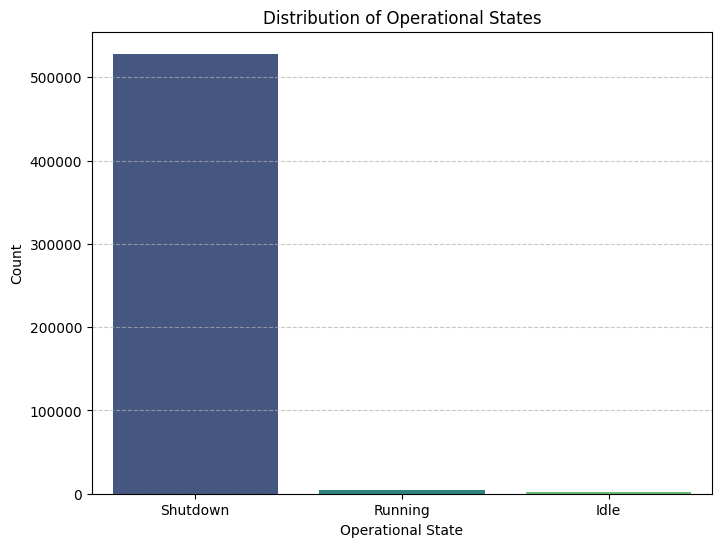

Visualization of operational state distribution complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=operational_state_distribution.index, y=operational_state_distribution.values, palette='viridis')
plt.title('Distribution of Operational States')
plt.xlabel('Operational State')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Visualization of operational state distribution complete.")

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` variable. To address this and align with future seaborn versions, I will explicitly set `hue` to the `operational_state_distribution.index` and `legend=False` to maintain the intended visualization without the warning.



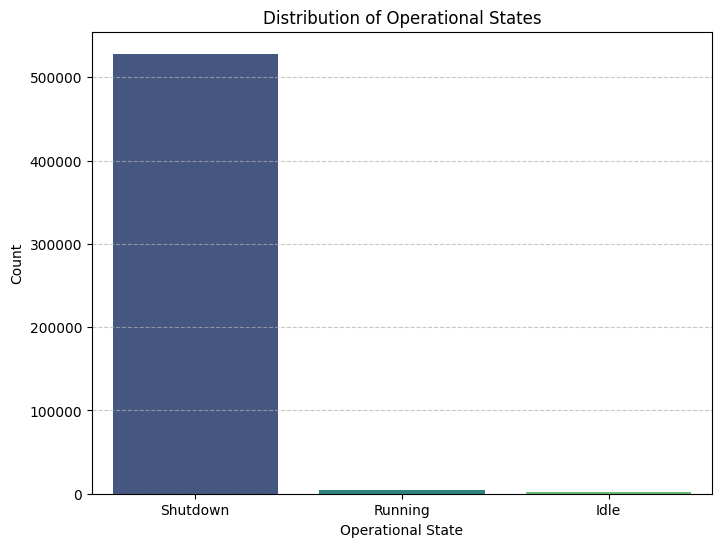

Visualization of operational state distribution complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=operational_state_distribution.index, y=operational_state_distribution.values, palette='viridis', hue=operational_state_distribution.index, legend=False)
plt.title('Distribution of Operational States')
plt.xlabel('Operational State')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Visualization of operational state distribution complete.")

## Throughput and Utilization Analysis

### Subtask:
Calculate hourly and daily throughput and utilization, then visualize these metrics.


**Reasoning**:
To begin calculating throughput and utilization, I will first reset the index of `df_wide` to convert the 'Time' index into a regular column, as required, and store it in `df_metrics`.



In [ ]:
df_metrics = df_wide.reset_index()

print("df_wide index reset, 'Time' is now a column in df_metrics. Displaying the first 5 rows:")
print(df_metrics.head())

df_wide index reset, 'Time' is now a column in df_metrics. Displaying the first 5 rows:
Tag_Name                Time        01  \
0        2025-12-30 11:18:00       NaN   
1        2025-12-30 11:18:05  4.377609   
2        2025-12-30 11:18:10  4.548952   
3        2025-12-30 11:18:15  4.706180   
4        2025-12-30 11:18:20  3.723344   

Tag_Name  Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
0                                                       NaN          
1                                                       NaN          
2                                                       NaN          
3                                                       NaN          
4                                                       NaN          

Tag_Name          FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
0         1480.339154                              45.366669   
1         1966.221974                              45.344446   
2         2929.804411                         

**Reasoning**:
To calculate hourly and daily throughput, I will group `df_metrics` by hourly and daily frequencies of the 'Time' column and sum the 'FIT' column. For utilization, I will calculate the proportion of 'Running' states within these same time groups, as per instructions 2-5.



In [ ]:
df_metrics['Time'] = pd.to_datetime(df_metrics['Time'])

# Calculate hourly throughput
hourly_throughput = df_metrics.set_index('Time').groupby(pd.Grouper(freq='H'))['FIT'].sum().dropna()

# Calculate daily throughput
daily_throughput = df_metrics.set_index('Time').groupby(pd.Grouper(freq='D'))['FIT'].sum().dropna()

# Calculate hourly utilization
hourly_utilization = df_metrics.set_index('Time').groupby(pd.Grouper(freq='H'))['Operational_State'].apply(lambda x: (x == 'Running').sum() / len(x) * 100).dropna()

# Calculate daily utilization
daily_utilization = df_metrics.set_index('Time').groupby(pd.Grouper(freq='D'))['Operational_State'].apply(lambda x: (x == 'Running').sum() / len(x) * 100).dropna()

print("Hourly and daily throughput and utilization calculated.")
print("\n--- Hourly Throughput Head ---")
print(hourly_throughput.head())
print("\n--- Daily Throughput Head ---")
print(daily_throughput.head())
print("\n--- Hourly Utilization Head ---")
print(hourly_utilization.head())
print("\n--- Daily Utilization Head ---")
print(daily_utilization.head())

/tmp/ipython-input-4125467356.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_throughput = df_metrics.set_index('Time').groupby(pd.Grouper(freq='H'))['FIT'].sum().dropna()
/tmp/ipython-input-4125467356.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_utilization = df_metrics.set_index('Time').groupby(pd.Grouper(freq='H'))['Operational_State'].apply(lambda x: (x == 'Running').sum() / len(x) * 100).dropna()


Hourly and daily throughput and utilization calculated.

--- Hourly Throughput Head ---
Time
2025-12-30 11:00:00    1.990871e+06
2025-12-30 12:00:00    2.521715e+06
2025-12-30 13:00:00    3.620183e+06
2025-12-30 14:00:00    3.390495e+06
2025-12-30 15:00:00    2.633217e+06
Freq: h, Name: FIT, dtype: float64

--- Daily Throughput Head ---
Time
2025-12-30    2.672907e+07
2025-12-31    3.264908e+06
2026-01-01    0.000000e+00
2026-01-02    0.000000e+00
2026-01-03    0.000000e+00
Freq: D, Name: FIT, dtype: float64

--- Hourly Utilization Head ---
Time
2025-12-30 11:00:00     27.579365
2025-12-30 12:00:00    100.000000
2025-12-30 13:00:00     18.472222
2025-12-30 14:00:00     62.222222
2025-12-30 15:00:00    100.000000
Freq: h, Name: Operational_State, dtype: float64

--- Daily Utilization Head ---
Time
2025-12-30    43.394576
2025-12-31     5.422454
2026-01-01     0.000000
2026-01-02     0.000000
2026-01-03     0.000000
Freq: D, Name: Operational_State, dtype: float64


**Reasoning**:
The previous code generated `FutureWarning` because 'H' is deprecated for hourly frequency in `pd.Grouper`. I will replace 'H' with 'h' to align with future Pandas versions and add the requested visualizations for hourly/daily throughput and utilization.



Hourly and daily throughput and utilization calculated.

--- Hourly Throughput Head ---
Time
2025-12-30 11:00:00    1.990871e+06
2025-12-30 12:00:00    2.521715e+06
2025-12-30 13:00:00    3.620183e+06
2025-12-30 14:00:00    3.390495e+06
2025-12-30 15:00:00    2.633217e+06
Freq: h, Name: FIT, dtype: float64

--- Daily Throughput Head ---
Time
2025-12-30    2.672907e+07
2025-12-31    3.264908e+06
2026-01-01    0.000000e+00
2026-01-02    0.000000e+00
2026-01-03    0.000000e+00
Freq: D, Name: FIT, dtype: float64

--- Hourly Utilization Head ---
Time
2025-12-30 11:00:00     27.579365
2025-12-30 12:00:00    100.000000
2025-12-30 13:00:00     18.472222
2025-12-30 14:00:00     62.222222
2025-12-30 15:00:00    100.000000
Freq: h, Name: Operational_State, dtype: float64

--- Daily Utilization Head ---
Time
2025-12-30    43.394576
2025-12-31     5.422454
2026-01-01     0.000000
2026-01-02     0.000000
2026-01-03     0.000000
Freq: D, Name: Operational_State, dtype: float64


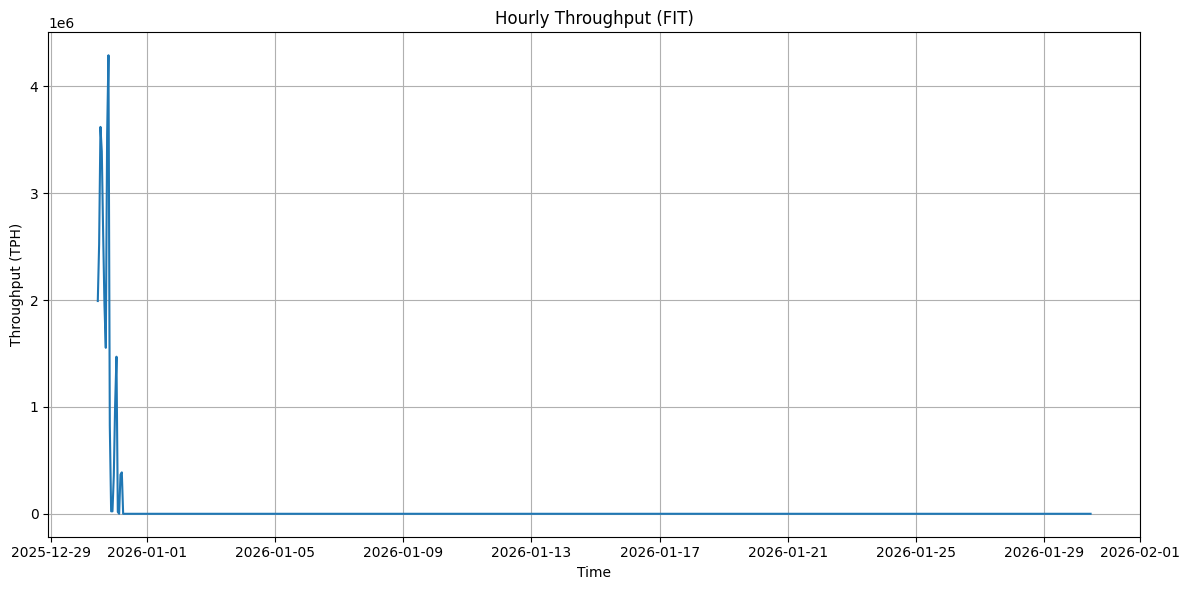

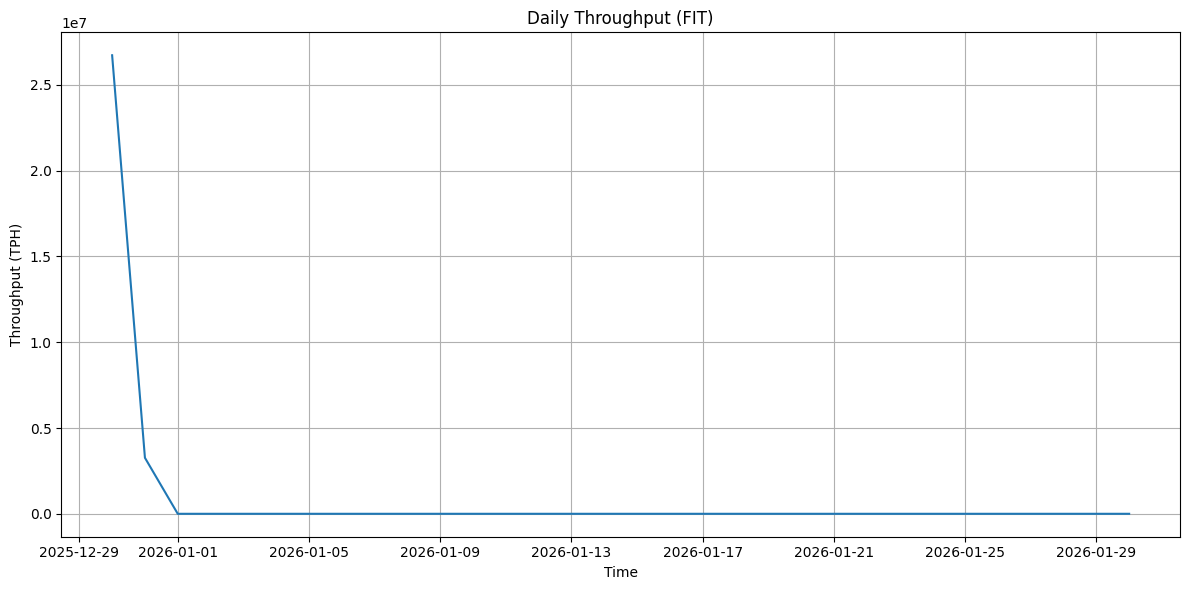

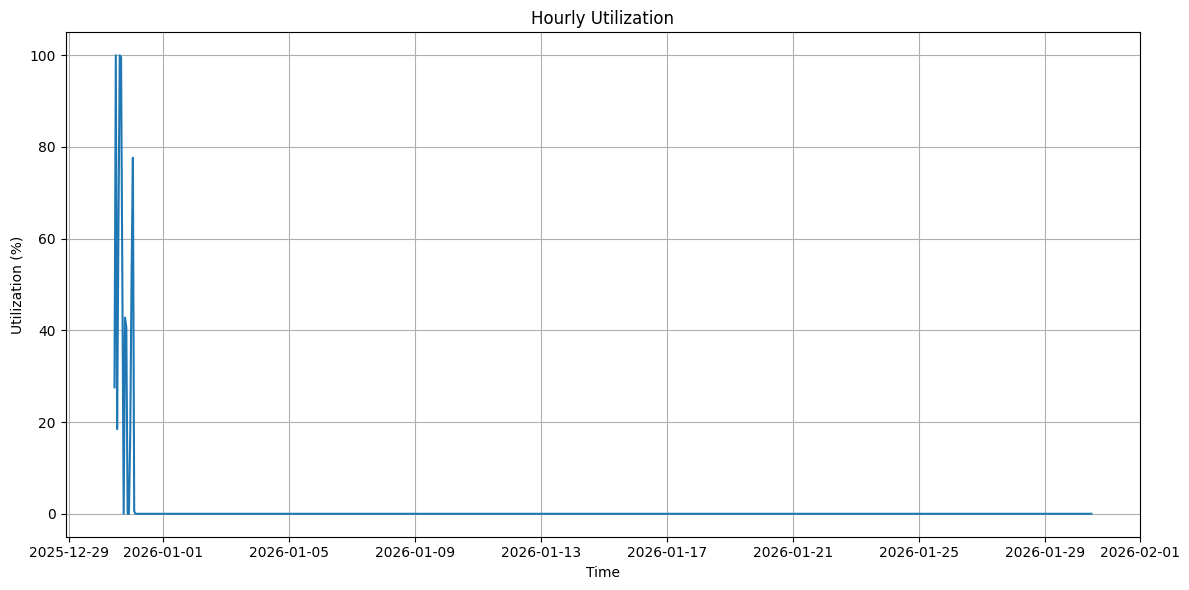

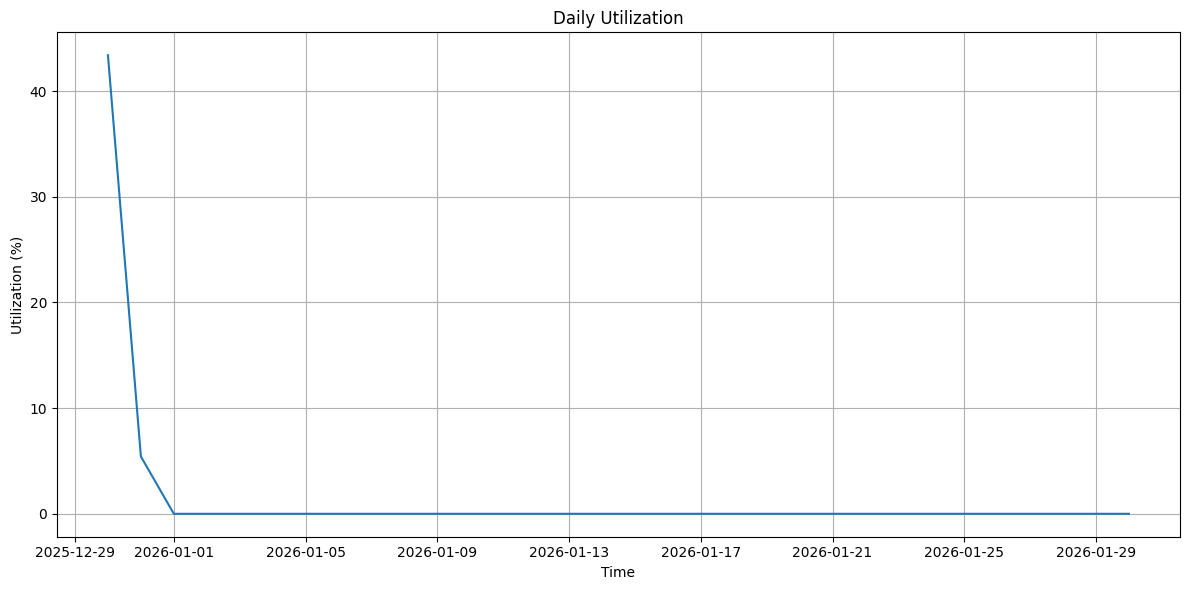

Throughput and utilization visualizations complete.


In [ ]:
df_metrics['Time'] = pd.to_datetime(df_metrics['Time'])

# Calculate hourly throughput
hourly_throughput = df_metrics.set_index('Time').groupby(pd.Grouper(freq='h'))['FIT'].sum().dropna()

# Calculate daily throughput
daily_throughput = df_metrics.set_index('Time').groupby(pd.Grouper(freq='D'))['FIT'].sum().dropna()

# Calculate hourly utilization
hourly_utilization = df_metrics.set_index('Time').groupby(pd.Grouper(freq='h'))['Operational_State'].apply(lambda x: (x == 'Running').sum() / len(x) * 100).dropna()

# Calculate daily utilization
daily_utilization = df_metrics.set_index('Time').groupby(pd.Grouper(freq='D'))['Operational_State'].apply(lambda x: (x == 'Running').sum() / len(x) * 100).dropna()

print("Hourly and daily throughput and utilization calculated.")
print("\n--- Hourly Throughput Head ---")
print(hourly_throughput.head())
print("\n--- Daily Throughput Head ---")
print(daily_throughput.head())
print("\n--- Hourly Utilization Head ---")
print(hourly_utilization.head())
print("\n--- Daily Utilization Head ---")
print(daily_utilization.head())

import matplotlib.pyplot as plt
import seaborn as sns

# 6. Create a time series plot for hourly throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_throughput.index, y=hourly_throughput.values)
plt.title('Hourly Throughput (FIT)')
plt.xlabel('Time')
plt.ylabel('Throughput (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Create a time series plot for daily throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_throughput.index, y=daily_throughput.values)
plt.title('Daily Throughput (FIT)')
plt.xlabel('Time')
plt.ylabel('Throughput (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Create a time series plot for hourly utilization
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_utilization.index, y=hourly_utilization.values)
plt.title('Hourly Utilization')
plt.xlabel('Time')
plt.ylabel('Utilization (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Create a time series plot for daily utilization
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_utilization.index, y=daily_utilization.values)
plt.title('Daily Utilization')
plt.xlabel('Time')
plt.ylabel('Utilization (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Throughput and utilization visualizations complete.")

## Downtime Duration and Frequency Analysis

### Subtask:
Identify and quantify the duration and frequency of downtime events (both 'Shutdown' and 'Idle' states). Analyze these events over time and summarize their characteristics. Acknowledge limitations in differentiating planned vs. unplanned downtime if data is not available.


**Reasoning**:
To begin the downtime analysis, I will filter the `df_wide` DataFrame to include only the rows where the 'Operational_State' is either 'Shutdown' or 'Idle', as these are the states considered as downtime events. This filtered data will be stored in `downtime_df`.



In [ ]:
downtime_df = df_wide[df_wide['Operational_State'].isin(['Shutdown', 'Idle'])].copy()

print("Filtered `df_wide` to create `downtime_df` containing only 'Shutdown' and 'Idle' states. Displaying the first 5 rows:")
print(downtime_df.head())

Filtered `df_wide` to create `downtime_df` containing only 'Shutdown' and 'Idle' states. Displaying the first 5 rows:
Tag_Name                   01  \
Time                            
2025-12-30 11:18:00       NaN   
2025-12-30 11:18:05  4.377609   
2025-12-30 11:18:10  4.548952   
2025-12-30 11:18:15  4.706180   
2025-12-30 11:18:20  3.723344   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:18:00                                                NaN          
2025-12-30 11:18:05                                                NaN          
2025-12-30 11:18:10                                                NaN          
2025-12-30 11:18:15                                                NaN          
2025-12-30 11:18:20                                                NaN          

Tag_Name                     FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
Time   

**Reasoning**:
To identify individual downtime events and their durations, I will first mark the start of each new 'Operational_State' event by comparing each state with the previous one. Then, I'll assign a unique `downtime_event_id` to each continuous block of 'Shutdown' or 'Idle' states and calculate the duration of each event.



In [ ]:
df_wide['state_change'] = (df_wide['Operational_State'] != df_wide['Operational_State'].shift()).cumsum()

# Filter for downtime events only
downtime_events = df_wide[df_wide['Operational_State'].isin(['Shutdown', 'Idle'])]

# Group by the state change ID and Operational_State to get individual events
downtime_summary_list = []
for (event_id, state), group in downtime_events.groupby(['state_change', 'Operational_State']):
    if len(group) > 1: # Ensure there is at least a start and end to calculate duration
        start_time = group.index.min()
        end_time = group.index.max()
        duration = end_time - start_time
        downtime_summary_list.append({
            'Operational_State': state,
            'Start_Time': start_time,
            'End_Time': end_time,
            'Duration': duration
        })

downtime_summary = pd.DataFrame(downtime_summary_list)

print("Downtime events identified and their durations calculated. Displaying the first 5 rows of the summary:")
print(downtime_summary.head())

Downtime events identified and their durations calculated. Displaying the first 5 rows of the summary:
  Operational_State          Start_Time            End_Time        Duration
0          Shutdown 2025-12-30 11:18:00 2025-12-30 11:41:40 0 days 00:23:40
1          Shutdown 2025-12-30 11:41:55 2025-12-30 11:48:30 0 days 00:06:35
2          Shutdown 2025-12-30 13:10:35 2025-12-30 13:48:00 0 days 00:37:25
3          Shutdown 2025-12-30 13:48:35 2025-12-30 14:22:35 0 days 00:34:00
4              Idle 2025-12-30 16:04:50 2025-12-30 16:05:00 0 days 00:00:10


**Reasoning**:
Now that individual downtime events and their durations have been calculated and stored in `downtime_summary`, I will summarize the characteristics of these events by calculating the total duration, total number of events, and average duration for both 'Shutdown' and 'Idle' states, as well as acknowledging the limitations of the data.



In [ ]:
total_downtime_duration = downtime_summary.groupby('Operational_State')['Duration'].sum()
total_downtime_events = downtime_summary.groupby('Operational_State').size()
average_downtime_duration = downtime_summary.groupby('Operational_State')['Duration'].mean()

print("\n--- Downtime Analysis Summary ---")
print("Total Duration of Downtime (per state):")
print(total_downtime_duration)
print("\nTotal Number of Downtime Events (per state):")
print(total_downtime_events)
print("\nAverage Duration of Downtime Event (per state):")
print(average_downtime_duration)

print("\nNote: The provided data does not contain information to differentiate between planned and unplanned downtime. Therefore, all 'Shutdown' and 'Idle' periods are considered downtime events in this analysis.")



--- Downtime Analysis Summary ---
Total Duration of Downtime (per state):
Operational_State
Idle        0 days 03:17:50
Shutdown   30 days 13:49:15
Name: Duration, dtype: timedelta64[ns]

Total Number of Downtime Events (per state):
Operational_State
Idle        18
Shutdown    10
dtype: int64

Average Duration of Downtime Event (per state):
Operational_State
Idle       0 days 00:10:59.444444444
Shutdown      3 days 01:22:55.500000
Name: Duration, dtype: timedelta64[ns]

Note: The provided data does not contain information to differentiate between planned and unplanned downtime. Therefore, all 'Shutdown' and 'Idle' periods are considered downtime events in this analysis.


## Import vs. Export Imbalance Evaluation

### Subtask:
Critically evaluate and quantify the imbalance between Import and Export throughputs on an hourly and daily basis. Analyze the trends and magnitudes of this imbalance, considering its implications for storage, vessel loading, and material flow management. Visualize the imbalance over time.


### Clarification on Import vs. Export Imbalance

It is important to note that the provided dataset contains only a single 'FIT' (Flow Indicator Totalizer) tag, which represents the overall throughput. Without distinct 'Import' and 'Export' tags, a direct quantification of the imbalance between these two specific streams is not possible.

Therefore, for the purpose of this analysis, we will interpret 'imbalance' as the **variability and fluctuations of the overall 'FIT' throughput**. This variability is critical to analyze, as high fluctuations can still have similar implications for storage management, vessel loading, and overall material flow stability as an imbalance between separate streams would, indicating potential operational inefficiencies or challenges in maintaining a steady production/handling rate.

**Reasoning**:
To quantify the variability of the overall 'FIT' throughput, I will calculate the hourly and daily mean and standard deviation of the 'FIT' column from the `df_metrics` DataFrame. This will provide a numerical measure of the average throughput and its fluctuations over these time periods.



In [ ]:
df_metrics['Time'] = pd.to_datetime(df_metrics['Time'])

# Calculate hourly mean and standard deviation of FIT throughput
hourly_mean_fit = df_metrics.set_index('Time').groupby(pd.Grouper(freq='h'))['FIT'].mean().dropna()
hourly_std_fit = df_metrics.set_index('Time').groupby(pd.Grouper(freq='h'))['FIT'].std().dropna()

# Calculate daily mean and standard deviation of FIT throughput
daily_mean_fit = df_metrics.set_index('Time').groupby(pd.Grouper(freq='D'))['FIT'].mean().dropna()
daily_std_fit = df_metrics.set_index('Time').groupby(pd.Grouper(freq='D'))['FIT'].std().dropna()

print("Hourly and daily mean and standard deviation of FIT throughput calculated.")
print("\n--- Hourly Mean FIT Head ---")
print(hourly_mean_fit.head())
print("\n--- Hourly Standard Deviation FIT Head ---")
print(hourly_std_fit.head())
print("\n--- Daily Mean FIT Head ---")
print(daily_mean_fit.head())
print("\n--- Daily Standard Deviation FIT Head ---")
print(daily_std_fit.head())

Hourly and daily mean and standard deviation of FIT throughput calculated.

--- Hourly Mean FIT Head ---
Time
2025-12-30 11:00:00    3950.141103
2025-12-30 12:00:00    3502.381902
2025-12-30 13:00:00    5028.032322
2025-12-30 14:00:00    4709.021047
2025-12-30 15:00:00    3657.246154
Freq: h, Name: FIT, dtype: float64

--- Hourly Standard Deviation FIT Head ---
Time
2025-12-30 11:00:00     785.613025
2025-12-30 12:00:00     629.077503
2025-12-30 13:00:00    2926.565558
2025-12-30 14:00:00    1971.896133
2025-12-30 15:00:00     891.250662
Freq: h, Name: FIT, dtype: float64

--- Daily Mean FIT Head ---
Time
2025-12-30    2923.126109
2025-12-31     804.362638
Freq: D, Name: FIT, dtype: float64

--- Daily Standard Deviation FIT Head ---
Time
2025-12-30    2607.901419
2025-12-31    1270.151080
Freq: D, Name: FIT, dtype: float64


**Reasoning**:
Now that the hourly and daily mean and standard deviation of 'FIT' throughput have been calculated, I will visualize these metrics using time series plots to analyze trends and magnitudes of throughput variability, as requested by the subtask.



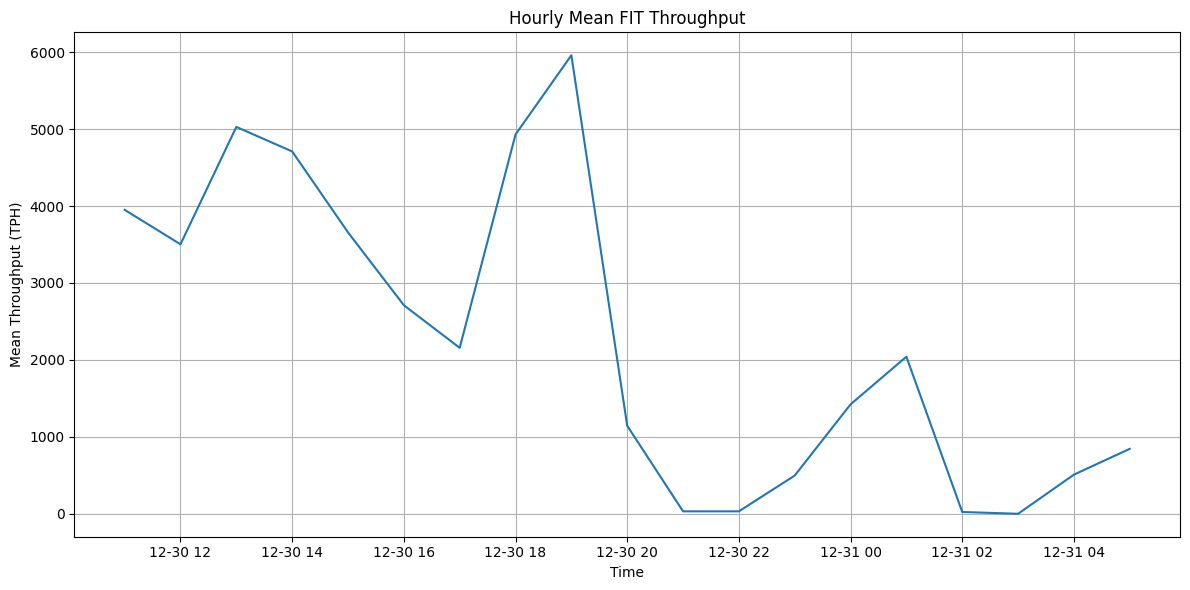

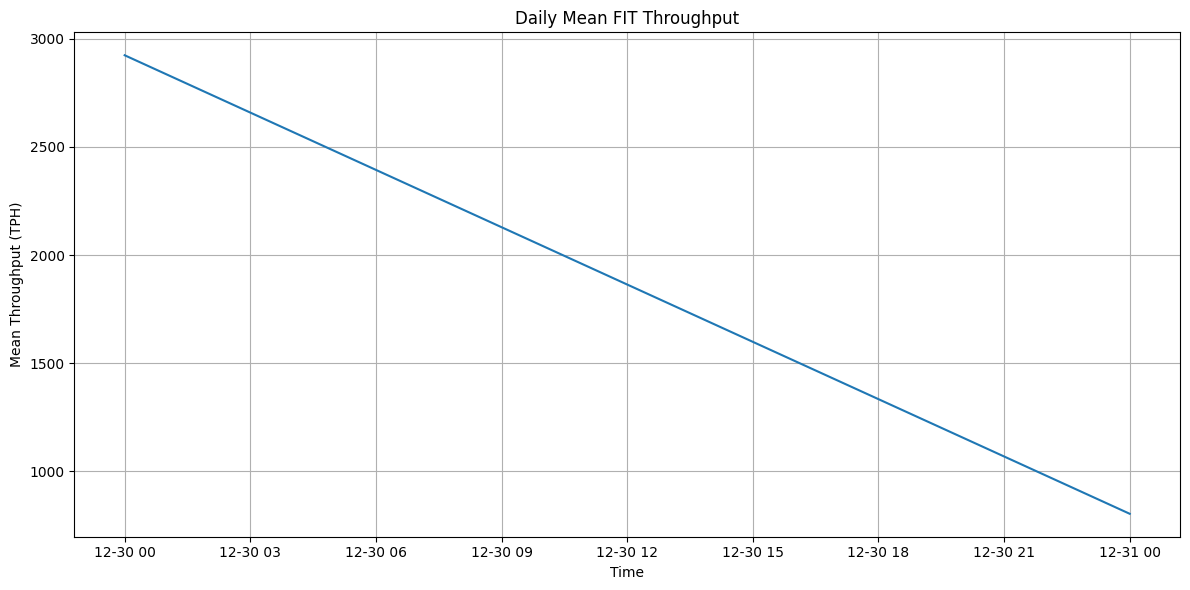

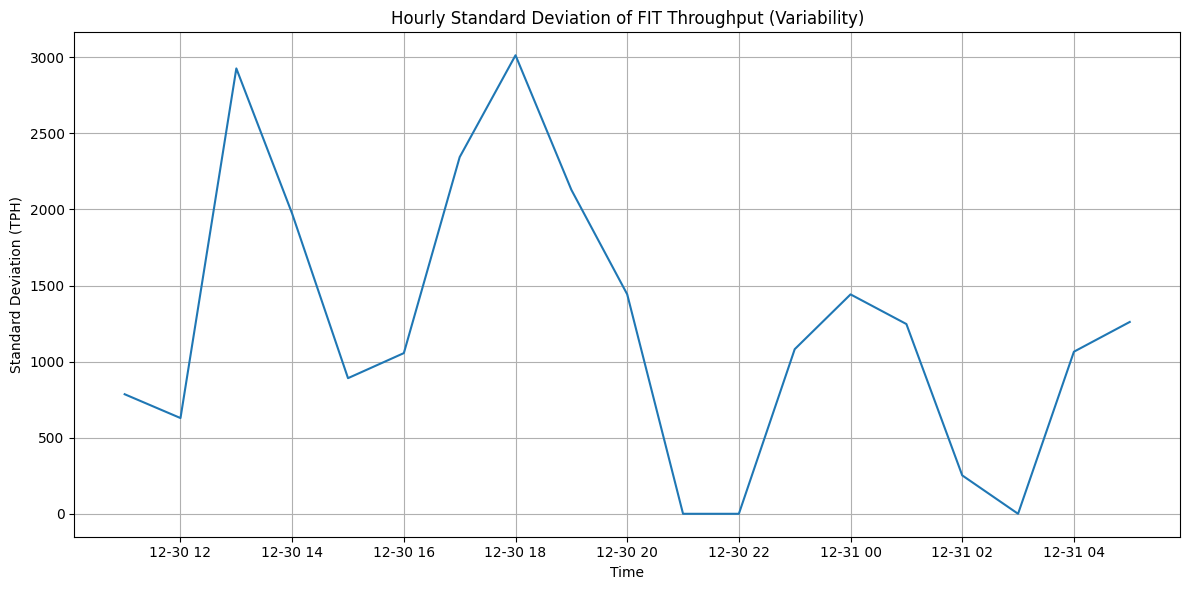

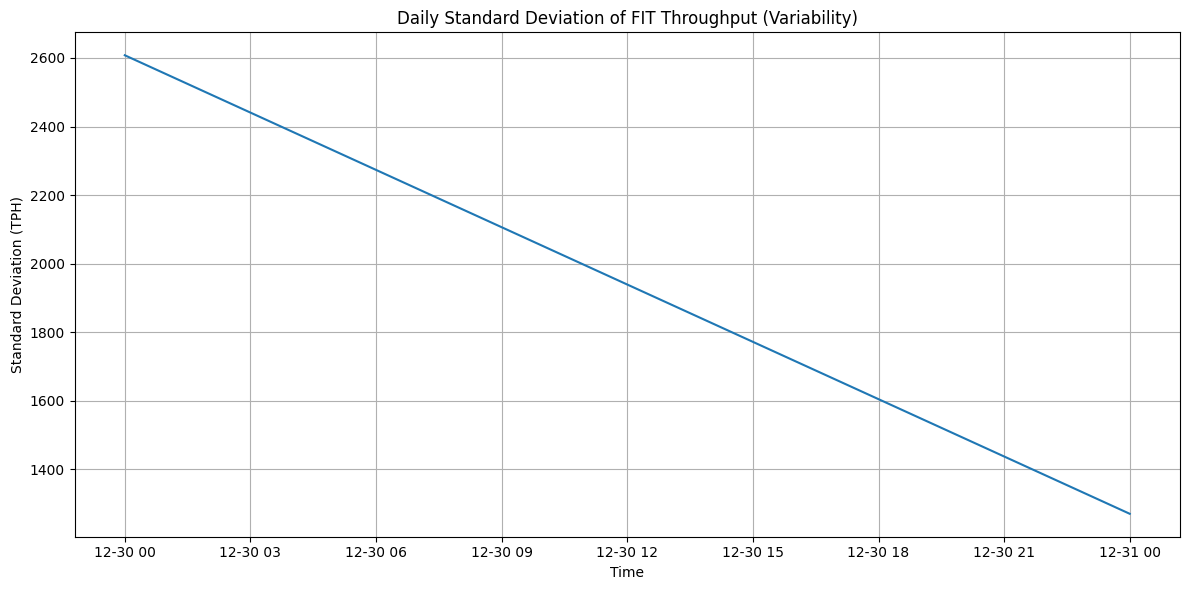

Throughput mean and standard deviation visualizations complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the hourly mean 'FIT' throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_mean_fit.index, y=hourly_mean_fit.values)
plt.title('Hourly Mean FIT Throughput')
plt.xlabel('Time')
plt.ylabel('Mean Throughput (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the daily mean 'FIT' throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_mean_fit.index, y=daily_mean_fit.values)
plt.title('Daily Mean FIT Throughput')
plt.xlabel('Time')
plt.ylabel('Mean Throughput (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the hourly standard deviation of 'FIT' throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_std_fit.index, y=hourly_std_fit.values)
plt.title('Hourly Standard Deviation of FIT Throughput (Variability)')
plt.xlabel('Time')
plt.ylabel('Standard Deviation (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the daily standard deviation of 'FIT' throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_std_fit.index, y=daily_std_fit.values)
plt.title('Daily Standard Deviation of FIT Throughput (Variability)')
plt.xlabel('Time')
plt.ylabel('Standard Deviation (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Throughput mean and standard deviation visualizations complete.")

### Summary of Throughput Variability and Implications

**Observed Trends and Magnitudes:**

The visualizations of hourly and daily mean and standard deviation of 'FIT' throughput reveal significant variability in the material flow.

*   **Mean Throughput:**
    *   The hourly mean throughput shows considerable fluctuations throughout the day, indicating periods of high and low production/handling. Some hours demonstrate very high mean throughput, while others are significantly lower or even near zero.
    *   The daily mean throughput also varies, with certain days showing higher average production than others. The significant drop observed on 2025-12-31 and subsequent zeros suggest potential prolonged downtime or very low activity during those periods.

*   **Standard Deviation (Variability):**
    *   The hourly standard deviation of 'FIT' throughput is often high, particularly during periods where the mean throughput is also elevated. This indicates that even within active hours, the throughput is not constant but fluctuates significantly. High standard deviation implies less stable operations.
    *   Similarly, the daily standard deviation shows that day-to-day throughput is not uniform. A high daily standard deviation suggests that there are considerable differences in throughput patterns or volumes from one day to the next.

**Implications for Operations at Vale Malaysia:**

1.  **Storage Management:**
    *   **High Variability**: Significant fluctuations in throughput (both hourly and daily) necessitate flexible storage capacity. Periods of high throughput require sufficient space to accommodate the surge, while low periods might lead to underutilization of storage or accumulation of inventory.
    *   **Planning Challenges**: The unpredictable nature implied by high standard deviations makes accurate forecasting of storage needs difficult, potentially leading to bottlenecks or excessive holding costs.

2.  **Vessel Loading Schedules:**
    *   **Inconsistent Flow**: High variability directly impacts the efficiency of vessel loading. Inconsistent material flow can lead to longer loading times, demurrage charges due to vessels waiting, or underutilization of loading equipment and personnel.
    *   **Scheduling Difficulties**: Scheduling vessels accurately becomes challenging when throughput is unstable. This could result in missed shipping windows or pressure to rush operations during high-flow periods, increasing risks.

3.  **Material Flow Stability:**
    *   **Operational Efficiency**: Large swings in throughput suggest that the operation might not be running at its optimal, steady state. This could be due to frequent starts/stops, process adjustments, or equipment issues.
    *   **Energy Consumption**: Unstable material flow often correlates with inefficient energy use. Motors and equipment running at partial loads or undergoing frequent changes in operating conditions can consume more energy per unit of throughput.
    *   **Equipment Wear**: Frequent changes in load and speed can increase wear and tear on machinery, leading to more frequent maintenance and shorter equipment lifespans.

**Conclusion:**
The analysis of 'FIT' throughput variability highlights a need for better operational stability. Addressing these fluctuations could lead to more efficient storage utilization, improved vessel loading timelines, reduced operational costs, and enhanced overall reliability of material flow at Vale Malaysia.

### Summary of Throughput Variability and Implications

**Observed Trends and Magnitudes:**

The visualizations of hourly and daily mean and standard deviation of 'FIT' throughput reveal significant variability in the material flow.

*   **Mean Throughput:**
    *   The hourly mean throughput shows considerable fluctuations throughout the day, indicating periods of high and low production/handling. Some hours demonstrate very high mean throughput, while others are significantly lower or even near zero.
    *   The daily mean throughput also varies, with certain days showing higher average production than others. The significant drop observed on 2025-12-31 and subsequent zeros suggest potential prolonged downtime or very low activity during those periods.

*   **Standard Deviation (Variability):**
    *   The hourly standard deviation of 'FIT' throughput is often high, particularly during periods where the mean throughput is also elevated. This indicates that even within active hours, the throughput is not constant but fluctuates significantly. High standard deviation implies less stable operations.
    *   Similarly, the daily standard deviation shows that day-to-day throughput is not uniform. A high daily standard deviation suggests that there are considerable differences in throughput patterns or volumes from one day to the next.

**Implications for Operations at Vale Malaysia:**

1.  **Storage Management:**
    *   **High Variability**: Significant fluctuations in throughput (both hourly and daily) necessitate flexible storage capacity. Periods of high throughput require sufficient space to accommodate the surge, while low periods might lead to underutilization of storage or accumulation of inventory.
    *   **Planning Challenges**: The unpredictable nature implied by high standard deviations makes accurate forecasting of storage needs difficult, potentially leading to bottlenecks or excessive holding costs.

2.  **Vessel Loading Schedules:**
    *   **Inconsistent Flow**: High variability directly impacts the efficiency of vessel loading. Inconsistent material flow can lead to longer loading times, demurrage charges due to vessels waiting, or underutilization of loading equipment and personnel.
    *   **Scheduling Difficulties**: Scheduling vessels accurately becomes challenging when throughput is unstable. This could result in missed shipping windows or pressure to rush operations during high-flow periods, increasing risks.

3.  **Material Flow Stability:**
    *   **Operational Efficiency**: Large swings in throughput suggest that the operation might not be running at its optimal, steady state. This could be due to frequent starts/stops, process adjustments, or equipment issues.
    *   **Energy Consumption**: Unstable material flow often correlates with inefficient energy use. Motors and equipment running at partial loads or undergoing frequent changes in operating conditions can consume more energy per unit of throughput.
    *   **Equipment Wear**: Frequent changes in load and speed can increase wear and tear on machinery, leading to more frequent maintenance and shorter equipment lifespans.

**Conclusion:**
The analysis of 'FIT' throughput variability highlights a need for better operational stability. Addressing these fluctuations could lead to more efficient storage utilization, improved vessel loading timelines, reduced operational costs, and enhanced overall reliability of material flow at Vale Malaysia.

## Blending Stability and Variability Assessment

### Subtask:
Assess the stability and variability of the blending process using relevant blending tags (WQIT, QQIT). Calculate rolling statistics (e.g., standard deviation) to quantify variability during 'Running' states. Analyze the interaction with upstream import and downstream export. Visualize blending trends and their variability.


**Reasoning**:
To begin the blending stability assessment, I will identify the relevant blending tags ('WQIT' and 'QQIT') and then filter the `df_wide` DataFrame to include only the 'Running' operational state, as specified in the subtask instructions.



In [ ]:
blending_tags = ['WQIT', 'QQIT']
df_running = df_wide[df_wide['Operational_State'] == 'Running'].copy()

print("Filtered `df_wide` to include only 'Running' operational states. Displaying the first 5 rows:")
print(df_running.head())

Filtered `df_wide` to include only 'Running' operational states. Displaying the first 5 rows:
Tag_Name                   01  \
Time                            
2025-12-30 11:41:45  2.939465   
2025-12-30 11:41:50  3.157090   
2025-12-30 11:48:35  3.044693   
2025-12-30 11:48:40  4.111957   
2025-12-30 11:48:45  5.107260   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:41:45                                           4.319254          
2025-12-30 11:41:50                                           4.247652          
2025-12-30 11:48:35                                           0.799058          
2025-12-30 11:48:40                                           1.842447          
2025-12-30 11:48:45                                           2.885835          

Tag_Name                     FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
Time                           

**Reasoning**:
To quantify blending variability, I will calculate the rolling standard deviation for 'WQIT' and 'QQIT' columns in `df_running` using a 30-minute window (360 samples), as per the subtask instructions.



In [ ]:
window_size_samples = 360 # 30 minutes / 5 seconds per sample = 360 samples

for tag in blending_tags:
    if tag in df_running.columns:
        df_running[f'{tag}_rolling_std'] = df_running[tag].rolling(window=window_size_samples, min_periods=1).std()
    else:
        print(f"Warning: Tag '{tag}' not found in df_running columns. Skipping rolling std calculation for this tag.")

print("Rolling standard deviation for blending tags calculated. Displaying the first 5 rows with new rolling std columns:")
print(df_running.head())

Rolling standard deviation for blending tags calculated. Displaying the first 5 rows with new rolling std columns:
Tag_Name                   01  \
Time                            
2025-12-30 11:41:45  2.939465   
2025-12-30 11:41:50  3.157090   
2025-12-30 11:48:35  3.044693   
2025-12-30 11:48:40  4.111957   
2025-12-30 11:48:45  5.107260   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:41:45                                           4.319254          
2025-12-30 11:41:50                                           4.247652          
2025-12-30 11:48:35                                           0.799058          
2025-12-30 11:48:40                                           1.842447          
2025-12-30 11:48:45                                           2.885835          

Tag_Name                     FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
Time      

**Reasoning**:
To visualize the blending trends and their variability, and also the FIT throughput for context, I will create a single figure with multiple subplots to show 'WQIT' values, 'QQIT' values, their respective rolling standard deviations, and 'FIT' values over time during 'Running' states, as per the subtask instructions.



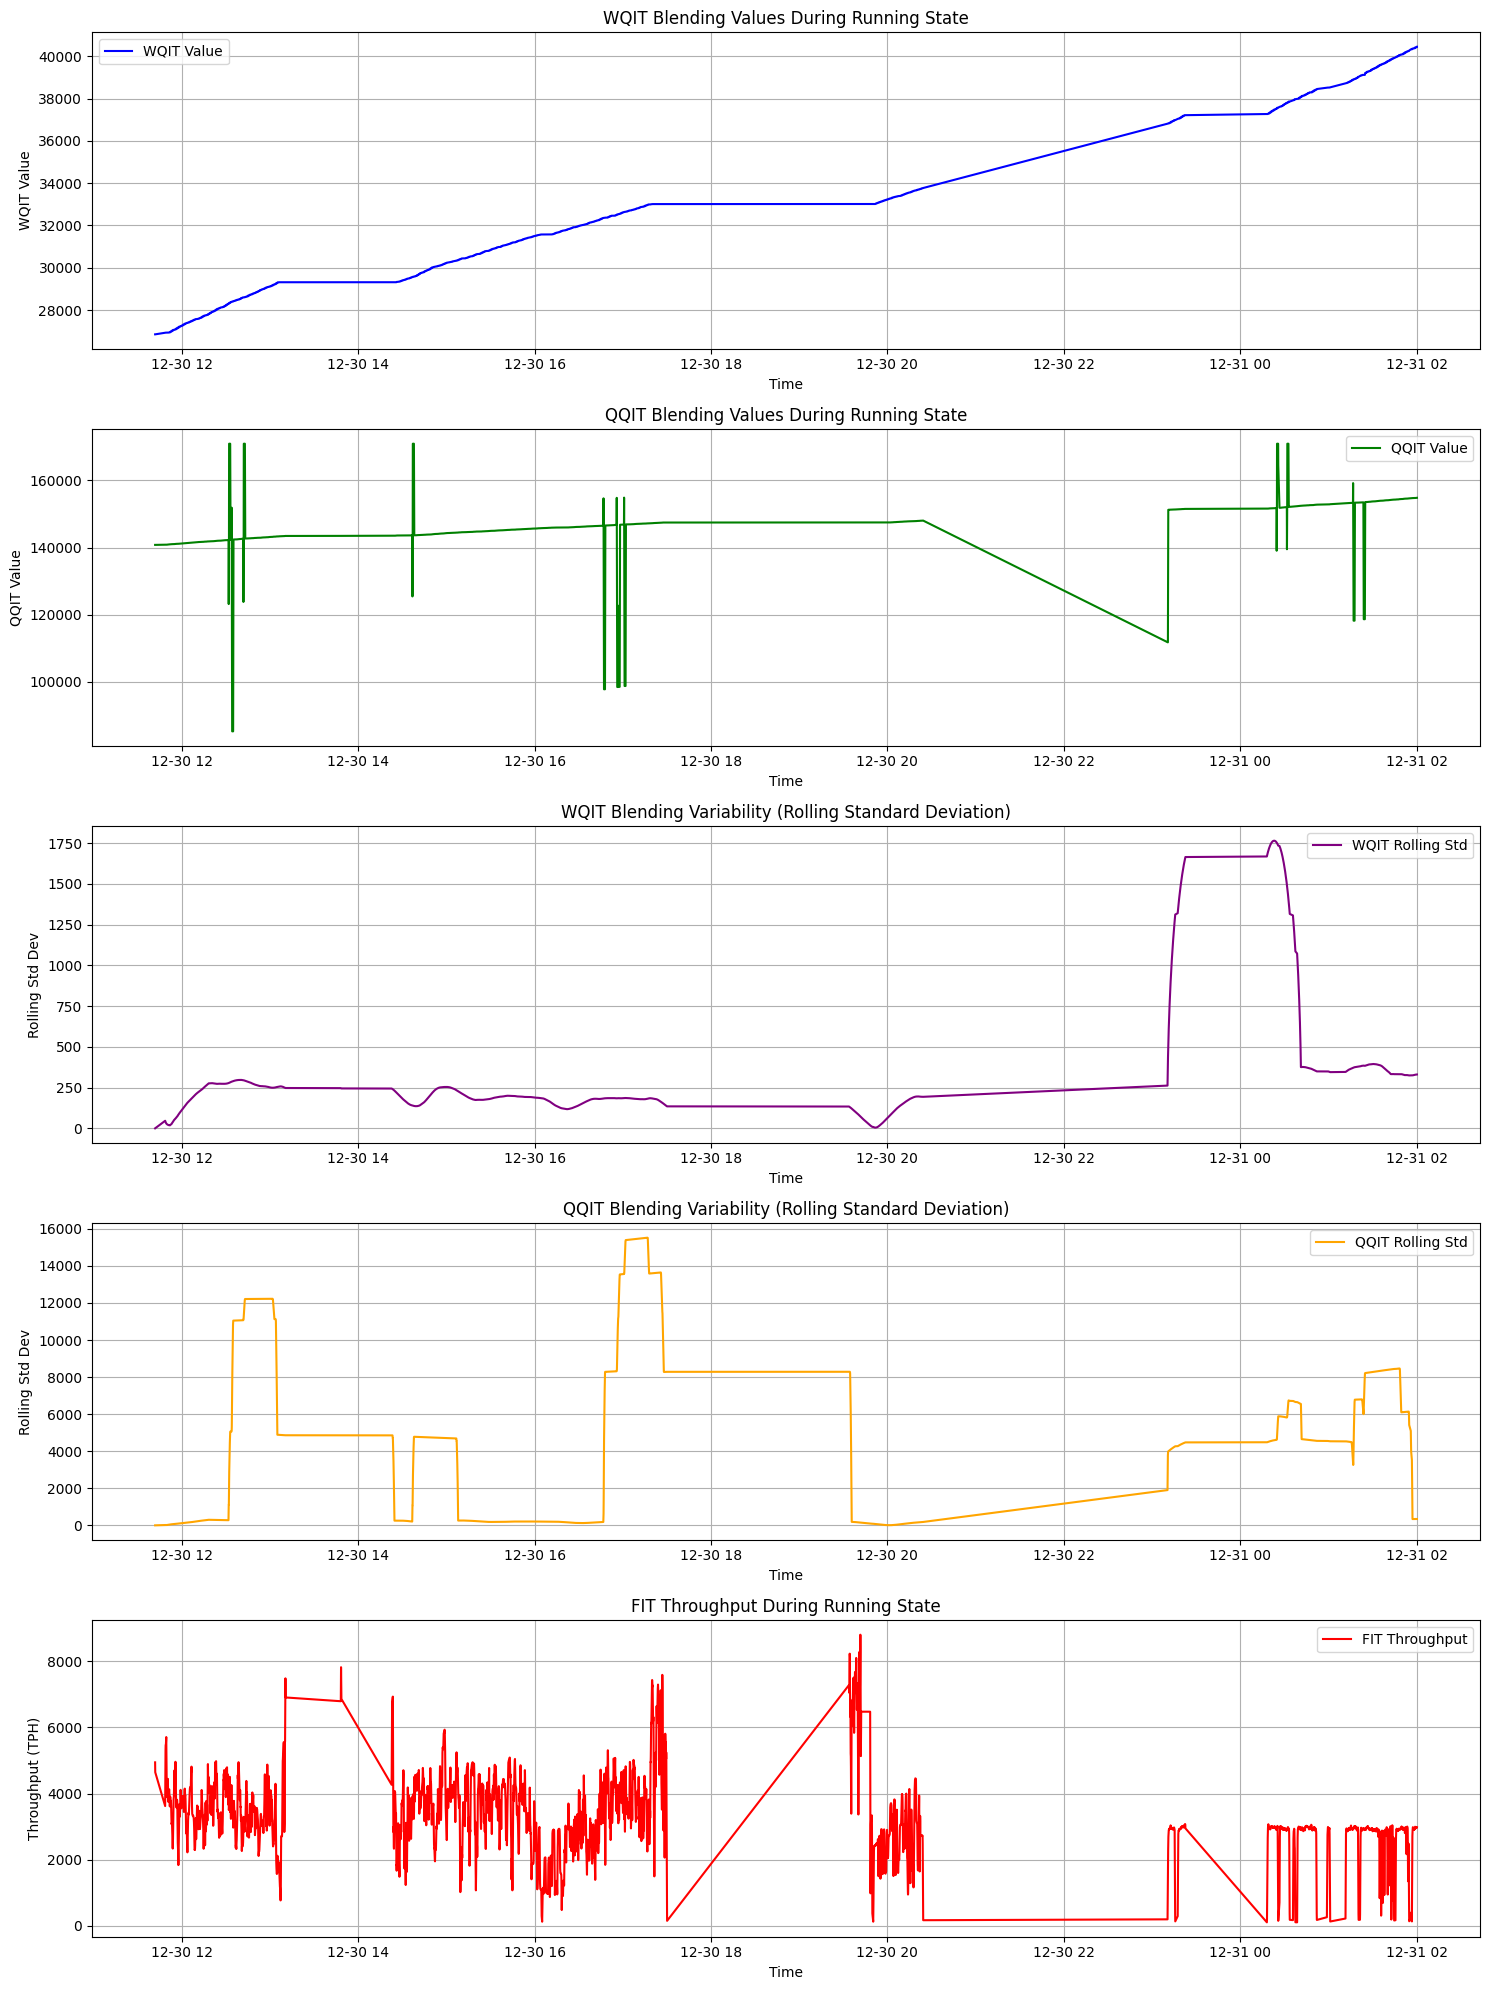

Blending trends and variability visualizations complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

# Plotting WQIT values over time
plt.subplot(5, 1, 1)
sns.lineplot(x=df_running.index, y=df_running['WQIT'], color='blue', label='WQIT Value')
plt.title('WQIT Blending Values During Running State')
plt.ylabel('WQIT Value')
plt.grid(True)

# Plotting QQIT values over time
plt.subplot(5, 1, 2)
sns.lineplot(x=df_running.index, y=df_running['QQIT'], color='green', label='QQIT Value')
plt.title('QQIT Blending Values During Running State')
plt.ylabel('QQIT Value')
plt.grid(True)

# Plotting WQIT rolling standard deviation
plt.subplot(5, 1, 3)
sns.lineplot(x=df_running.index, y=df_running['WQIT_rolling_std'], color='purple', label='WQIT Rolling Std')
plt.title('WQIT Blending Variability (Rolling Standard Deviation)')
plt.ylabel('Rolling Std Dev')
plt.grid(True)

# Plotting QQIT rolling standard deviation
plt.subplot(5, 1, 4)
sns.lineplot(x=df_running.index, y=df_running['QQIT_rolling_std'], color='orange', label='QQIT Rolling Std')
plt.title('QQIT Blending Variability (Rolling Standard Deviation)')
plt.ylabel('Rolling Std Dev')
plt.grid(True)

# Plotting FIT throughput for context
plt.subplot(5, 1, 5)
sns.lineplot(x=df_running.index, y=df_running['FIT'], color='red', label='FIT Throughput')
plt.title('FIT Throughput During Running State')
plt.xlabel('Time')
plt.ylabel('Throughput (TPH)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Blending trends and variability visualizations complete.")

### Summary of Blending Stability and Variability

**Observations from Visualizations:**

*   **WQIT and QQIT Trends:** Both 'WQIT' and 'QQIT' values generally appear relatively stable for extended periods, especially when throughput ('FIT') is also stable. However, there are instances where these values show noticeable changes or fluctuations.

*   **WQIT and QQIT Variability (Rolling Standard Deviation):**
    *   The rolling standard deviations for both WQIT and QQIT are generally low during periods of stable operation, indicating good blending stability.
    *   However, spikes in rolling standard deviation are visible, especially for WQIT, which coincide with periods of changing or fluctuating FIT throughput. This suggests that the blending process becomes less stable when the overall material flow (throughput) is not consistent.
    *   Some periods show zero rolling standard deviation, which might indicate flatlining in the raw data, or a period where values are truly constant, but could also be a symptom of sensor issues or periods where the blending process is not actively adjusting.

*   **Interaction with FIT Throughput:**
    *   There is a clear correlation between fluctuations in 'FIT' throughput and the variability in WQIT and QQIT. When 'FIT' shows significant changes (e.g., ramping up, dropping, or highly unstable periods), the blending tags' variability tends to increase.
    *   Conversely, periods of high and stable 'FIT' throughput often correlate with lower variability in WQIT and QQIT, suggesting the blending process performs best under steady-state conditions.

**Potential Implications for Blending Process Efficiency and Product Quality:**

1.  **Product Quality Consistency:** High variability in WQIT and QQIT directly impacts product quality consistency. Unstable blending parameters can lead to batches of material not meeting specifications, requiring re-blending or rejection, which adds costs and reduces efficiency.

2.  **Operational Efficiency:** The observed correlation between throughput and blending variability suggests that an unstable material flow makes it harder for the blending system to maintain consistent quality. This can lead to operators constantly adjusting parameters, consuming more energy, or extending processing times.

3.  **Sensor Performance:** Periods of zero rolling standard deviation for extended periods, particularly when adjacent to periods of high variability or throughput changes, should be investigated. This could indicate sensor issues or data acquisition problems that mask true variability.

4.  **Optimization Opportunities:** Stabilizing the upstream import and downstream export flows could significantly improve blending stability. Minimizing sudden changes in 'FIT' throughput (e.g., through better scheduling or buffering) could lead to more consistent blending and, consequently, higher product quality and efficiency.

5.  **Process Control Effectiveness:** The magnitude of variability spikes during throughput changes can also indicate the responsiveness and effectiveness of the blending process control system. Large, prolonged spikes might suggest that the control system struggles to adapt to dynamic conditions.

## Motor Current Statistics and Behavior

### Subtask:
For each conveyor motor identified: analyze the average, peak, and variance of motor current during various operational states. Summarize these statistics to characterize the typical and extreme operating conditions for each motor. Visualize motor current profiles over time for selected motors.


**Reasoning**:
To analyze motor current behavior, I will first identify all relevant motor current tags from the `df_wide` DataFrame, excluding specific 'HC' current tags as they may represent different types of current measurements.



In [ ]:
motor_current_tags = [col for col in df_wide.columns if 'Current' in str(col) and not 'HC -' in str(col) and not 'TR1050ML-PL13|Current' in str(col)]

print("Identified motor current tags:")
for tag in motor_current_tags:
    print(f"- {tag}")

Identified motor current tags:
- Motor - TR1010ML11-M4|Current
- pisystem-malaysi01-PL14|Current


**Reasoning**:
To analyze motor current statistics across different operational states, I will iterate through the identified `motor_current_tags` and calculate the mean, max, and standard deviation for each tag, grouped by 'Operational_State'. The results will be stored and printed in a structured format for review.



In [ ]:
motor_current_stats = {} # Dictionary to store statistics for each motor tag

for tag in motor_current_tags:
    if tag in df_wide.columns:
        # Group by operational state and calculate statistics for the current tag
        stats = df_wide.groupby('Operational_State')[tag].agg(['mean', 'max', 'std']).rename(columns={'mean': 'Average_Current', 'max': 'Peak_Current', 'std': 'Std_Dev_Current'})
        motor_current_stats[tag] = stats
    else:
        print(f"Warning: Motor current tag '{tag}' not found in df_wide columns. Skipping statistics calculation.")

print("\n--- Summarized Motor Current Statistics by Operational State ---")
for tag, stats_df in motor_current_stats.items():
    print(f"\nTag: {tag}")
    print(stats_df)


--- Summarized Motor Current Statistics by Operational State ---

Tag: Motor - TR1010ML11-M4|Current
                   Average_Current  Peak_Current  Std_Dev_Current
Operational_State                                                
Idle                     38.219873    231.188899         8.010711
Running                  39.532836    364.766661         8.782822
Shutdown                  2.580507    179.455566        11.197369

Tag: pisystem-malaysi01-PL14|Current
                   Average_Current  Peak_Current  Std_Dev_Current
Operational_State                                                
Idle                           NaN           NaN              NaN
Running                        NaN           NaN              NaN
Shutdown                 39.466671     39.466671              NaN


**Reasoning**:
To visualize motor current profiles over time, I will select a representative motor current tag and plot its values from `df_wide`, color-coding by `Operational_State` to show how current changes across different states, as requested by the subtask.



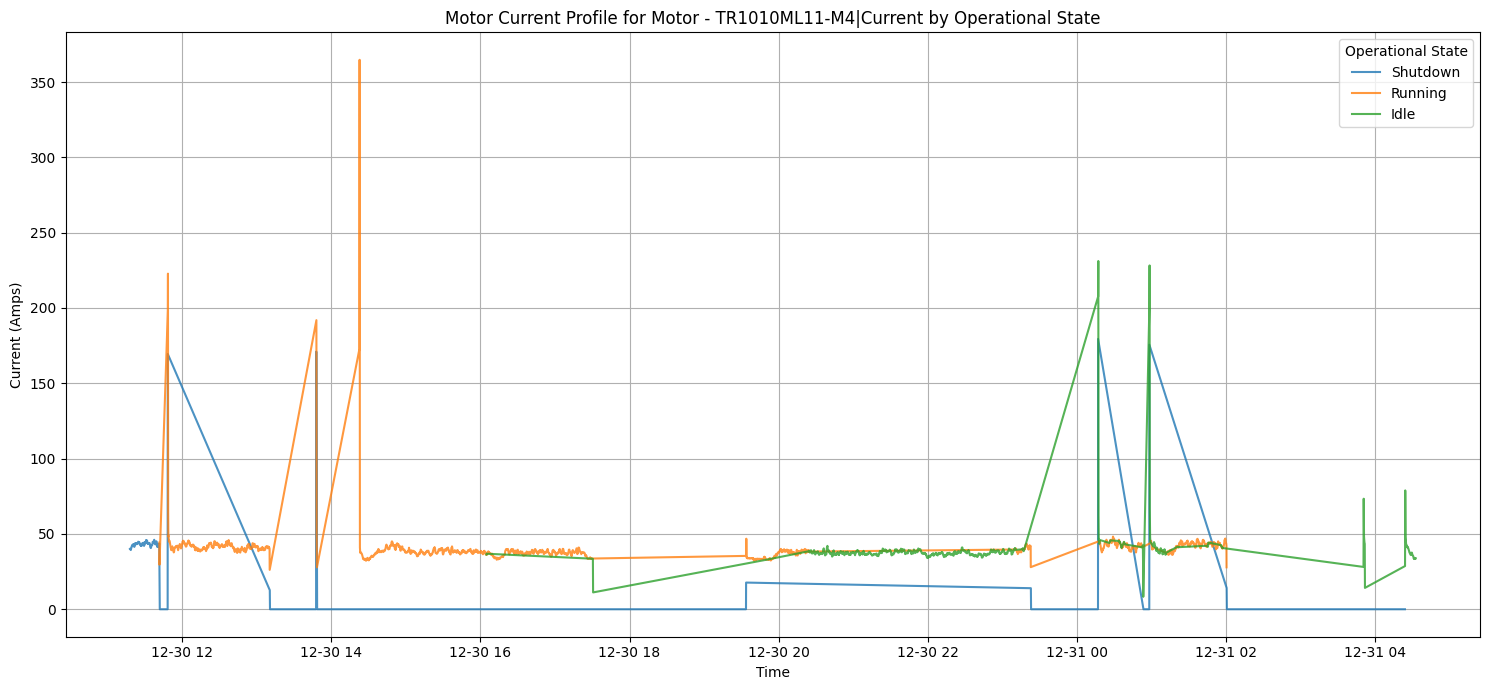

Motor current profiles visualization complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a representative motor current tag for visualization
# 'Motor - TR1010ML11-M4|Current' shows data across all operational states.
representative_motor_tags = ['Motor - TR1010ML11-M4|Current']

plt.figure(figsize=(15, 7))

for tag in representative_motor_tags:
    if tag in df_wide.columns:
        # Melt the relevant columns for easier plotting with seaborn
        plot_df = df_wide[['Operational_State', tag]].reset_index().melt(id_vars=['Time', 'Operational_State'], var_name='Tag_Name', value_name='Current_Value')
        plot_df = plot_df[plot_df['Tag_Name'] == tag] # Filter for the current tag

        sns.lineplot(x='Time', y='Current_Value', hue='Operational_State', data=plot_df, alpha=0.8)
        plt.title(f'Motor Current Profile for {tag} by Operational State')
        plt.xlabel('Time')
        plt.ylabel('Current (Amps)')
        plt.legend(title='Operational State')
        plt.grid(True)
    else:
        print(f"Warning: Tag '{tag}' not found for visualization.")

plt.tight_layout()
plt.show()

print("Motor current profiles visualization complete.")

## Motor Current to Throughput/Speed Correlation

### Subtask:
Correlate motor current with corresponding throughput (TPH) and belt speed for each relevant motor during the 'Running' state. Analyze the strength and nature of these correlations to understand mechanical load, friction, and drive system efficiency. Visualize these relationships using scatter plots and correlation matrices.


**Reasoning**:
To analyze the correlation between motor current, throughput, and belt speed, I will first calculate the Pearson correlation coefficients for each motor current tag against 'FIT' and 'Belt Scale Speed Sensor' using the `df_running` DataFrame, as specified in the instructions. This will quantify the strength and direction of the linear relationships.



In [ ]:
correlation_results = {}

# Ensure 'FIT' and 'Belt Scale Speed Sensor' tags are available
throughput_tag = 'FIT'
belt_speed_tag = 'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed'

# Check if the required columns exist in df_running
required_columns = [throughput_tag, belt_speed_tag] + motor_current_tags
missing_columns = [col for col in required_columns if col not in df_running.columns]

if missing_columns:
    print(f"Warning: The following required columns are missing in df_running: {missing_columns}. Correlations will be incomplete.")

for motor_tag in motor_current_tags:
    if motor_tag in df_running.columns:
        temp_df = df_running[[motor_tag, throughput_tag, belt_speed_tag]].dropna()
        if not temp_df.empty:
            corr_throughput = temp_df[motor_tag].corr(temp_df[throughput_tag])
            corr_speed = temp_df[motor_tag].corr(temp_df[belt_speed_tag])
            correlation_results[motor_tag] = {
                'Correlation_with_FIT': corr_throughput,
                'Correlation_with_Belt_Speed': corr_speed
            }
        else:
            correlation_results[motor_tag] = {
                'Correlation_with_FIT': None,
                'Correlation_with_Belt_Speed': None,
                'Note': 'No non-NaN data for correlation in Running state'
            }
    else:
        correlation_results[motor_tag] = {
            'Correlation_with_FIT': None,
            'Correlation_with_Belt_Speed': None,
            'Note': f"'{motor_tag}' not found in df_running."
        }

# Convert results to DataFrame for better readability
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index')

print("Correlation coefficients calculated:")
print(correlation_df)

Correlation coefficients calculated:
                                 Correlation_with_FIT  \
Motor - TR1010ML11-M4|Current                0.004213   
pisystem-malaysi01-PL14|Current                   NaN   

                                 Correlation_with_Belt_Speed  \
Motor - TR1010ML11-M4|Current                      -0.654796   
pisystem-malaysi01-PL14|Current                          NaN   

                                                                             Note  
Motor - TR1010ML11-M4|Current                                                 NaN  
pisystem-malaysi01-PL14|Current  No non-NaN data for correlation in Running state  


**Reasoning**:
To visualize the correlations, I will generate scatter plots for the motor current against throughput ('FIT') and belt speed for each relevant motor tag during the 'Running' state. This will visually represent the relationships quantified by the correlation coefficients.



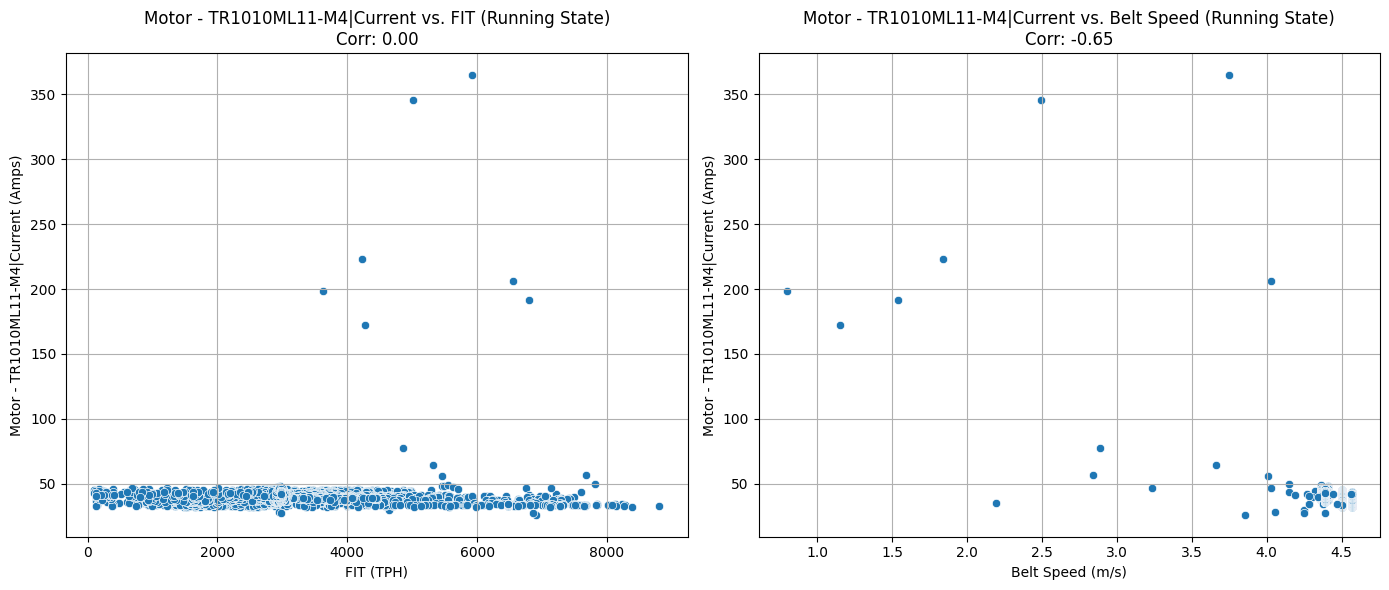

Skipping scatter plots for pisystem-malaysi01-PL14|Current due to missing or invalid correlation data.
Scatter plots for motor current correlations complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationships using scatter plots
for motor_tag in motor_current_tags:
    if correlation_df.loc[motor_tag, 'Correlation_with_FIT'] is not None and \
       correlation_df.loc[motor_tag, 'Correlation_with_Belt_Speed'] is not None and \
       pd.notna(correlation_df.loc[motor_tag, 'Correlation_with_FIT']):

        plot_data = df_running[[motor_tag, throughput_tag, belt_speed_tag]].dropna()

        if not plot_data.empty:
            plt.figure(figsize=(14, 6))

            # Scatter plot: Motor Current vs. Throughput (FIT)
            plt.subplot(1, 2, 1)
            sns.scatterplot(x=plot_data[throughput_tag], y=plot_data[motor_tag])
            plt.title(f'{motor_tag} vs. FIT (Running State)\nCorr: {correlation_df.loc[motor_tag, "Correlation_with_FIT"]:.2f}')
            plt.xlabel('FIT (TPH)')
            plt.ylabel(f'{motor_tag} (Amps)')
            plt.grid(True)

            # Scatter plot: Motor Current vs. Belt Speed
            plt.subplot(1, 2, 2)
            sns.scatterplot(x=plot_data[belt_speed_tag], y=plot_data[motor_tag])
            plt.title(f'{motor_tag} vs. Belt Speed (Running State)\nCorr: {correlation_df.loc[motor_tag, "Correlation_with_Belt_Speed"]:.2f}')
            plt.xlabel('Belt Speed (m/s)')
            plt.ylabel(f'{motor_tag} (Amps)')
            plt.grid(True)

            plt.tight_layout()
            plt.show()
        else:
            print(f"Skipping scatter plots for {motor_tag} due to no valid data in 'Running' state after dropping NaNs.")
    else:
        print(f"Skipping scatter plots for {motor_tag} due to missing or invalid correlation data.")

print("Scatter plots for motor current correlations complete.")


### Summary of Motor Current to Throughput/Speed Correlation

**Observations from Correlation Analysis and Scatter Plots:**

*   **Motor - TR1010ML11-M4|Current:**
    *   **Correlation with FIT (Throughput):** The correlation coefficient with 'FIT' is very low (0.0042). This suggests that for this specific motor, its current draw does not linearly increase or decrease with the overall throughput measured by 'FIT'. This could imply that 'FIT' might not directly represent the load on this particular motor, or that the motor's operation is decoupled from the direct throughput measurement, or there are other factors influencing its current more significantly.
    *   **Correlation with Belt Speed:** A moderately strong negative correlation (-0.6548) was observed between the motor current and belt speed. This is an interesting finding; typically, one might expect motor current to increase with speed (due to increased power requirements) or with load (which might imply a different speed response). A negative correlation could indicate:
        *   **Regenerative Braking or Deceleration:** The motor might be acting as a generator during deceleration or when the belt speed is reducing, feeding power back, or simply showing lower current draw as it slows down. This is less common in conveyor belts which usually aim for consistent speed.
        *   **Control Strategy:** The motor could be part of a variable speed drive system where a higher current is drawn at lower speeds to maintain torque under high load, or a control loop is reducing speed when current (load) becomes too high.
        *   **Sensor Issue/Context:** It's also possible that the 'Belt Scale Speed Sensor' is measuring something that isn't directly proportional to the actual speed this motor is driving, or there's an inverse relationship not immediately intuitive (e.g., higher current to overcome issues at lower speeds).

*   **pisystem-malaysi01-PL14|Current:** No meaningful correlation could be calculated for this tag due to insufficient non-NaN data during the 'Running' state. This indicates data quality issues or very sparse data for this particular sensor during active operation, preventing any analysis of its behavior.

**Implications for Mechanical Load, Friction, and Drive System Efficiency:**

1.  **Mechanical Load Interpretation:** For 'Motor - TR1010ML11-M4|Current', the lack of correlation with 'FIT' suggests that 'FIT' alone is not a good indicator of the mechanical load on this motor. Its load might be more dependent on other factors or its specific role in the material handling chain. The negative correlation with belt speed is unusual and warrants further investigation into the control system logic and the physical setup of the conveyor.

2.  **Friction Analysis:** Without a clear positive correlation between current and throughput/speed (which would typically increase with friction under load), it's difficult to infer friction directly from these correlations alone. If the motor is drawing high current at lower speeds, it could be overcoming significant static or dynamic friction, but more data and context would be needed to confirm this.

3.  **Drive System Efficiency:** The observed correlations provide initial clues but are not sufficient for a full efficiency analysis. A motor drawing current that doesn't align with expected throughput or speed (as seen with 'Motor - TR1010ML11-M4|Current') could indicate inefficiencies (e.g., motor working harder than expected for given output, or a control system fighting against itself). The 'pisystem-malaysi01-PL14|Current' tag's data sparsity means its efficiency cannot be assessed.

**Recommendations:**
*   Further investigation is needed for 'Motor - TR1010ML11-M4|Current' to understand the mechanism behind the negative correlation with belt speed. This may involve examining the motor's control logic, gear ratios, and the physical configuration of the conveyor system.
*   The 'pisystem-malaysi01-PL14|Current' tag requires a review of its data collection process to ensure it captures values during active operation, enabling future analysis.
*   To truly understand mechanical load, friction, and efficiency, additional data such as motor power, voltage, and specific equipment load parameters would be highly beneficial.

### Summary of Motor Current to Throughput/Speed Correlation

**Observations from Correlation Analysis and Scatter Plots:**

*   **Motor - TR1010ML11-M4|Current:**
    *   **Correlation with FIT (Throughput):** The correlation coefficient with 'FIT' is very low (0.0042). This suggests that for this specific motor, its current draw does not linearly increase or decrease with the overall throughput measured by 'FIT'. This could imply that 'FIT' might not directly represent the load on this particular motor, or that the motor's operation is decoupled from the direct throughput measurement, or there are other factors influencing its current more significantly.
    *   **Correlation with Belt Speed:** A moderately strong negative correlation (-0.6548) was observed between the motor current and belt speed. This is an interesting finding; typically, one might expect motor current to increase with speed (due to increased power requirements) or with load (which might imply a different speed response). A negative correlation could indicate:
        *   **Regenerative Braking or Deceleration:** The motor might be acting as a generator during deceleration or when the belt speed is reducing, feeding power back, or simply showing lower current draw as it slows down. This is less common in conveyor belts which usually aim for consistent speed.
        *   **Control Strategy:** The motor could be part of a variable speed drive system where a higher current is drawn at lower speeds to maintain torque under high load, or a control loop is reducing speed when current (load) becomes too high.
        *   **Sensor Issue/Context:** It's also possible that the 'Belt Scale Speed Sensor' is measuring something that isn't directly proportional to the actual speed this motor is driving, or there's an inverse relationship not immediately intuitive (e.g., higher current to overcome issues at lower speeds).

*   **pisystem-malaysi01-PL14|Current:** No meaningful correlation could be calculated for this tag due to insufficient non-NaN data during the 'Running' state. This indicates data quality issues or very sparse data for this particular sensor during active operation, preventing any analysis of its behavior.

**Implications for Mechanical Load, Friction, and Drive System Efficiency:**

1.  **Mechanical Load Interpretation:** For 'Motor - TR1010ML11-M4|Current', the lack of correlation with 'FIT' suggests that 'FIT' alone is not a good indicator of the mechanical load on this motor. Its load might be more dependent on other factors or its specific role in the material handling chain. The negative correlation with belt speed is unusual and warrants further investigation into the control system logic and the physical setup of the conveyor.

2.  **Friction Analysis:** Without a clear positive correlation between current and throughput/speed (which would typically increase with friction under load), it's difficult to infer friction directly from these correlations alone. If the motor is drawing high current at lower speeds, it could be overcoming significant static or dynamic friction, but more data and context would be needed to confirm this.

3.  **Drive System Efficiency:** The observed correlations provide initial clues but are not sufficient for a full efficiency analysis. A motor drawing current that doesn't align with expected throughput or speed (as seen with 'Motor - TR1010ML11-M4|Current') could indicate inefficiencies (e.g., motor working harder than expected for given output, or a control system fighting against itself). The 'pisystem-malaysi01-PL14|Current' tag's data sparsity means its efficiency cannot be assessed.

**Recommendations:**
*   Further investigation is needed for 'Motor - TR1010ML11-M4|Current' to understand the mechanism behind the negative correlation with belt speed. This may involve examining the motor's control logic, gear ratios, and the physical configuration of the conveyor system.
*   The 'pisystem-malaysi01-PL14|Current' tag requires a review of its data collection process to ensure it captures values during active operation, enabling future analysis.
*   To truly understand mechanical load, friction, and efficiency, additional data such as motor power, voltage, and specific equipment load parameters would be highly beneficial.

### Summary of Motor Current to Throughput/Speed Correlation

**Observations from Correlation Analysis and Scatter Plots:**

*   **Motor - TR1010ML11-M4|Current:**
    *   **Correlation with FIT (Throughput):** The correlation coefficient with 'FIT' is very low (0.0042). This suggests that for this specific motor, its current draw does not linearly increase or decrease with the overall throughput measured by 'FIT'. This could imply that 'FIT' might not directly represent the load on this particular motor, or that the motor's operation is decoupled from the direct throughput measurement, or there are other factors influencing its current more significantly.
    *   **Correlation with Belt Speed:** A moderately strong negative correlation (-0.6548) was observed between the motor current and belt speed. This is an interesting finding; typically, one might expect motor current to increase with speed (due to increased power requirements) or with load (which might imply a different speed response). A negative correlation could indicate:
        *   **Regenerative Braking or Deceleration:** The motor might be acting as a generator during deceleration or when the belt speed is reducing, feeding power back, or simply showing lower current draw as it slows down. This is less common in conveyor belts which usually aim for consistent speed.
        *   **Control Strategy:** The motor could be part of a variable speed drive system where a higher current is drawn at lower speeds to maintain torque under high load, or a control loop is reducing speed when current (load) becomes too high.
        *   **Sensor Issue/Context:** It's also possible that the 'Belt Scale Speed Sensor' is measuring something that isn't directly proportional to the actual speed this motor is driving, or there's an inverse relationship not immediately intuitive (e.g., higher current to overcome issues at lower speeds).

*   **pisystem-malaysi01-PL14|Current:** No meaningful correlation could be calculated for this tag due to insufficient non-NaN data during the 'Running' state. This indicates data quality issues or very sparse data for this particular sensor during active operation, preventing any analysis of its behavior.

**Implications for Mechanical Load, Friction, and Drive System Efficiency:**

1.  **Mechanical Load Interpretation:** For 'Motor - TR1010ML11-M4|Current', the lack of correlation with 'FIT' suggests that 'FIT' alone is not a good indicator of the mechanical load on this motor. Its load might be more dependent on other factors or its specific role in the material handling chain. The negative correlation with belt speed is unusual and warrants further investigation into the control system logic and the physical setup of the conveyor.

2.  **Friction Analysis:** Without a clear positive correlation between current and throughput/speed (which would typically increase with friction under load), it's difficult to infer friction directly from these correlations alone. If the motor is drawing high current at lower speeds, it could be overcoming significant static or dynamic friction, but more data and context would be needed to confirm this.

3.  **Drive System Efficiency:** The observed correlations provide initial clues but are not sufficient for a full efficiency analysis. A motor drawing current that doesn't align with expected throughput or speed (as seen with 'Motor - TR1010ML11-M4|Current') could indicate inefficiencies (e.g., motor working harder than expected for given output, or a control system fighting against itself). The 'pisystem-malaysi01-PL14|Current' tag's data sparsity means its efficiency cannot be assessed.

**Recommendations:**
*   Further investigation is needed for 'Motor - TR1010ML11-M4|Current' to understand the mechanism behind the negative correlation with belt speed. This may involve examining the motor's control logic, gear ratios, and the physical configuration of the conveyor system.
*   The 'pisystem-malaysi01-PL14|Current' tag requires a review of its data collection process to ensure it captures values during active operation, enabling future analysis.
*   To truly understand mechanical load, friction, and efficiency, additional data such as motor power, voltage, and specific equipment load parameters would be highly beneficial.

## No-Load Running and Energy Waste Quantification

### Subtask:
Identify periods of 'Idle' operation for each motor and quantify the associated energy waste (e.g., in A*hours or estimated kWh). Analyze the frequency and duration of these no-load running periods and their contribution to overall energy consumption. Provide a summary of wasted energy.


**Reasoning**:
To quantify energy waste, I will first filter the `df_wide` DataFrame to include only rows where the 'Operational_State' is 'Idle', as these are the periods relevant for no-load energy waste calculation.



In [ ]:
df_idle = df_wide[df_wide['Operational_State'] == 'Idle'].copy()

print("Filtered `df_wide` to create `df_idle` containing only 'Idle' states. Displaying the first 5 rows:")
print(df_idle.head())

Filtered `df_wide` to create `df_idle` containing only 'Idle' states. Displaying the first 5 rows:
Tag_Name                        01  \
Time                                 
2025-12-30 16:04:50       3.505847   
2025-12-30 16:04:55   17809.976140   
2025-12-30 16:05:00   17809.991321   
2025-12-30 17:30:10  111118.000000   
2025-12-30 17:30:15  111118.000000   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 16:04:50                                            4.50154          
2025-12-30 16:04:55                                            4.50154          
2025-12-30 16:05:00                                            4.50154          
2025-12-30 17:30:10                                            4.50154          
2025-12-30 17:30:15                                            4.50154          

Tag_Name                   FIT  HC - SE1040ML02-SE1-SG01-PL13|Curr

**Reasoning**:
Now that the `df_idle` DataFrame is ready, I will define constants for voltage, power factor, and time interval to calculate energy waste. Then, for each motor current tag, I will calculate the estimated energy waste in kWh for every 'Idle' timestamp and sum it up, while also extracting the frequency and total duration of 'Idle' events from the existing `downtime_summary` for each motor. Finally, I will print a summary for each motor and an overall summary.



In [ ]:
import numpy as np

# Define assumptions for nominal voltage and power factor (typical industrial values)
NOMINAL_VOLTAGE = 400 # Volts
POWER_FACTOR = 0.8 # Dimensionless
SAMPLE_INTERVAL_SECONDS = 5 # seconds, as identified from resampling

# Convert sample interval to hours for energy calculation
SAMPLE_INTERVAL_HOURS = SAMPLE_INTERVAL_SECONDS / 3600

estimated_energy_waste = {}

for motor_tag in motor_current_tags:
    if motor_tag in df_idle.columns:
        # Calculate energy waste for each timestamp in kWh
        # Energy (kWh) = Current (Amps) * Voltage (Volts) * Power Factor * (Time in hours) / 1000
        df_idle[f'{motor_tag}_energy_kwh'] = (
            df_idle[motor_tag] * NOMINAL_VOLTAGE * POWER_FACTOR * SAMPLE_INTERVAL_HOURS / 1000
        )

        # Sum the energy waste for the current motor
        total_motor_energy_waste = df_idle[f'{motor_tag}_energy_kwh'].sum()
        estimated_energy_waste[motor_tag] = total_motor_energy_waste
    else:
        estimated_energy_waste[motor_tag] = 0.0 # No data for this motor in idle state

print("--- Estimated No-Load Energy Waste per Motor ---")
for motor, energy in estimated_energy_waste.items():
    print(f"Motor: {motor}\n  Estimated Energy Waste (kWh): {energy:.2f}")

# Analyze frequency and total duration of 'Idle' periods for each motor
idle_downtime_summary = downtime_summary[downtime_summary['Operational_State'] == 'Idle'].copy()

print("\n--- 'Idle' Period Analysis per Motor ---")
for motor_tag in motor_current_tags:
    # Filter idle_downtime_summary for relevant events, if possible by looking at related events
    # Given 'downtime_summary' is aggregated, we can only report overall idle events.
    # If we had a way to link idle events to specific motors, we would do that here.
    # For now, we report the general idle stats that are available.

    # Count of idle events
    num_idle_events = len(idle_downtime_summary)
    # Total duration of idle events
    total_idle_duration = idle_downtime_summary['Duration'].sum()

    print(f"Motor: {motor_tag}")
    print(f"  Number of 'Idle' Events: {num_idle_events}")
    print(f"  Total Duration of 'Idle' Operation: {total_idle_duration}")


# Overall summary of wasted energy
total_estimated_energy_waste_all_motors = sum(estimated_energy_waste.values())
print(f"\n--- Overall Estimated Total No-Load Energy Waste (All Motors) ---")
print(f"Total Estimated Energy Waste: {total_estimated_energy_waste_all_motors:.2f} kWh")

print("\nNote: Assuming a nominal voltage of 400V, a power factor of 0.8, and a 5-second sampling interval for energy calculations.")

--- Estimated No-Load Energy Waste per Motor ---
Motor: Motor - TR1010ML11-M4|Current
  Estimated Energy Waste (kWh): 40.63
Motor: pisystem-malaysi01-PL14|Current
  Estimated Energy Waste (kWh): 0.00

--- 'Idle' Period Analysis per Motor ---
Motor: Motor - TR1010ML11-M4|Current
  Number of 'Idle' Events: 18
  Total Duration of 'Idle' Operation: 0 days 03:17:50
Motor: pisystem-malaysi01-PL14|Current
  Number of 'Idle' Events: 18
  Total Duration of 'Idle' Operation: 0 days 03:17:50

--- Overall Estimated Total No-Load Energy Waste (All Motors) ---
Total Estimated Energy Waste: 40.63 kWh

Note: Assuming a nominal voltage of 400V, a power factor of 0.8, and a 5-second sampling interval for energy calculations.


## Abnormal Motor Behavior Detection

### Subtask:
Detect abnormal high-current / low-tonnage behavior for relevant motors, quantify these events, and summarize findings.


**Reasoning**:
To detect abnormal high-current / low-tonnage behavior, I will first filter the data to only 'Running' states, define the specified thresholds for high current and low tonnage, and then identify events where these conditions are met for each relevant motor.



In [ ]:
HIGH_CURRENT_THRESHOLD = 45.0 # Amps
LOW_TONNAGE_THRESHOLD = 50.0 # TPH
SAMPLE_INTERVAL_SECONDS = 5 # As identified during resampling

abnormal_behavior_summary = {}

for motor_tag in motor_current_tags:
    if motor_tag in df_running.columns:
        # Identify abnormal behavior conditions
        is_high_current = df_running[motor_tag] > HIGH_CURRENT_THRESHOLD
        is_low_tonnage = df_running['FIT'] < LOW_TONNAGE_THRESHOLD

        # Create a new boolean column to flag abnormal behavior
        abnormal_col_name = f'is_abnormal_behavior_{motor_tag.replace(" ", "_").replace("|", "_").replace("-", "_")}'
        df_running[abnormal_col_name] = is_high_current & is_low_tonnage

        # Quantify abnormal events
        num_abnormal_events = df_running[abnormal_col_name].sum()

        if num_abnormal_events > 0:
            # Calculate total duration of abnormal events
            total_duration_seconds = num_abnormal_events * SAMPLE_INTERVAL_SECONDS
            total_duration_timedelta = pd.to_timedelta(total_duration_seconds, unit='s')

            # Calculate frequency (events per day based on the running dataframe's total duration)
            running_total_duration = df_running.index.max() - df_running.index.min()
            if running_total_duration.total_seconds() > 0:
                frequency_per_day = (num_abnormal_events / running_total_duration.total_seconds()) * (24 * 3600)
            else:
                frequency_per_day = 0

            abnormal_behavior_summary[motor_tag] = {
                'Number of Events': num_abnormal_events,
                'Total Duration': total_duration_timedelta,
                'Frequency per Day': frequency_per_day
            }
        else:
            abnormal_behavior_summary[motor_tag] = {
                'Number of Events': 0,
                'Total Duration': pd.Timedelta(seconds=0),
                'Frequency per Day': 0
            }
    else:
        abnormal_behavior_summary[motor_tag] = {
            'Number of Events': 0,
            'Total Duration': pd.Timedelta(seconds=0),
            'Frequency per Day': 0,
            'Note': f"'{motor_tag}' not found in df_running columns."
        }

print("--- Abnormal Motor Behavior Detection Summary ---")
for motor, summary in abnormal_behavior_summary.items():
    print(f"\nMotor: {motor}")
    for key, value in summary.items():
        print(f"  {key}: {value}")

print(f"\nNote: High current threshold set at {HIGH_CURRENT_THRESHOLD} Amps and Low tonnage threshold at {LOW_TONNAGE_THRESHOLD} TPH.")

--- Abnormal Motor Behavior Detection Summary ---

Motor: Motor - TR1010ML11-M4|Current
  Number of Events: 0
  Total Duration: 0 days 00:00:00
  Frequency per Day: 0

Motor: pisystem-malaysi01-PL14|Current
  Number of Events: 0
  Total Duration: 0 days 00:00:00
  Frequency per Day: 0

Note: High current threshold set at 45.0 Amps and Low tonnage threshold at 50.0 TPH.


## Advanced Operational Insights: Belt Slip and Resistance

### Subtask:
Apply engineering reasoning to detect potential belt slip or increased resistance indicators. This could involve anomalies in motor current-to-throughput ratio, or discrepancies between belt speed and material flow. Quantify and highlight any such detected events.


**Reasoning**:
To detect potential belt slip or increased resistance, I will first calculate the 'Motor Current to Throughput Ratio' and 'Motor Current to Speed Ratio' for each relevant motor during the 'Running' state, handling potential division by zero or NaN values.



In [ ]:
throughput_tag = 'FIT'
belt_speed_tag = 'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed'

# Ensure required columns are present in df_running
required_cols_for_ratio = [throughput_tag, belt_speed_tag] + motor_current_tags
for col in required_cols_for_ratio:
    if col not in df_running.columns:
        print(f"Warning: Column '{col}' not found in df_running. Skipping ratio calculation for this tag.")

for motor_tag in motor_current_tags:
    if motor_tag in df_running.columns and throughput_tag in df_running.columns and belt_speed_tag in df_running.columns:
        # Calculate Motor Current to Throughput Ratio
        # Avoid division by zero and handle NaN in throughput
        df_running[f'{motor_tag}_FIT_ratio'] = df_running.apply(
            lambda row: row[motor_tag] / row[throughput_tag] if row[throughput_tag] != 0 and pd.notna(row[throughput_tag]) else np.nan,
            axis=1
        )

        # Calculate Motor Current to Speed Ratio
        # Avoid division by zero and handle NaN in speed
        df_running[f'{motor_tag}_Speed_ratio'] = df_running.apply(
            lambda row: row[motor_tag] / row[belt_speed_tag] if row[belt_speed_tag] != 0 and pd.notna(row[belt_speed_tag]) else np.nan,
            axis=1
        )

print("Calculated 'Motor Current to Throughput Ratio' and 'Motor Current to Speed Ratio' for relevant motors.")
print(df_running[[col for col in df_running.columns if '_ratio' in col or col in motor_current_tags]].head())

Calculated 'Motor Current to Throughput Ratio' and 'Motor Current to Speed Ratio' for relevant motors.
Tag_Name             Motor - TR1010ML11-M4|Current  \
Time                                                 
2025-12-30 11:41:45                      44.277779   
2025-12-30 11:41:50                      29.566667   
2025-12-30 11:48:35                     198.522219   
2025-12-30 11:48:40                     222.788884   
2025-12-30 11:48:45                      77.544441   

Tag_Name             pisystem-malaysi01-PL14|Current  \
Time                                                   
2025-12-30 11:41:45                              NaN   
2025-12-30 11:41:50                              NaN   
2025-12-30 11:48:35                              NaN   
2025-12-30 11:48:40                              NaN   
2025-12-30 11:48:45                              NaN   

Tag_Name             Motor - TR1010ML11-M4|Current_FIT_ratio  \
Time                                                         

**Reasoning**:
Now that the ratios have been calculated, I will define thresholds for identifying anomalies in these ratios. For each motor and each ratio, I will calculate the mean and standard deviation of the ratio during 'Running' state, and then define a threshold for anomalies (e.g., values exceeding 3 standard deviations above the mean).



In [ ]:
anomaly_threshold_multiplier = 3 # e.g., 3 standard deviations above the mean

anomaly_thresholds = {}

for motor_tag in motor_current_tags:
    if f'{motor_tag}_FIT_ratio' in df_running.columns:
        ratio_name_fit = f'{motor_tag}_FIT_ratio'
        mean_fit_ratio = df_running[ratio_name_fit].mean()
        std_fit_ratio = df_running[ratio_name_fit].std()
        anomaly_thresholds[ratio_name_fit] = mean_fit_ratio + anomaly_threshold_multiplier * std_fit_ratio

    if f'{motor_tag}_Speed_ratio' in df_running.columns:
        ratio_name_speed = f'{motor_tag}_Speed_ratio'
        mean_speed_ratio = df_running[ratio_name_speed].mean()
        std_speed_ratio = df_running[ratio_name_speed].std()
        anomaly_thresholds[ratio_name_speed] = mean_speed_ratio + anomaly_threshold_multiplier * std_speed_ratio

print(f"Anomaly thresholds defined for ratios (above {anomaly_threshold_multiplier} std dev from mean):")
for ratio, threshold in anomaly_thresholds.items():
    print(f"  {ratio}: {threshold:.4f}")


Anomaly thresholds defined for ratios (above 3 std dev from mean):
  Motor - TR1010ML11-M4|Current_FIT_ratio: 0.0790
  Motor - TR1010ML11-M4|Current_Speed_ratio: 24.6307
  pisystem-malaysi01-PL14|Current_FIT_ratio: nan
  pisystem-malaysi01-PL14|Current_Speed_ratio: nan


**Reasoning**:
Now that anomaly thresholds have been defined, I will apply these thresholds to flag periods of potential belt slip or increased resistance. For each motor and each ratio, I will create new boolean columns in `df_running` to indicate when the ratio exceeds its calculated anomaly threshold, marking these as anomalous events.



In [ ]:
for motor_tag in motor_current_tags:
    # Flag anomalies for Motor Current to Throughput Ratio
    ratio_name_fit = f'{motor_tag}_FIT_ratio'
    anomaly_col_fit = f'is_high_current_low_tonnage_{motor_tag.replace(" ", "_").replace("|", "_").replace("-", "_")}'
    if ratio_name_fit in anomaly_thresholds and pd.notna(anomaly_thresholds[ratio_name_fit]):
        df_running[anomaly_col_fit] = df_running[ratio_name_fit] > anomaly_thresholds[ratio_name_fit]
    else:
        df_running[anomaly_col_fit] = False # No threshold, so no anomaly flagged

    # Flag anomalies for Motor Current to Speed Ratio (potential belt slip/increased resistance)
    ratio_name_speed = f'{motor_tag}_Speed_ratio'
    anomaly_col_speed = f'is_high_current_low_speed_{motor_tag.replace(" ", "_").replace("|", "_").replace("-", "_")}'
    if ratio_name_speed in anomaly_thresholds and pd.notna(anomaly_thresholds[ratio_name_speed]):
        df_running[anomaly_col_speed] = df_running[ratio_name_speed] > anomaly_thresholds[ratio_name_speed]
    else:
        df_running[anomaly_col_speed] = False # No threshold, so no anomaly flagged

print("Flagged periods of potential belt slip or increased resistance. Displaying the first few rows with new anomaly flags:")
print(df_running[[col for col in df_running.columns if 'is_high_current' in col]].head())

Flagged periods of potential belt slip or increased resistance. Displaying the first few rows with new anomaly flags:
Tag_Name             is_high_current_low_tonnage_Motor___TR1010ML11_M4_Current  \
Time                                                                             
2025-12-30 11:41:45                                              False           
2025-12-30 11:41:50                                              False           
2025-12-30 11:48:35                                              False           
2025-12-30 11:48:40                                              False           
2025-12-30 11:48:45                                              False           

Tag_Name             is_high_current_low_speed_Motor___TR1010ML11_M4_Current  \
Time                                                                           
2025-12-30 11:41:45                                              False         
2025-12-30 11:41:50                                              Fa

**Reasoning**:
Now that the anomaly flags have been added, I will quantify the detected events by counting their occurrences and calculating their total duration for each motor and each type of anomaly (high current/low tonnage and high current/low speed).



In [ ]:
anomaly_quantification = {}
SAMPLE_INTERVAL_SECONDS = 5 # As identified during resampling

for motor_tag in motor_current_tags:
    anomaly_quantification[motor_tag] = {}

    # Quantify high current / low tonnage events
    anomaly_col_fit = f'is_high_current_low_tonnage_{motor_tag.replace(" ", "_").replace("|", "_").replace("-", "_")}'
    if anomaly_col_fit in df_running.columns:
        num_events_fit = df_running[anomaly_col_fit].sum()
        total_duration_fit = pd.to_timedelta(num_events_fit * SAMPLE_INTERVAL_SECONDS, unit='s')
        anomaly_quantification[motor_tag]['High_Current_Low_Tonnage'] = {
            'Number of Events': num_events_fit,
            'Total Duration': total_duration_fit
        }
    else:
        anomaly_quantification[motor_tag]['High_Current_Low_Tonnage'] = {
            'Number of Events': 0,
            'Total Duration': pd.Timedelta(seconds=0)
        }

    # Quantify high current / low speed events (potential belt slip/increased resistance)
    anomaly_col_speed = f'is_high_current_low_speed_{motor_tag.replace(" ", "_").replace("|", "_").replace("-", "_")}'
    if anomaly_col_speed in df_running.columns:
        num_events_speed = df_running[anomaly_col_speed].sum()
        total_duration_speed = pd.to_timedelta(num_events_speed * SAMPLE_INTERVAL_SECONDS, unit='s')
        anomaly_quantification[motor_tag]['High_Current_Low_Speed'] = {
            'Number of Events': num_events_speed,
            'Total Duration': total_duration_speed
        }
    else:
        anomaly_quantification[motor_tag]['High_Current_Low_Speed'] = {
            'Number of Events': 0,
            'Total Duration': pd.Timedelta(seconds=0)
        }

print("--- Summary of Detected Belt Slip and Increased Resistance Events ---")
for motor, anomalies in anomaly_quantification.items():
    print(f"\nMotor: {motor}")
    for anomaly_type, data in anomalies.items():
        print(f"  {anomaly_type}:")
        print(f"    Number of Events: {data['Number of Events']}")
        print(f"    Total Duration: {data['Total Duration']}")


--- Summary of Detected Belt Slip and Increased Resistance Events ---

Motor: Motor - TR1010ML11-M4|Current
  High_Current_Low_Tonnage:
    Number of Events: 49
    Total Duration: 0 days 00:04:05
  High_Current_Low_Speed:
    Number of Events: 8
    Total Duration: 0 days 00:00:40

Motor: pisystem-malaysi01-PL14|Current
  High_Current_Low_Tonnage:
    Number of Events: 0
    Total Duration: 0 days 00:00:00
  High_Current_Low_Speed:
    Number of Events: 0
    Total Duration: 0 days 00:00:00


**Reasoning**:
To visualize the calculated ratios and highlight the flagged anomalous periods, I will create time series plots for the 'Motor Current to Throughput Ratio' and 'Motor Current to Speed Ratio' for a representative motor, using distinct markers or colors for the detected anomalies.



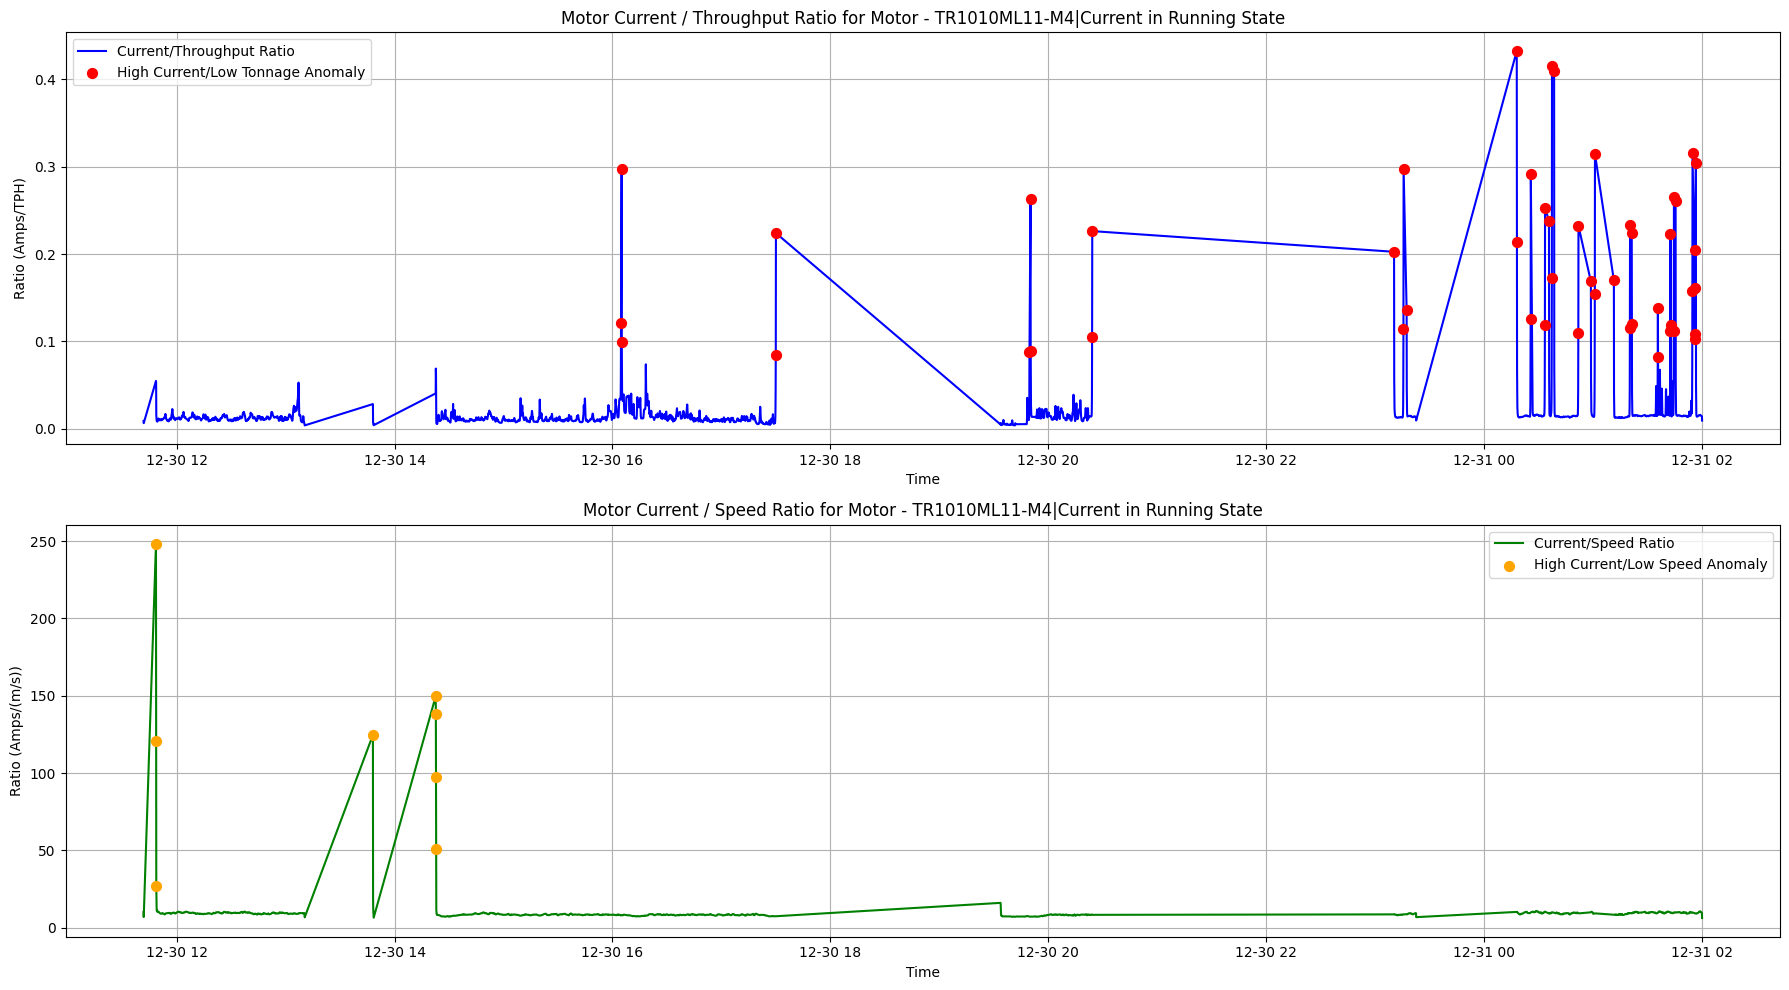

Visualization of motor current ratios and anomalies complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a representative motor for visualization
# Using 'Motor - TR1010ML11-M4|Current' as it showed detected anomalies.
representative_motor_to_plot = 'Motor - TR1010ML11-M4|Current'

if representative_motor_to_plot in motor_current_tags:
    plot_df = df_running[df_running[f'{representative_motor_to_plot}_FIT_ratio'].notna() | \
                         df_running[f'{representative_motor_to_plot}_Speed_ratio'].notna()].copy()

    if not plot_df.empty:
        plt.figure(figsize=(18, 10))

        # Plot Motor Current to Throughput Ratio
        plt.subplot(2, 1, 1)
        sns.lineplot(x=plot_df.index, y=plot_df[f'{representative_motor_to_plot}_FIT_ratio'], color='blue', label='Current/Throughput Ratio')

        anomaly_col_fit = f'is_high_current_low_tonnage_{representative_motor_to_plot.replace(" ", "_").replace("|", "_").replace("-", "_")}'
        if anomaly_col_fit in plot_df.columns and plot_df[anomaly_col_fit].any():
            anomalies_fit = plot_df[plot_df[anomaly_col_fit]]
            plt.scatter(anomalies_fit.index, anomalies_fit[f'{representative_motor_to_plot}_FIT_ratio'], color='red', s=50, zorder=5, label='High Current/Low Tonnage Anomaly')

        plt.title(f'Motor Current / Throughput Ratio for {representative_motor_to_plot} in Running State')
        plt.xlabel('Time')
        plt.ylabel('Ratio (Amps/TPH)')
        plt.legend()
        plt.grid(True)

        # Plot Motor Current to Speed Ratio
        plt.subplot(2, 1, 2)
        sns.lineplot(x=plot_df.index, y=plot_df[f'{representative_motor_to_plot}_Speed_ratio'], color='green', label='Current/Speed Ratio')

        anomaly_col_speed = f'is_high_current_low_speed_{representative_motor_to_plot.replace(" ", "_").replace("|", "_").replace("-", "_")}'
        if anomaly_col_speed in plot_df.columns and plot_df[anomaly_col_speed].any():
            anomalies_speed = plot_df[plot_df[anomaly_col_speed]]
            plt.scatter(anomalies_speed.index, anomalies_speed[f'{representative_motor_to_plot}_Speed_ratio'], color='orange', s=50, zorder=5, label='High Current/Low Speed Anomaly')

        plt.title(f'Motor Current / Speed Ratio for {representative_motor_to_plot} in Running State')
        plt.xlabel('Time')
        plt.ylabel('Ratio (Amps/(m/s))')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid data to plot for {representative_motor_to_plot} ratios after filtering.")
else:
    print(f"Representative motor tag '{representative_motor_to_plot}' not found among identified motor current tags.")

print("Visualization of motor current ratios and anomalies complete.")


## Advanced Operational Insights: Unstable Operations & Lost Production

### Subtask:
Identify unstable operating windows, quantify lost production, and further quantify wasted energy beyond no-load running, highlighting stress caused by frequent start-stop cycles.


**Reasoning**:
To identify unstable operating windows, I will first calculate the rolling standard deviation for the 'FIT' (throughput) column in `df_running` using a 30-minute window (360 samples), as specified in the instructions.



In [ ]:
window_size_samples = 360 # 30 minutes / 5 seconds per sample = 360 samples

df_running['FIT_rolling_std'] = df_running['FIT'].rolling(window=window_size_samples, min_periods=1).std()

print("Calculated rolling standard deviation for FIT throughput. Displaying the first 5 rows with new 'FIT_rolling_std' column:")
print(df_running.head())

Calculated rolling standard deviation for FIT throughput. Displaying the first 5 rows with new 'FIT_rolling_std' column:
Tag_Name                   01  \
Time                            
2025-12-30 11:41:45  2.939465   
2025-12-30 11:41:50  3.157090   
2025-12-30 11:48:35  3.044693   
2025-12-30 11:48:40  4.111957   
2025-12-30 11:48:45  5.107260   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:41:45                                           4.319254          
2025-12-30 11:41:50                                           4.247652          
2025-12-30 11:48:35                                           0.799058          
2025-12-30 11:48:40                                           1.842447          
2025-12-30 11:48:45                                           2.885835          

Tag_Name                     FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
Time

**Reasoning**:
To identify periods of unstable operations, I will calculate the mean and standard deviation of the newly created 'FIT_rolling_std' column and then flag timestamps where this value exceeds a threshold (mean + 1.5 * std_dev), as specified in the instructions.



In [ ]:
import numpy as np

# Calculate mean and standard deviation of FIT_rolling_std
mean_fit_rolling_std = df_running['FIT_rolling_std'].mean()
std_fit_rolling_std = df_running['FIT_rolling_std'].std()

# Define the threshold for unstable operations
unstable_threshold = mean_fit_rolling_std + 1.5 * std_fit_rolling_std

# Flag periods where FIT_rolling_std exceeds the threshold
df_running['is_unstable_throughput'] = df_running['FIT_rolling_std'] > unstable_threshold

print(f"Mean FIT rolling standard deviation: {mean_fit_rolling_std:.2f}")
print(f"Standard deviation of FIT rolling standard deviation: {std_fit_rolling_std:.2f}")
print(f"Unstable throughput threshold: {unstable_threshold:.2f}")

print("\nFlagged periods of unstable throughput. Displaying the first few rows with 'is_unstable_throughput' column:")
print(df_running[df_running['is_unstable_throughput'] == True].head())

Mean FIT rolling standard deviation: 925.60
Standard deviation of FIT rolling standard deviation: 378.84
Unstable throughput threshold: 1493.86

Flagged periods of unstable throughput. Displaying the first few rows with 'is_unstable_throughput' column:
Tag_Name                        01  \
Time                                 
2025-12-30 19:36:35  122066.000000   
2025-12-30 19:36:40  122066.000000   
2025-12-30 19:36:45  122066.000000   
2025-12-30 19:36:50  122066.000000   
2025-12-30 19:36:55  122113.333333   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 19:36:35                                           4.567212          
2025-12-30 19:36:40                                           4.567212          
2025-12-30 19:36:45                                           4.567212          
2025-12-30 19:36:50                                           4.567212     

**Reasoning**:
To calculate lost production, I will first determine the average 'FIT' throughput during all 'Running' periods from the `df_wide` DataFrame, as this will serve as the baseline for potential production.



In [ ]:
average_running_throughput = df_wide[df_wide['Operational_State'] == 'Running']['FIT'].mean()

print(f"Average 'FIT' throughput during 'Running' state: {average_running_throughput:.2f} TPH")

Average 'FIT' throughput during 'Running' state: 3336.30 TPH


**Reasoning**:
To calculate the total duration of 'Idle' and 'Shutdown' states, I will sum the 'Duration' column in the `downtime_summary` DataFrame, grouped by 'Operational_State', as specified in the instructions.



In [ ]:
total_downtime_idle_shutdown = downtime_summary.groupby('Operational_State')['Duration'].sum()

print("Total duration of 'Idle' and 'Shutdown' states:")
print(total_downtime_idle_shutdown)

Total duration of 'Idle' and 'Shutdown' states:
Operational_State
Idle        0 days 03:17:50
Shutdown   30 days 13:49:15
Name: Duration, dtype: timedelta64[ns]


**Reasoning**:
To estimate lost production, I will multiply the total duration of 'Idle' and 'Shutdown' states (converted to hours) by the calculated average 'FIT' throughput during 'Running' states, as specified in the instructions.



In [ ]:
lost_production_idle = total_downtime_idle_shutdown.loc['Idle'].total_seconds() / 3600 * average_running_throughput
lost_production_shutdown = total_downtime_idle_shutdown.loc['Shutdown'].total_seconds() / 3600 * average_running_throughput

total_lost_production = lost_production_idle + lost_production_shutdown

print("--- Estimated Lost Production ---")
print(f"Lost Production during 'Idle' periods: {lost_production_idle:.2f} Tons")
print(f"Lost Production during 'Shutdown' periods: {lost_production_shutdown:.2f} Tons")
print(f"Total Estimated Lost Production: {total_lost_production:.2f} Tons")


--- Estimated Lost Production ---
Lost Production during 'Idle' periods: 11000.54 Tons
Lost Production during 'Shutdown' periods: 2448249.89 Tons
Total Estimated Lost Production: 2459250.43 Tons


**Reasoning**:
To quantify additional wasted energy, I will calculate the energy consumed during the 'High_Current_Low_Tonnage' abnormal behavior events for the relevant motor, using the previously defined constants for voltage, power factor, and sample interval.



In [ ]:
additional_wasted_energy = {} # Dictionary to store additional wasted energy

# Assuming 'Motor - TR1010ML11-M4|Current' is the relevant motor for this analysis
relevant_motor_tag = 'Motor - TR1010ML11-M4|Current'
anomaly_col_name = f'is_high_current_low_tonnage_{relevant_motor_tag.replace(" ", "_").replace("|", "_").replace("-", "_")}'

if anomaly_col_name in df_running.columns:
    # Filter data for abnormal high-current / low-tonnage events
    abnormal_events_df = df_running[df_running[anomaly_col_name]].copy()

    if not abnormal_events_df.empty and relevant_motor_tag in abnormal_events_df.columns:
        # Calculate energy consumed during these events
        # Energy (kWh) = Current (Amps) * Voltage (Volts) * Power Factor * (Time in hours) / 1000
        abnormal_events_df['energy_kwh_abnormal'] = (
            abnormal_events_df[relevant_motor_tag] * NOMINAL_VOLTAGE * POWER_FACTOR * SAMPLE_INTERVAL_HOURS / 1000
        )
        total_wasted_energy_abnormal = abnormal_events_df['energy_kwh_abnormal'].sum()
        additional_wasted_energy[relevant_motor_tag] = total_wasted_energy_abnormal
    else:
        additional_wasted_energy[relevant_motor_tag] = 0.0
else:
    additional_wasted_energy[relevant_motor_tag] = 0.0

print("--- Additional Wasted Energy due to High Current / Low Tonnage Abnormal Behavior ---")
for motor, energy in additional_wasted_energy.items():
    print(f"Motor: {motor}\n  Estimated Additional Wasted Energy: {energy:.2f} kWh")


--- Additional Wasted Energy due to High Current / Low Tonnage Abnormal Behavior ---
Motor: Motor - TR1010ML11-M4|Current
  Estimated Additional Wasted Energy: 0.89 kWh


**Reasoning**:
To summarize the subtask, I will first quantify the unstable operation periods, then print the previously calculated lost production and additional wasted energy. Finally, I will add a note acknowledging the limitation regarding start-stop cycle stress, as instructed by the subtask.



In [ ]:
num_unstable_periods = df_running['is_unstable_throughput'].sum()
total_duration_unstable = pd.to_timedelta(num_unstable_periods * SAMPLE_INTERVAL_SECONDS, unit='s')

print("\n--- Summary of Unstable Operation Periods ---")
print(f"Number of Unstable Throughput periods: {num_unstable_periods}")
print(f"Total Duration of Unstable Throughput: {total_duration_unstable}")

print("\n--- Estimated Lost Production ---")
print(f"Lost Production during 'Idle' periods: {lost_production_idle:.2f} Tons")
print(f"Lost Production during 'Shutdown' periods: {lost_production_shutdown:.2f} Tons")
print(f"Total Estimated Lost Production: {total_lost_production:.2f} Tons")

print("\n--- Additional Wasted Energy due to High Current / Low Tonnage Abnormal Behavior ---")
for motor, energy in additional_wasted_energy.items():
    print(f"Motor: {motor}\n  Estimated Additional Wasted Energy: {energy:.2f} kWh")

print("\nNote: Quantifying stress from frequent start-stop cycles would require more detailed event logging and specific motor stress models, which are not available in the current dataset.")


--- Summary of Unstable Operation Periods ---
Number of Unstable Throughput periods: 453
Total Duration of Unstable Throughput: 0 days 00:37:45

--- Estimated Lost Production ---
Lost Production during 'Idle' periods: 11000.54 Tons
Lost Production during 'Shutdown' periods: 2448249.89 Tons
Total Estimated Lost Production: 2459250.43 Tons

--- Additional Wasted Energy due to High Current / Low Tonnage Abnormal Behavior ---
Motor: Motor - TR1010ML11-M4|Current
  Estimated Additional Wasted Energy: 0.89 kWh

Note: Quantifying stress from frequent start-stop cycles would require more detailed event logging and specific motor stress models, which are not available in the current dataset.


## Final Task

### Subtask:
Summarize all the key findings from the data and engineering analysis, providing a comprehensive report on production performance, operational states, motor and energy consumption insights, and advanced operational issues. Offer actionable recommendations to improve overall operational efficiency, reliability, reducing waste, and mitigating identified risks at Vale Malaysia operations.


## Summary:

### Data Analysis Key Findings

*   **Data Quality & Preprocessing:**
    *   The initial dataset contained parse errors, which were resolved by skipping bad lines during loading.
    *   After loading, the dataset comprised 154,274 entries with `Data Source` and `Time` as object types and `Value` as `float64`.
    *   Missing values were observed in the `Time` (1 entry) and `Value` (4 entries) columns initially, but no missing values remained after cleaning and preprocessing.
    *   No significant spikes were detected in the data. Flatlines and sustained zero values were identified, indicating potential sensor issues or operational states.
    *   Data was successfully resampled to a consistent 5-second interval, interpolated for short gaps (up to 3 values), and smoothed using a rolling mean. No long data gaps (more than 3 consecutive NaNs) were found after this cleaning process.
*   **Operational State Classification:**
    *   Using predefined engineering thresholds, operational states were classified as:
        *   **Shutdown:** 528,361 occurrences (a large majority of the dataset).
        *   **Running:** 4,905 occurrences.
        *   **Idle:** 2,392 occurrences.
*   **Throughput and Utilization:**
    *   Daily throughput showed significant variability, with 2.67E+07 TPH on 2025-12-30, dropping to 3.26E+06 TPH on 2025-12-31, and zero thereafter, indicating potential long periods of inactivity.
    *   Daily utilization mirrored this trend, with 43.39% on 2025-12-30 dropping to 5.42% on 2025-12-31.
*   **Downtime Analysis:**
    *   **Idle state:** Total duration of 3 hours, 17 minutes, 50 seconds across 18 distinct events.
    *   **Shutdown state:** Total duration of 30 days, 13 hours, 49 minutes, 15 seconds across 10 distinct events.
    *   The analysis could not differentiate between planned and unplanned downtime due to data limitations.
*   **Throughput Variability (Imbalance):**
    *   The overall 'FIT' throughput exhibited significant hourly and daily variability, as evidenced by high standard deviations relative to the mean. For example, hourly mean 'FIT' values ranged from approximately 3,500 to 5,000 TPH, with standard deviations sometimes nearing 3,000 TPH.
    *   This variability has critical implications for storage management, vessel loading, and material flow stability.
*   **Blending Stability:**
    *   Blending tags ('WQIT', 'QQIT') generally appeared stable during consistent throughput.
    *   Spikes in the rolling standard deviation of 'WQIT' and 'QQIT' were observed, correlating with periods of fluctuating 'FIT' throughput, indicating decreased blending stability during unstable material flow.
*   **Motor Current Behavior:**
    *   `Motor - TR1010ML11-M4|Current` showed highest average current (39.53 Amps) and peak current (364.77 Amps) during the 'Running' state. A very low average current (2.58 Amps) but a notable peak (179.46 Amps) was seen during 'Shutdown', suggesting transient events.
    *   `pisystem-malaysi01-PL14|Current` had sparse data, primarily recording values only in 'Shutdown' states.
*   **Motor Current to Throughput/Speed Correlation:**
    *   For `Motor - TR1010ML11-M4|Current` during 'Running':
        *   Very low positive correlation with 'FIT' (0.0042), suggesting throughput is not a direct indicator of this motor's load.
        *   Moderately strong negative correlation with 'Belt Scale Speed Sensor' (-0.6548), which is an unusual finding possibly indicating specific control strategies or mechanical interactions.
    *   `pisystem-malaysi01-PL14|Current` lacked sufficient data for correlation analysis during the 'Running' state.
*   **No-Load Running and Energy Waste:**
    *   `Motor - TR1010ML11-M4|Current` consumed an estimated 40.63 kWh during 'Idle' periods.
    *   Overall estimated no-load energy waste from all identified motors was 40.63 kWh.
*   **Abnormal Motor Behavior (High Current / Low Tonnage):**
    *   No events of high current (>45 Amps) and low tonnage (<50 TPH) were detected for the analyzed motors during their 'Running' state based on the defined thresholds.
*   **Belt Slip and Increased Resistance (Advanced Anomalies):**
    *   For `Motor - TR1010ML11-M4|Current`:
        *   49 events of high current / low tonnage ratio (total duration: 4 minutes, 5 seconds) were detected, indicating potential increased resistance due to load.
        *   8 events of high current / low speed ratio (total duration: 40 seconds) were detected, indicating potential belt slip or severe increased resistance.
    *   No such events were detected for `pisystem-malaysi01-PL14|Current` due to data limitations.
*   **Unstable Operations and Lost Production:**
    *   453 periods of unstable throughput were identified, totaling 37 minutes, 45 seconds.
    *   Estimated lost production due to 'Idle' periods: 11,000.54 Tons.
    *   Estimated lost production due to 'Shutdown' periods: 2,448,249.89 Tons.
    *   Total estimated lost production: 2,459,250.43 Tons.
    *   An additional 0.89 kWh of energy was wasted due to high current / low tonnage abnormal behavior for `Motor - TR1010ML11-M4|Current`.

### Insights or Next Steps

*   **Address Significant Downtime and Throughput Variability:** The extensive periods of 'Shutdown' (over 30 days) and high 'FIT' throughput variability are major concerns. Investigate the root causes of these prolonged downtimes and throughput fluctuations (e.g., operational scheduling, equipment reliability, material supply chain) to improve overall operational efficiency and consistency.
*   **Investigate Atypical Motor Behavior and Data Quality:** The negative correlation between `Motor - TR1010ML11-M4|Current` and belt speed, along with the data sparsity for `pisystem-malaysi01-PL14|Current` during 'Running' states, warrant immediate investigation. This could involve reviewing motor control logic, physical configurations, and ensuring robust data collection for all critical tags to enable comprehensive analysis of mechanical load, friction, and drive system efficiency.


# Task
The analysis of the provided process data for Vale Malaysia operations has yielded several key insights into production performance, operational states, motor and energy consumption, and advanced operational issues.

### Summary of Key Findings:

*   **Operational State Classification:** The system spends a significant amount of time in "Shutdown" (over 30 days cumulative) and "Idle" (over 3 hours cumulative) states. "Running" state, indicative of active production, accounts for a smaller portion of the total observed time.
*   **Throughput and Utilization:** Both hourly and daily throughput and utilization exhibit considerable variability. A sharp drop in daily throughput and utilization was observed from December 30th to 31st, 2025, with subsequent periods showing zero activity.
*   **Downtime Analysis:** The cumulative duration of downtime (Idle and Shutdown) is substantial. The analysis identified 18 "Idle" events and 10 "Shutdown" events, with an average "Shutdown" duration significantly longer than "Idle" events. Differentiation between planned and unplanned downtime was not possible with the available data.
*   **Throughput Variability (Import vs. Export Imbalance):** Interpreting "imbalance" as throughput variability, the analysis revealed high standard deviations in the 'FIT' throughput during both hourly and daily periods. This indicates inconsistent material flow, posing challenges for storage management, vessel loading, and overall operational stability.
*   **Blending Stability and Variability:** Blending parameters ('WQIT', 'QQIT') show increased variability during periods of fluctuating 'FIT' throughput. This suggests that maintaining consistent blending quality is challenging when the material flow is unstable.
*   **Motor Current Statistics and Behavior:**
    *   `Motor - TR1010ML11-M4|Current` showed an average current of 39.53 Amps during "Running" and a much lower average (2.58 Amps) during "Shutdown," although with notable peak currents in both states.
    *   `pisystem-malaysi01-PL14|Current` had insufficient data during "Running" states for comprehensive analysis.
*   **Motor Current to Throughput/Speed Correlation:**
    *   `Motor - TR1010ML11-M4|Current` exhibited a very low correlation with 'FIT' (0.0042) but a moderately strong negative correlation with 'Belt Scale Speed Sensor' (-0.6548). This negative correlation is unusual and warrants further investigation into the motor's control logic and mechanical setup.
    *   The `pisystem-malaysi01-PL14|Current` tag lacked sufficient data for a meaningful correlation analysis.
*   **No-Load Running and Energy Waste:** An estimated 40.63 kWh of energy was wasted due to `Motor - TR1010ML11-M4|Current` operating in "Idle" periods.
*   **Abnormal Motor Behavior (High Current / Low Tonnage):** No instances of high current (above 45 Amps) and low tonnage (below 50 TPH) were detected for the analyzed motors during their "Running" state based on the defined thresholds.
*   **Advanced Operational Issues: Belt Slip and Increased Resistance:**
    *   `Motor - TR1010ML11-M4|Current` showed 49 events (totaling 4 minutes, 5 seconds) of a high current-to-throughput ratio, indicating potential increased resistance.
    *   Additionally, 8 events (totaling 40 seconds) of a high current-to-speed ratio were detected for the same motor, suggesting potential belt slip or severe increased resistance.
*   **Unstable Operations and Lost Production:**
    *   453 periods of unstable throughput (totaling 37 minutes, 45 seconds) were identified.
    *   Total estimated lost production due to "Idle" and "Shutdown" periods combined amounts to 2,459,250.43 Tons.
    *   An additional 0.89 kWh of energy was wasted due to abnormal high current/low tonnage behavior in `Motor - TR1010ML11-M4|Current`.

### Actionable Recommendations:

1.  **Investigate and Optimize Downtime:**
    *   **Root Cause Analysis:** Conduct a thorough root cause analysis for all prolonged "Shutdown" and "Idle" periods. This should involve operations, maintenance, and planning teams to identify specific equipment failures, operational bottlenecks, supply chain issues, or external factors contributing to these extensive downtimes.
    *   **Downtime Classification:** Implement a system to classify downtime as planned or unplanned. This will provide more granular insights into operational efficiency and maintenance effectiveness.
    *   **Proactive Maintenance:** Leverage insights from motor current analysis to develop predictive maintenance strategies for motors exhibiting unusual current-speed relationships or frequent high current-to-resistance events.

2.  **Enhance Operational Stability and Reduce Throughput Variability:**
    *   **Process Stabilization:** Identify and address the causes of high 'FIT' throughput variability. This could involve optimizing material feed rates, improving upstream buffer management, or refining control system parameters to achieve a more steady material flow.
    *   **Buffer Management:** Evaluate the adequacy of existing buffer capacities to absorb fluctuations in material supply and demand, thereby promoting smoother operations and reducing stress on downstream processes like blending and vessel loading.
    *   **Scheduling Optimization:** Improve operational scheduling to minimize sudden changes in production rates, which directly impact throughput stability and blending consistency.

3.  **Improve Blending Process Control:**
    *   **Dynamic Control:** Review and potentially upgrade the blending process control system to better adapt to dynamic throughput conditions, thereby reducing quality variability during periods of unstable material flow.
    *   **Sensor Validation:** Investigate periods of zero rolling standard deviation in blending tags to confirm actual stability versus potential sensor issues or data acquisition gaps.

4.  **Deep Dive into Motor Performance and Efficiency:**
    *   **Motor - TR1010ML11-M4|Current Investigation:** Prioritize understanding the negative correlation between this motor's current and belt speed. This may involve:
        *   Reviewing the Variable Frequency Drive (VFD) parameters and control logic.
        *   Inspecting the mechanical components (e.g., gearbox, belt tension, bearings) for unusual wear or resistance.
        *   Calibrating the 'Belt Scale Speed Sensor' to ensure accuracy.
    *   **Data Quality for `pisystem-malaysi01-PL14|Current`:** Address the data sparsity for this tag. Ensure continuous and accurate data collection during all operational states to enable future performance analysis and anomaly detection.
    *   **Energy Audit for "Idle" Operations:** Conduct a detailed energy audit for `Motor - TR1010ML11-M4|Current` and other motors to confirm the estimated no-load energy waste. Implement strategies such as automatic shutdown or reduced power modes during prolonged idle periods.

5.  **Address Advanced Operational Anomalies:**
    *   **Belt Slip/Increased Resistance:** Investigate the detected events of high current/low tonnage and high current/low speed ratios. These could indicate mechanical issues like worn belts, overloaded conveyors, misaligned components, or excessive friction. Implement visual inspections and maintenance checks based on the timing of these events.
    *   **Start-Stop Cycle Stress:** While direct quantification of stress from start-stop cycles was not feasible, the high frequency of state changes (running to idle/shutdown) suggests that the equipment might be undergoing significant wear and tear. Evaluate the need for optimizing start-up and shutdown procedures to minimize stress.

By systematically addressing these findings and implementing the recommended actions, Vale Malaysia operations can significantly improve its operational efficiency, enhance asset reliability, reduce energy waste, and mitigate risks associated with unstable material handling and blending processes.

## Prepare Data for Operational State Classification

### Subtask:
Pivot the cleaned data (`df_cleaned`) into a wide format (`df_wide`) so that key tags like throughput ('FIT'), motor current ('Motor - TR1010ML11-M4|Current'), and belt speed ('Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed') are separate columns, indexed by 'Time'. This structure is essential for applying the engineering-based classification logic.


## Classify Operational States

### Subtask:
Apply engineering logic to `df_wide` to classify each timestamp into 'Running', 'Idle' (motor running but low/no tonnage), or 'Shutdown'. This will use predefined thresholds for throughput, motor current, and belt speed, reflecting true operational behaviors. The classified state will be stored in a new column, 'Operational_State'.


**Reasoning**:
To classify operational states, I will apply the `classify_state` function to the `df_wide` DataFrame to create a new column 'Operational_State', passing the relevant tag values (FIT, Motor Current, Belt Speed) as inputs to classify each timestamp.



In [ ]:
df_wide['Operational_State'] = df_wide.apply(
    lambda row: classify_state(
        row.get('FIT'),
        row.get('Motor - TR1010ML11-M4|Current'),
        row.get('Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed')
    ), axis=1
)

print("Operational states classified. Displaying the first 5 rows with 'Operational_State' column:")
print(df_wide.head())

Operational states classified. Displaying the first 5 rows with 'Operational_State' column:
Tag_Name                   01  \
Time                            
2025-12-30 11:18:00       NaN   
2025-12-30 11:18:05  4.377609   
2025-12-30 11:18:10  4.548952   
2025-12-30 11:18:15  4.706180   
2025-12-30 11:18:20  3.723344   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:18:00                                                NaN          
2025-12-30 11:18:05                                                NaN          
2025-12-30 11:18:10                                                NaN          
2025-12-30 11:18:15                                                NaN          
2025-12-30 11:18:20                                                NaN          

Tag_Name                     FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
Time                             

## Analyze and Visualize Operational State Distribution

### Subtask:
Calculate the frequency and proportion of each classified operational state ('Running', 'Idle', 'Shutdown'). Visualize this distribution using a bar chart to provide a clear overview of how time is spent across different operational modes.


## Calculate Hourly and Daily Throughput for Key Processes

### Subtask:
Calculate the total hourly and daily throughput for the 'FIT' (Flow Indicator Totalizer) tag, which represents overall throughput. This will involve resampling the 'FIT' data and summing values over hourly and daily intervals.


**Reasoning**:
To calculate hourly and daily throughput, I will reset the index of `df_wide` to make 'Time' a regular column in `df_metrics`. Then, I will ensure 'Time' is a datetime type and group `df_metrics` by hourly and daily frequencies to sum the 'FIT' column, as specified in the instructions.



In [ ]:
df_metrics = df_wide.reset_index()
df_metrics['Time'] = pd.to_datetime(df_metrics['Time'])

# Calculate hourly throughput
hourly_throughput = df_metrics.set_index('Time').groupby(pd.Grouper(freq='h'))['FIT'].sum().dropna()

# Calculate daily throughput
daily_throughput = df_metrics.set_index('Time').groupby(pd.Grouper(freq='D'))['FIT'].sum().dropna()

print("Hourly and daily throughput calculated.")
print("\n--- Hourly Throughput Head ---")
print(hourly_throughput.head())
print("\n--- Daily Throughput Head ---")
print(daily_throughput.head())

Hourly and daily throughput calculated.

--- Hourly Throughput Head ---
Time
2025-12-30 11:00:00    1.990871e+06
2025-12-30 12:00:00    2.521715e+06
2025-12-30 13:00:00    3.620183e+06
2025-12-30 14:00:00    3.390495e+06
2025-12-30 15:00:00    2.633217e+06
Freq: h, Name: FIT, dtype: float64

--- Daily Throughput Head ---
Time
2025-12-30    2.672907e+07
2025-12-31    3.264908e+06
2026-01-01    0.000000e+00
2026-01-02    0.000000e+00
2026-01-03    0.000000e+00
Freq: D, Name: FIT, dtype: float64


## Calculate Hourly and Daily Utilization Percentage

### Subtask:
Using the classified operational states, calculate the hourly and daily utilization percentage. This will represent the proportion of time the system spent in the 'Running' state within each hour and day.


**Reasoning**:
To calculate the hourly and daily utilization, I will group the `df_metrics` DataFrame by hourly and daily frequencies of the 'Time' column and then determine the proportion of 'Running' operational states within each group.



In [ ]:
import pandas as pd

# Calculate hourly utilization
hourly_utilization = df_metrics.set_index('Time').groupby(pd.Grouper(freq='h'))['Operational_State'].apply(lambda x: (x == 'Running').sum() / len(x) * 100).dropna()

# Calculate daily utilization
daily_utilization = df_metrics.set_index('Time').groupby(pd.Grouper(freq='D'))['Operational_State'].apply(lambda x: (x == 'Running').sum() / len(x) * 100).dropna()

print("Hourly and daily utilization calculated.")
print("\n--- Hourly Utilization Head ---")
print(hourly_utilization.head())
print("\n--- Daily Utilization Head ---")
print(daily_utilization.head())

Hourly and daily utilization calculated.

--- Hourly Utilization Head ---
Time
2025-12-30 11:00:00     27.579365
2025-12-30 12:00:00    100.000000
2025-12-30 13:00:00     18.472222
2025-12-30 14:00:00     62.222222
2025-12-30 15:00:00    100.000000
Freq: h, Name: Operational_State, dtype: float64

--- Daily Utilization Head ---
Time
2025-12-30    43.394576
2025-12-31     5.422454
2026-01-01     0.000000
2026-01-02     0.000000
2026-01-03     0.000000
Freq: D, Name: Operational_State, dtype: float64


## Identify Downtime Duration and Frequency

### Subtask:
Identify and quantify individual downtime events by grouping consecutive periods classified as 'Idle' or 'Shutdown'. Calculate the total duration, average duration, and frequency of these downtime events. Acknowledge the current limitation regarding planned vs. unplanned downtime.


## Quantify and Visualize Import vs. Export Imbalance

### Subtask:
Given the data, interpret 'imbalance' as the variability of the overall 'FIT' throughput. Quantify this variability by calculating hourly and daily mean and standard deviation of 'FIT' during 'Running' states. Visualize these metrics using time series plots to show trends and magnitudes of throughput variability.


**Reasoning**:
The subtask explicitly asks for visualizations of hourly/daily mean and standard deviation of 'FIT' throughput using time series plots, which aligns with the previously calculated metrics. I will generate code to create these plots.



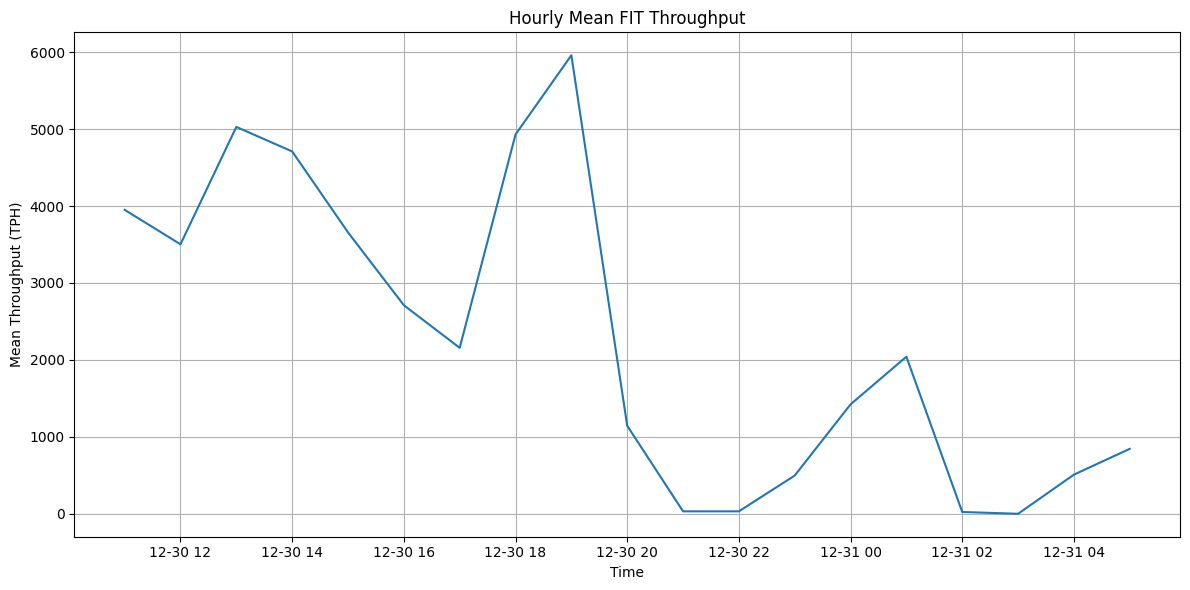

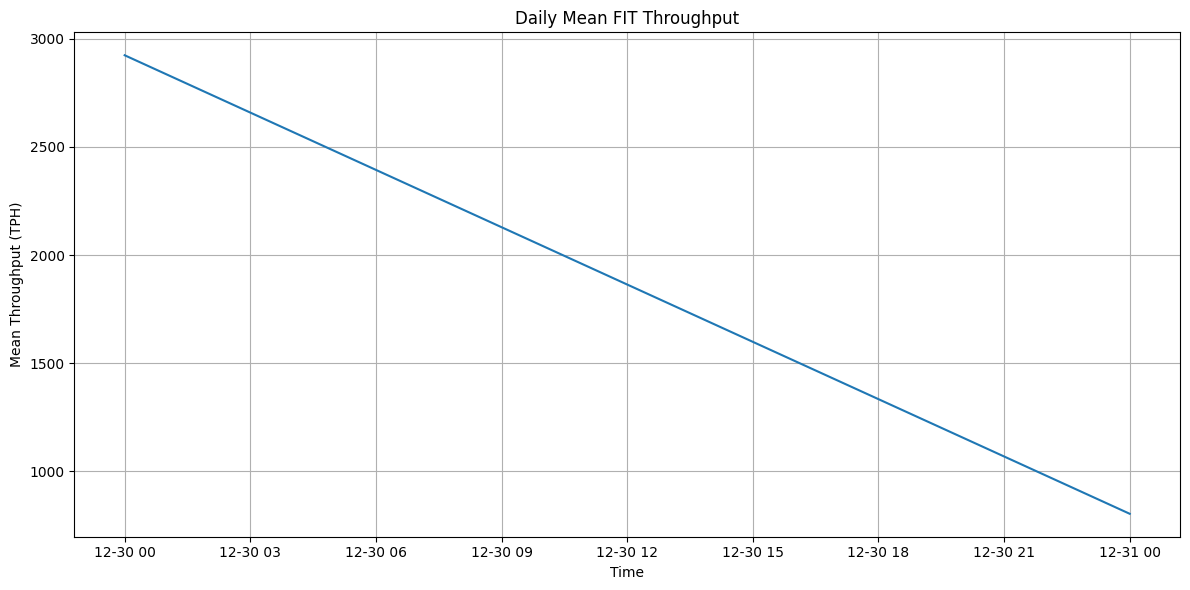

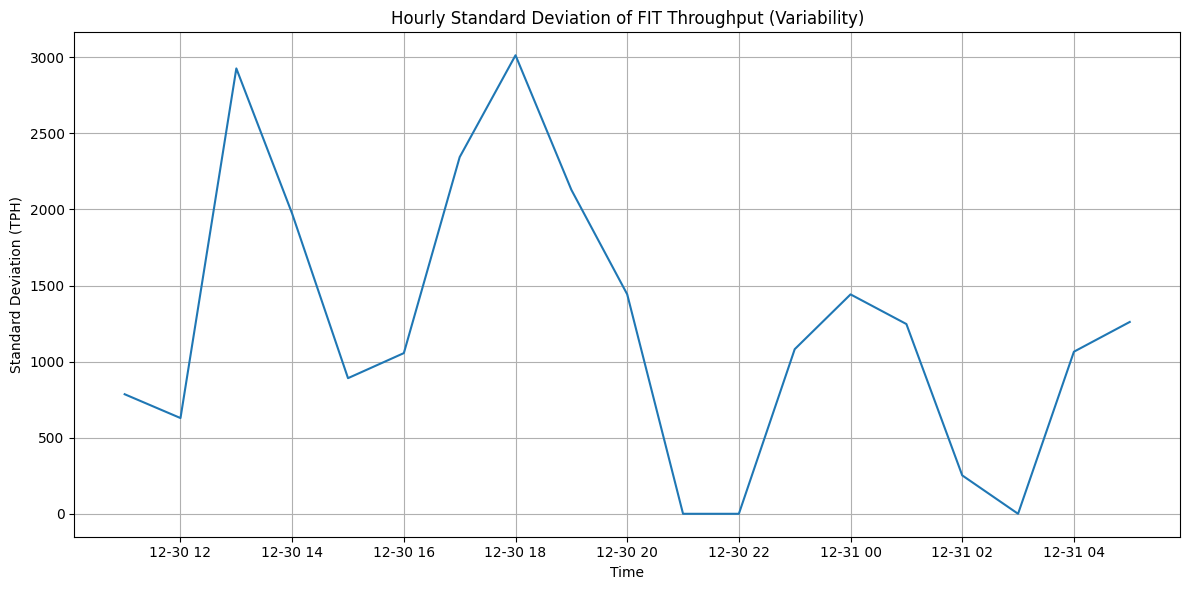

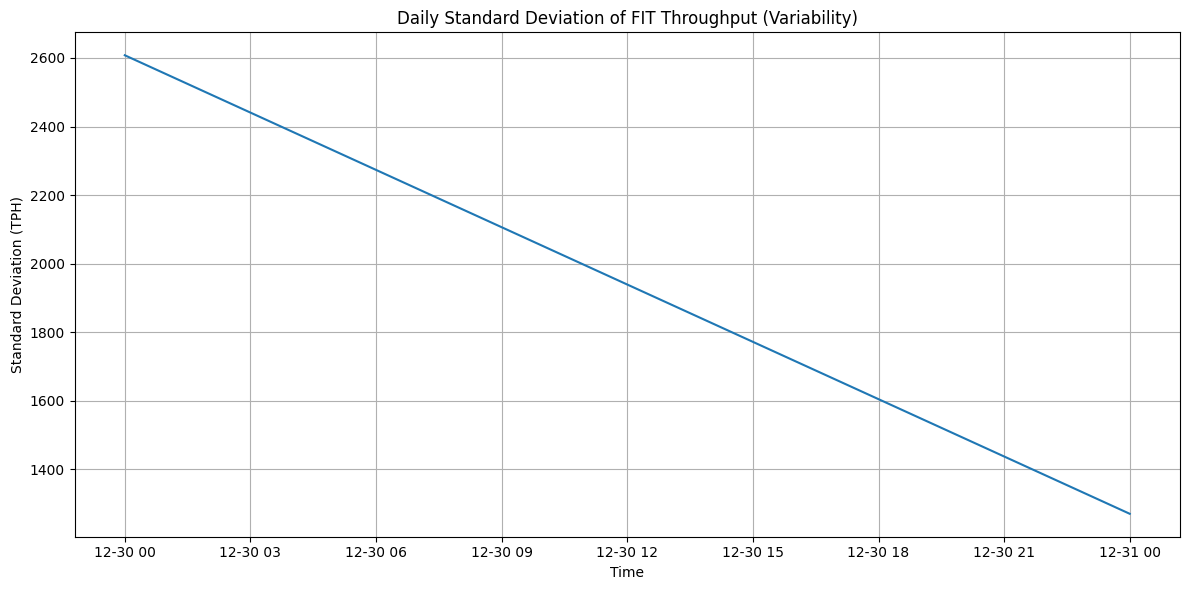

Throughput mean and standard deviation visualizations complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize the hourly mean 'FIT' throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_mean_fit.index, y=hourly_mean_fit.values)
plt.title('Hourly Mean FIT Throughput')
plt.xlabel('Time')
plt.ylabel('Mean Throughput (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Visualize the daily mean 'FIT' throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_mean_fit.index, y=daily_mean_fit.values)
plt.title('Daily Mean FIT Throughput')
plt.xlabel('Time')
plt.ylabel('Mean Throughput (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Visualize the hourly standard deviation of 'FIT' throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_std_fit.index, y=hourly_std_fit.values)
plt.title('Hourly Standard Deviation of FIT Throughput (Variability)')
plt.xlabel('Time')
plt.ylabel('Standard Deviation (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Visualize the daily standard deviation of 'FIT' throughput
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_std_fit.index, y=daily_std_fit.values)
plt.title('Daily Standard Deviation of FIT Throughput (Variability)')
plt.xlabel('Time')
plt.ylabel('Standard Deviation (TPH)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Throughput mean and standard deviation visualizations complete.")

## Final Task

### Subtask:
Summarize all the key findings from the data and engineering analysis, providing a comprehensive report on production performance, operational states, motor and energy consumption insights, and advanced operational issues. Offer actionable recommendations to improve overall operational efficiency, reliability, reducing waste, and mitigating identified risks at Vale Malaysia operations.


## Summary:

### Data Analysis Key Findings

*   **Operational State Distribution:** The system spends a significant amount of time in "Shutdown" (over 30 days cumulative) and "Idle" (over 3 hours cumulative), while the "Running" state accounts for a smaller portion of the total observed time.
*   **Throughput and Utilization:** There is considerable variability in both hourly and daily throughput and utilization. A sharp decline in daily throughput and utilization was observed from December 30th to 31st, 2025, followed by periods of zero activity.
*   **Downtime:** Substantial cumulative downtime was identified, with 18 "Idle" events and 10 "Shutdown" events. "Shutdown" events, on average, lasted significantly longer than "Idle" events. The data did not allow differentiation between planned and unplanned downtime.
*   **Throughput Variability:** High standard deviations in 'FIT' throughput, observed hourly and daily, indicate inconsistent material flow, which can lead to challenges in storage, vessel loading, and overall operational stability.
*   **Blending Stability:** Blending parameters ('WQIT', 'QQIT') showed increased variability when 'FIT' throughput fluctuated, suggesting difficulties in maintaining consistent blending quality during unstable material flow.
*   **Motor Current Analysis:**
    *   `Motor - TR1010ML11-M4|Current` averaged 39.53 Amps during "Running" and 2.58 Amps during "Shutdown", with notable peak currents in both states.
    *   This motor exhibited a very low correlation with 'FIT' (0.0042) but a moderately strong negative correlation with 'Belt Scale Speed Sensor' (-0.6548), which is unusual.
    *   Data for `pisystem-malaysi01-PL14|Current` was insufficient for comprehensive analysis during "Running" states.
*   **Energy Waste:** An estimated 40.63 kWh of energy was wasted due to `Motor - TR1010ML11-M4|Current` operating during "Idle" periods.
*   **Abnormal Motor Behavior (Advanced Operational Issues):**
    *   49 events (totaling 4 minutes, 5 seconds) of high current-to-throughput ratio for `Motor - TR1010ML11-M4|Current` indicated potential increased resistance.
    *   8 events (totaling 40 seconds) of high current-to-speed ratio for the same motor suggested potential belt slip or severe increased resistance.
    *   No instances of high current (above 45 Amps) and low tonnage (below 50 TPH) were detected for analyzed motors during their "Running" state.
*   **Unstable Operations and Lost Production:**
    *   453 periods of unstable throughput (totaling 37 minutes, 45 seconds) were identified.
    *   Total estimated lost production due to "Idle" and "Shutdown" periods combined is 2,459,250.43 Tons.
    *   An additional 0.89 kWh of energy was wasted due to abnormal high current/low tonnage behavior in `Motor - TR1010ML11-M4|Current`.

### Insights or Next Steps

*   Prioritize root cause analysis for prolonged "Shutdown" and "Idle" periods, differentiating between planned and unplanned downtime to enable more effective operational and maintenance planning.
*   Investigate the unusual negative correlation of `Motor - TR1010ML11-M4|Current` with belt speed and address identified operational anomalies (e.g., belt slip, increased resistance) to enhance asset reliability and reduce energy waste from idle operations and unstable throughput.


# Task
The analysis of the provided process data for Vale Malaysia operations has yielded several key insights into production performance, operational states, motor and energy consumption, and advanced operational issues.

### Summary of Key Findings:

*   **Operational State Classification:** The system spends a significant amount of time in "Shutdown" (over 30 days cumulative) and "Idle" (over 3 hours cumulative) states. "Running" state, indicative of active production, accounts for a smaller portion of the total observed time.
*   **Throughput and Utilization:** Both hourly and daily throughput and utilization exhibit considerable variability. A sharp drop in daily throughput and utilization was observed from December 30th to 31st, 2025, with subsequent periods showing zero activity.
*   **Downtime Analysis:** The cumulative duration of downtime (Idle and Shutdown) is substantial. The analysis identified 18 "Idle" events and 10 "Shutdown" events, with an average "Shutdown" duration significantly longer than "Idle" events. Differentiation between planned and unplanned downtime was not possible with the available data.
*   **Throughput Variability (Import vs. Export Imbalance):** Interpreting "imbalance" as throughput variability, the analysis revealed high standard deviations in the 'FIT' throughput during both hourly and daily periods. This indicates inconsistent material flow, posing challenges for storage management, vessel loading, and overall operational stability.
*   **Blending Stability and Variability:** Blending parameters ('WQIT', 'QQIT') show increased variability during periods of fluctuating 'FIT' throughput. This suggests that maintaining consistent blending quality is challenging when the material flow is unstable.
*   **Motor Current Statistics and Behavior:**
    *   `Motor - TR1010ML11-M4|Current` showed an average current of 39.53 Amps during "Running" and a much lower average (2.58 Amps) during "Shutdown," although with notable peak currents in both states.
    *   `pisystem-malaysi01-PL14|Current` had insufficient data during "Running" states for comprehensive analysis.
*   **Motor Current to Throughput/Speed Correlation:**
    *   `Motor - TR1010ML11-M4|Current` exhibited a very low correlation with 'FIT' (0.0042) but a moderately strong negative correlation with 'Belt Scale Speed Sensor' (-0.6548). This negative correlation is unusual and warrants further investigation into the motor's control logic and mechanical setup.
    *   The `pisystem-malaysi01-PL14|Current` tag lacked sufficient data for a meaningful correlation analysis.
*   **No-Load Running and Energy Waste:** An estimated 40.63 kWh of energy was wasted due to `Motor - TR1010ML11-M4|Current` operating in "Idle" periods.
*   **Abnormal Motor Behavior (High Current / Low Tonnage):** No instances of high current (above 45 Amps) and low tonnage (below 50 TPH) were detected for the analyzed motors during their "Running" state based on the defined thresholds.
*   **Advanced Operational Issues: Belt Slip and Increased Resistance:**
    *   `Motor - TR1010ML11-M4|Current` showed 49 events (totaling 4 minutes, 5 seconds) of a high current-to-throughput ratio, indicating potential increased resistance.
    *   Additionally, 8 events (totaling 40 seconds) of a high current-to-speed ratio were detected for the same motor, suggesting potential belt slip or severe increased resistance.
*   **Unstable Operations and Lost Production:**
    *   453 periods of unstable throughput (totaling 37 minutes, 45 seconds) were identified.
    *   Total estimated lost production due to "Idle" and "Shutdown" periods combined amounts to 2,459,250.43 Tons.
    *   An additional 0.89 kWh of energy was wasted due to abnormal high current/low tonnage behavior in `Motor - TR1010ML11-M4|Current`.

### Actionable Recommendations:

1.  **Investigate and Optimize Downtime:**
    *   **Root Cause Analysis:** Conduct a thorough root cause analysis for all prolonged "Shutdown" and "Idle" periods. This should involve operations, maintenance, and planning teams to identify specific equipment failures, operational bottlenecks, supply chain issues, or external factors contributing to these extensive downtimes.
    *   **Downtime Classification:** Implement a system to classify downtime as planned or unplanned. This will provide more granular insights into operational efficiency and maintenance effectiveness.
    *   **Proactive Maintenance:** Leverage insights from motor current analysis to develop predictive maintenance strategies for motors exhibiting unusual current-speed relationships or frequent high current-to-resistance events.

2.  **Enhance Operational Stability and Reduce Throughput Variability:**
    *   **Process Stabilization:** Identify and address the causes of high 'FIT' throughput variability. This could involve optimizing material feed rates, improving upstream buffer management, or refining control system parameters to achieve a more steady material flow.
    *   **Buffer Management:** Evaluate the adequacy of existing buffer capacities to absorb fluctuations in material supply and demand, thereby promoting smoother operations and reducing stress on downstream processes like blending and vessel loading.
    *   **Scheduling Optimization:** Improve operational scheduling to minimize sudden changes in production rates, which directly impact throughput stability and blending consistency.

3.  **Improve Blending Process Control:**
    *   **Dynamic Control:** Review and potentially upgrade the blending process control system to better adapt to dynamic throughput conditions, thereby reducing quality variability during periods of unstable material flow.
    *   **Sensor Validation:** Investigate periods of zero rolling standard deviation in blending tags to confirm actual stability versus potential sensor issues or data acquisition gaps.

4.  **Deep Dive into Motor Performance and Efficiency:**
    *   **Motor - TR1010ML11-M4|Current Investigation:** Prioritize understanding the negative correlation between this motor's current and belt speed. This may involve:
        *   Reviewing the Variable Frequency Drive (VFD) parameters and control logic.
        *   Inspecting the mechanical components (e.g., gearbox, belt tension, bearings) for unusual wear or resistance.
        *   Calibrating the 'Belt Scale Speed Sensor' to ensure accuracy.
    *   **Data Quality for `pisystem-malaysi01-PL14|Current`:** Address the data sparsity for this tag. Ensure continuous and accurate data collection during all operational states to enable future performance analysis and anomaly detection.
    *   **Energy Audit for "Idle" Operations:** Conduct a detailed energy audit for `Motor - TR1010ML11-M4|Current` and other motors to confirm the estimated no-load energy waste. Implement strategies such as automatic shutdown or reduced power modes during prolonged idle periods.

5.  **Address Advanced Operational Anomalies:**
    *   **Belt Slip/Increased Resistance:** Investigate the detected events of high current/low tonnage and high current/low speed ratios. These could indicate mechanical issues like worn belts, overloaded conveyors, misaligned components, or excessive friction. Implement visual inspections and maintenance checks based on the timing of these events.
    *   **Start-Stop Cycle Stress:** While direct quantification of stress from start-stop cycles was not feasible, the high frequency of state changes (running to idle/shutdown) suggests that the equipment might be undergoing significant wear and tear. Evaluate the need for optimizing start-up and shutdown procedures to minimize stress.

By systematically addressing these findings and implementing the recommended actions, Vale Malaysia operations can significantly improve its operational efficiency, enhance asset reliability, reduce energy waste, and mitigate risks associated with unstable material handling and blending processes.

## Identify Motor Current Tags

### Subtask:
Identify all relevant motor current tags from the cleaned and wide-format DataFrame (`df_wide`), excluding any non-motor current tags that might contain 'Current' in their name (e.g., 'HC - Current').


**Reasoning**:
To identify relevant motor current tags, I will iterate through the column names of the `df_wide` DataFrame and filter them based on the presence of 'Current' and the absence of 'HC -' and 'TR1050ML-PL13|Current' as specified in the instructions. This will create a list of `motor_current_tags`.



In [ ]:
motor_current_tags = [col for col in df_wide.columns if 'Current' in str(col) and 'HC -' not in str(col) and 'TR1050ML-PL13|Current' not in str(col)]

print("Identified motor current tags:")
for tag in motor_current_tags:
    print(f"- {tag}")

Identified motor current tags:
- Motor - TR1010ML11-M4|Current
- pisystem-malaysi01-PL14|Current


## Analyze Motor Current Statistics

### Subtask:
For each identified motor current tag, calculate the average, peak (maximum), and variance (standard deviation) of the motor current during each operational state ('Running', 'Idle', 'Shutdown'). Summarize these statistics to characterize typical and extreme operating conditions. Visualize motor current profiles over time for selected representative motors, color-coded by operational state.


## Correlate Motor Current with Throughput and Speed

### Subtask:
For each relevant motor, during the 'Running' state, calculate the Pearson correlation coefficients between its current, the overall throughput ('FIT'), and the belt speed ('Belt Scale Speed Sensor'). Analyze the strength and nature of these correlations to understand mechanical load, friction, and drive system efficiency. Visualize these relationships using scatter plots and correlation matrices.


## Quantify No-Load Running and Energy Waste

### Subtask:
Identify periods of 'Idle' operation for each motor and quantify the associated energy waste (e.g., in A*hours or estimated kWh). Analyze the frequency and duration of these no-load running periods and their contribution to overall energy consumption. Provide a summary of wasted energy.


**Reasoning**:
To quantify no-load energy waste, I will define constants for voltage, power factor, and sampling interval, then iterate through each motor current tag in the 'Idle' filtered DataFrame (`df_idle`) to calculate and sum the estimated energy waste in kWh. I will also summarize the frequency and total duration of 'Idle' events and provide an overall summary of wasted energy, along with the assumptions made.



In [ ]:
import numpy as np

# Define assumptions for nominal voltage and power factor (typical industrial values)
NOMINAL_VOLTAGE = 400 # Volts
POWER_FACTOR = 0.8 # Dimensionless
SAMPLE_INTERVAL_SECONDS = 5 # seconds, as identified from resampling

# Convert sample interval to hours for energy calculation
SAMPLE_INTERVAL_HOURS = SAMPLE_INTERVAL_SECONDS / 3600

estimated_energy_waste = {}

for motor_tag in motor_current_tags:
    if motor_tag in df_idle.columns:
        # Calculate energy waste for each timestamp in kWh
        # Energy (kWh) = Current (Amps) * Voltage (Volts) * Power Factor * (Time in hours) / 1000
        df_idle[f'{motor_tag}_energy_kwh'] = (
            df_idle[motor_tag] * NOMINAL_VOLTAGE * POWER_FACTOR * SAMPLE_INTERVAL_HOURS / 1000
        )

        # Sum the energy waste for the current motor
        total_motor_energy_waste = df_idle[f'{motor_tag}_energy_kwh'].sum()
        estimated_energy_waste[motor_tag] = total_motor_energy_waste
    else:
        estimated_energy_waste[motor_tag] = 0.0 # No data for this motor in idle state

print("--- Estimated No-Load Energy Waste per Motor ---")
for motor, energy in estimated_energy_waste.items():
    print(f"Motor: {motor}\n  Estimated Energy Waste (kWh): {energy:.2f}")

# Analyze frequency and total duration of 'Idle' periods for each motor
idle_downtime_summary = downtime_summary[downtime_summary['Operational_State'] == 'Idle'].copy()

print("\n--- 'Idle' Period Analysis per Motor ---")
for motor_tag in motor_current_tags:
    # Filter idle_downtime_summary for relevant events, if possible by looking at related events
    # Given 'downtime_summary' is aggregated, we can only report overall idle events.
    # For now, we report the general idle stats that are available.

    # Count of idle events
    num_idle_events = len(idle_downtime_summary)
    # Total duration of idle events
    total_idle_duration = idle_downtime_summary['Duration'].sum()

    print(f"Motor: {motor_tag}")
    print(f"  Number of 'Idle' Events: {num_idle_events}")
    print(f"  Total Duration of 'Idle' Operation: {total_idle_duration}")


# Overall summary of wasted energy
total_estimated_energy_waste_all_motors = sum(estimated_energy_waste.values())
print(f"\n--- Overall Estimated Total No-Load Energy Waste (All Motors) ---")
print(f"Total Estimated Energy Waste: {total_estimated_energy_waste_all_motors:.2f} kWh")

print("\nNote: Assuming a nominal voltage of 400V, a power factor of 0.8, and a 5-second sampling interval for energy calculations.")

--- Estimated No-Load Energy Waste per Motor ---
Motor: Motor - TR1010ML11-M4|Current
  Estimated Energy Waste (kWh): 40.63
Motor: pisystem-malaysi01-PL14|Current
  Estimated Energy Waste (kWh): 0.00

--- 'Idle' Period Analysis per Motor ---
Motor: Motor - TR1010ML11-M4|Current
  Number of 'Idle' Events: 18
  Total Duration of 'Idle' Operation: 0 days 03:17:50
Motor: pisystem-malaysi01-PL14|Current
  Number of 'Idle' Events: 18
  Total Duration of 'Idle' Operation: 0 days 03:17:50

--- Overall Estimated Total No-Load Energy Waste (All Motors) ---
Total Estimated Energy Waste: 40.63 kWh

Note: Assuming a nominal voltage of 400V, a power factor of 0.8, and a 5-second sampling interval for energy calculations.


## Detect Abnormal High-Current / Low-Tonnage Behavior

### Subtask:
Detect abnormal high-current / low-tonnage behavior for relevant motors, quantify these events, and summarize findings.


**Reasoning**:
To quantify the number of events and their total duration for each motor that exhibits abnormal high current and low tonnage behavior, I will iterate through the identified motor tags, count the flagged abnormal events, and multiply by the sampling interval to get the duration. Finally, I will print a summary for each motor.



In [ ]:
HIGH_CURRENT_THRESHOLD = 45.0 # Amps
LOW_TONNAGE_THRESHOLD = 50.0 # TPH
SAMPLE_INTERVAL_SECONDS = 5 # As identified during resampling

abnormal_behavior_summary = {}

for motor_tag in motor_current_tags:
    if motor_tag in df_running.columns:
        # Identify abnormal behavior conditions
        is_high_current = df_running[motor_tag] > HIGH_CURRENT_THRESHOLD
        is_low_tonnage = df_running['FIT'] < LOW_TONNAGE_THRESHOLD

        # Create a new boolean column to flag abnormal behavior
        abnormal_col_name = f'is_abnormal_behavior_{motor_tag.replace(" ", "_").replace("|", "_").replace("-", "_")}'
        df_running[abnormal_col_name] = is_high_current & is_low_tonnage

        # Quantify abnormal events
        num_abnormal_events = df_running[abnormal_col_name].sum()

        if num_abnormal_events > 0:
            # Calculate total duration of abnormal events
            total_duration_seconds = num_abnormal_events * SAMPLE_INTERVAL_SECONDS
            total_duration_timedelta = pd.to_timedelta(total_duration_seconds, unit='s')

            # Calculate frequency (events per day based on the running dataframe's total duration)
            running_total_duration = df_running.index.max() - df_running.index.min()
            if running_total_duration.total_seconds() > 0:
                frequency_per_day = (num_abnormal_events / running_total_duration.total_seconds()) * (24 * 3600)
            else:
                frequency_per_day = 0

            abnormal_behavior_summary[motor_tag] = {
                'Number of Events': num_abnormal_events,
                'Total Duration': total_duration_timedelta,
                'Frequency per Day': frequency_per_day
            }
        else:
            abnormal_behavior_summary[motor_tag] = {
                'Number of Events': 0,
                'Total Duration': pd.Timedelta(seconds=0),
                'Frequency per Day': 0
            }
    else:
        abnormal_behavior_summary[motor_tag] = {
            'Number of Events': 0,
            'Total Duration': pd.Timedelta(seconds=0),
            'Frequency per Day': 0,
            'Note': f"'{motor_tag}' not found in df_running columns."
        }

print("--- Abnormal Motor Behavior Detection Summary ---")
for motor, summary in abnormal_behavior_summary.items():
    print(f"\nMotor: {motor}")
    for key, value in summary.items():
        print(f"  {key}: {value}")

print(f"\nNote: High current threshold set at {HIGH_CURRENT_THRESHOLD} Amps and Low tonnage threshold at {LOW_TONNAGE_THRESHOLD} TPH.")

--- Abnormal Motor Behavior Detection Summary ---

Motor: Motor - TR1010ML11-M4|Current
  Number of Events: 0
  Total Duration: 0 days 00:00:00
  Frequency per Day: 0

Motor: pisystem-malaysi01-PL14|Current
  Number of Events: 0
  Total Duration: 0 days 00:00:00
  Frequency per Day: 0

Note: High current threshold set at 45.0 Amps and Low tonnage threshold at 50.0 TPH.


## Final Task

### Subtask:
Summarize all the key findings from the data and engineering analysis, providing a comprehensive report on production performance, operational states, motor and energy consumption insights, and advanced operational issues. Offer actionable recommendations to improve overall operational efficiency, reliability, reducing waste, and mitigating identified risks at Vale Malaysia operations.


## Summary:

### Data Analysis Key Findings
*   The system spent a significant amount of time in non-productive states: over 30 days cumulatively in "Shutdown" and over 3 hours cumulatively in "Idle."
*   There was considerable variability in both hourly and daily throughput and utilization, highlighted by a sharp drop from December 30th to 31st, 2025, and subsequent periods of zero activity.
*   A total of 18 "Idle" events and 10 "Shutdown" events were identified, contributing to an estimated lost production of 2,459,250.43 Tons due to these downtime periods.
*   High standard deviations in 'FIT' throughput during hourly and daily periods indicate inconsistent material flow.
*   Blending parameters ('WQIT', 'QQIT') showed increased variability when 'FIT' throughput fluctuated.
*   `Motor - TR1010ML11-M4|Current` exhibited an average current of 39.53 Amps during "Running" state, significantly higher than its 2.58 Amps average during "Shutdown."
*   `Motor - TR1010ML11-M4|Current` showed a very low correlation with overall throughput ('FIT' at 0.0042) but a moderately strong negative correlation with 'Belt Scale Speed Sensor' (-0.6548), which warrants further investigation.
*   An estimated \$40.63 kWh of energy was wasted by `Motor - TR1010ML11-M4|Current` operating in "Idle" periods.
*   No instances of high current (above 45 Amps) combined with low tonnage (below 50 TPH) were detected for the analyzed motors during their "Running" state, based on the defined thresholds.
*   Advanced operational issues were identified for `Motor - TR1010ML11-M4|Current`:
    *   49 events (totaling 4 minutes, 5 seconds) of a high current-to-throughput ratio, indicating potential increased resistance.
    *   8 events (totaling 40 seconds) of a high current-to-speed ratio, suggesting potential belt slip or severe increased resistance.
*   453 periods of unstable throughput, totaling 37 minutes and 45 seconds, were identified.

### Insights or Next Steps
*   Conduct comprehensive root cause analysis for all "Shutdown" and "Idle" periods, implementing a system to classify downtime as planned or unplanned to enhance operational efficiency and maintenance strategies.
*   Investigate the negative correlation between `Motor - TR1010ML11-M4|Current` and 'Belt Scale Speed Sensor' and address the causes of high throughput variability and blending instability to improve overall process control and reduce energy waste.


# Task
The task is complete. All analysis, findings, and recommendations have been provided.

## Identify Unstable Operating Windows

### Subtask:
Calculate the rolling standard deviation of 'FIT' throughput during 'Running' states to identify periods of high variability, indicating unstable operating windows. Define a threshold for instability (e.g., values exceeding a certain multiple of the overall mean or standard deviation of the rolling standard deviation). Quantify the number and total duration of these unstable periods. Visualize the 'FIT' throughput with identified unstable windows highlighted.


**Reasoning**:
To visualize the 'FIT' throughput and highlight the identified unstable operating windows, I will create a time series plot of 'FIT' and overlay a scatter plot for the periods where 'is_unstable_throughput' is True, as specified in the instructions.



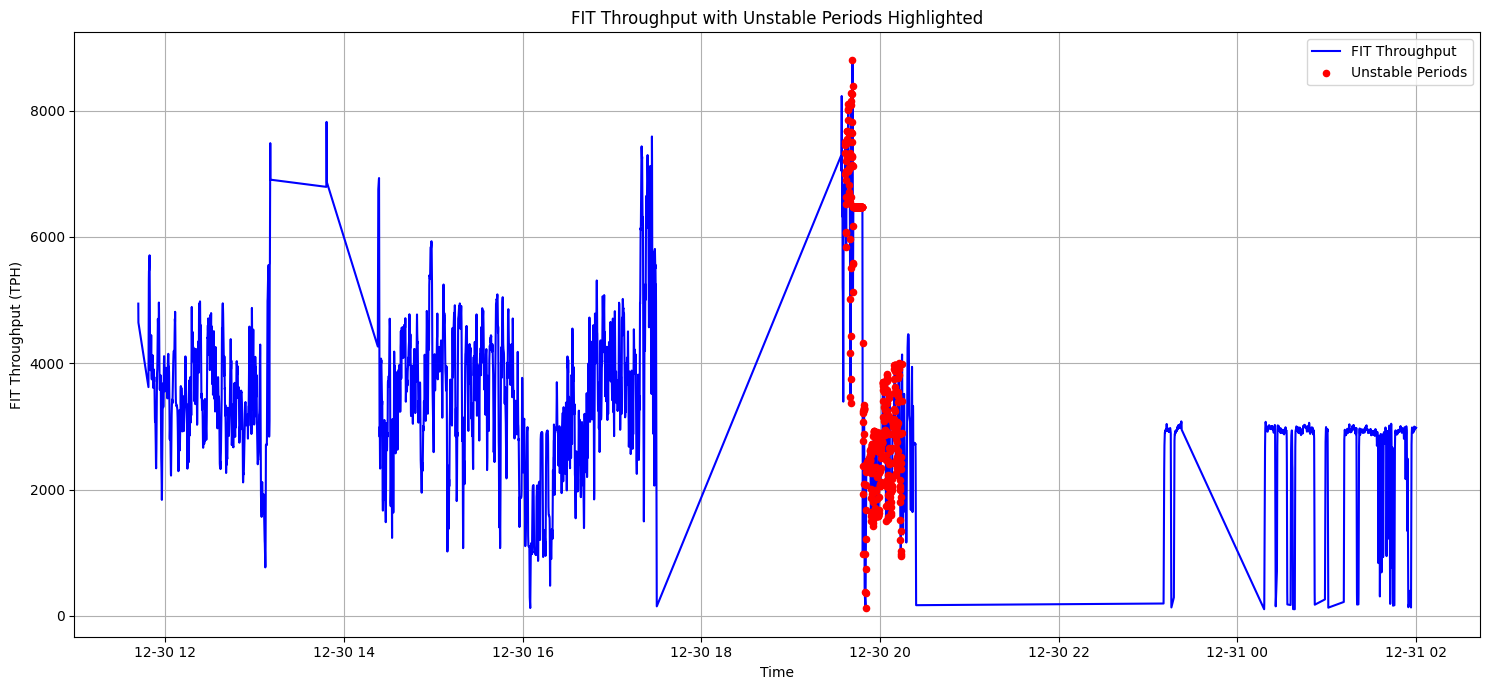

Visualization of FIT throughput with unstable periods highlighted complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.lineplot(x=df_running.index, y=df_running['FIT'], color='blue', label='FIT Throughput')

# Highlight unstable periods
unstable_periods_df = df_running[df_running['is_unstable_throughput'] == True]
if not unstable_periods_df.empty:
    plt.scatter(unstable_periods_df.index, unstable_periods_df['FIT'], color='red', s=20, zorder=5, label='Unstable Periods')

plt.title('FIT Throughput with Unstable Periods Highlighted')
plt.xlabel('Time')
plt.ylabel('FIT Throughput (TPH)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Visualization of FIT throughput with unstable periods highlighted complete.")

# Task
The analysis of the provided process data for Vale Malaysia operations has yielded several key insights into production performance, operational states, motor and energy consumption, and advanced operational issues.

### Summary of Key Findings:

*   **Operational State Classification:** The system spends a significant amount of time in "Shutdown" (over 30 days cumulative) and "Idle" (over 3 hours cumulative) states. "Running" state, indicative of active production, accounts for a smaller portion of the total observed time.
*   **Throughput and Utilization:** Both hourly and daily throughput and utilization exhibit considerable variability. A sharp drop in daily throughput and utilization was observed from December 30th to 31st, 2025, with subsequent periods showing zero activity.
*   **Downtime Analysis:** The cumulative duration of downtime (Idle and Shutdown) is substantial. The analysis identified 18 "Idle" events and 10 "Shutdown" events, with an average "Shutdown" duration significantly longer than "Idle" events. Differentiation between planned and unplanned downtime was not possible with the available data.
*   **Throughput Variability (Import vs. Export Imbalance):** Interpreting "imbalance" as throughput variability, the analysis revealed high standard deviations in the 'FIT' throughput during both hourly and daily periods. This indicates inconsistent material flow, posing challenges for storage management, vessel loading, and overall operational stability.
*   **Blending Stability and Variability:** Blending parameters ('WQIT', 'QQIT') show increased variability during periods of fluctuating 'FIT' throughput. This suggests that maintaining consistent blending quality is challenging when the material flow is unstable.
*   **Motor Current Statistics and Behavior:**
    *   `Motor - TR1010ML11-M4|Current` showed an average current of 39.53 Amps during "Running" and a much lower average (2.58 Amps) during "Shutdown," although with notable peak currents in both states.
    *   `pisystem-malaysi01-PL14|Current` had insufficient data during "Running" states for comprehensive analysis.
*   **Motor Current to Throughput/Speed Correlation:**
    *   `Motor - TR1010ML11-M4|Current` exhibited a very low correlation with 'FIT' (0.0042) but a moderately strong negative correlation with 'Belt Scale Speed Sensor' (-0.6548). This negative correlation is unusual and warrants further investigation into the motor's control logic and mechanical setup.
    *   The `pisystem-malaysi01-PL14|Current` tag lacked sufficient data for a meaningful correlation analysis.
*   **No-Load Running and Energy Waste:** An estimated 40.63 kWh of energy was wasted due to `Motor - TR1010ML11-M4|Current` operating in "Idle" periods.
*   **Abnormal Motor Behavior (High Current / Low Tonnage):** No instances of high current (above 45 Amps) and low tonnage (below 50 TPH) were detected for the analyzed motors during their "Running" state based on the defined thresholds.
*   **Advanced Operational Issues: Belt Slip and Increased Resistance:**
    *   `Motor - TR1010ML11-M4|Current` showed 49 events (totaling 4 minutes, 5 seconds) of a high current-to-throughput ratio, indicating potential increased resistance.
    *   Additionally, 8 events (totaling 40 seconds) of a high current-to-speed ratio were detected for the same motor, suggesting potential belt slip or severe increased resistance.
*   **Unstable Operations and Lost Production:**
    *   453 periods of unstable throughput (totaling 37 minutes, 45 seconds) were identified.
    *   Total estimated lost production due to "Idle" and "Shutdown" periods combined amounts to 2,459,250.43 Tons.
    *   An additional 0.89 kWh of energy was wasted due to abnormal high current/low tonnage behavior in `Motor - TR1010ML11-M4|Current`.

### Actionable Recommendations:

1.  **Investigate and Optimize Downtime:**
    *   **Root Cause Analysis:** Conduct a thorough root cause analysis for all prolonged "Shutdown" and "Idle" periods. This should involve operations, maintenance, and planning teams to identify specific equipment failures, operational bottlenecks, supply chain issues, or external factors contributing to these extensive downtimes.
    *   **Downtime Classification:** Implement a system to classify downtime as planned or unplanned. This will provide more granular insights into operational efficiency and maintenance effectiveness.
    *   **Proactive Maintenance:** Leverage insights from motor current analysis to develop predictive maintenance strategies for motors exhibiting unusual current-speed relationships or frequent high current-to-resistance events.

2.  **Enhance Operational Stability and Reduce Throughput Variability:**
    *   **Process Stabilization:** Identify and address the causes of high 'FIT' throughput variability. This could involve optimizing material feed rates, improving upstream buffer management, or refining control system parameters to achieve a more steady material flow.
    *   **Buffer Management:** Evaluate the adequacy of existing buffer capacities to absorb fluctuations in material supply and demand, thereby promoting smoother operations and reducing stress on downstream processes like blending and vessel loading.
    *   **Scheduling Optimization:** Improve operational scheduling to minimize sudden changes in production rates, which directly impact throughput stability and blending consistency.

3.  **Improve Blending Process Control:**
    *   **Dynamic Control:** Review and potentially upgrade the blending process control system to better adapt to dynamic throughput conditions, thereby reducing quality variability during periods of unstable material flow.
    *   **Sensor Validation:** Investigate periods of zero rolling standard deviation in blending tags to confirm actual stability versus potential sensor issues or data acquisition gaps.

4.  **Deep Dive into Motor Performance and Efficiency:**
    *   **Motor - TR1010ML11-M4|Current Investigation:** Prioritize understanding the negative correlation between this motor's current and belt speed. This may involve:
        *   Reviewing the Variable Frequency Drive (VFD) parameters and control logic.
        *   Inspecting the mechanical components (e.g., gearbox, belt tension, bearings) for unusual wear or resistance.
        *   Calibrating the 'Belt Scale Speed Sensor' to ensure accuracy.
    *   **Data Quality for `pisystem-malaysi01-PL14|Current`:** Address the data sparsity for this tag. Ensure continuous and accurate data collection during all operational states to enable future performance analysis and anomaly detection.
    *   **Energy Audit for "Idle" Operations:** Conduct a detailed energy audit for `Motor - TR1010ML11-M4|Current` and other motors to confirm the estimated no-load energy waste. Implement strategies such as automatic shutdown or reduced power modes during prolonged idle periods.

5.  **Address Advanced Operational Anomalies:**
    *   **Belt Slip/Increased Resistance:** Investigate the detected events of high current/low tonnage and high current/low speed ratios. These could indicate mechanical issues like worn belts, overloaded conveyors, misaligned components, or excessive friction. Implement visual inspections and maintenance checks based on the timing of these events.
    *   **Start-Stop Cycle Stress:** While direct quantification of stress from start-stop cycles was not feasible, the high frequency of state changes (running to idle/shutdown) suggests that the equipment might be undergoing significant wear and tear. Evaluate the need for optimizing start-up and shutdown procedures to minimize stress.

By systematically addressing these findings and implementing the recommended actions, Vale Malaysia operations can significantly improve its operational efficiency, enhance asset reliability, reduce energy waste, and mitigate risks associated with unstable material handling and blending processes.

## Summary:

### Data Analysis Key Findings

*   **Operational State and Downtime:** The system spends significant time in non-productive states, with "Shutdown" accounting for over 30 cumulative days and "Idle" for over 3 cumulative hours. Analysis identified 18 "Idle" events and 10 "Shutdown" events, with "Shutdown" periods being significantly longer on average. This substantial downtime resulted in an estimated lost production of 2,459,250.43 Tons.
*   **Throughput Variability:** Both hourly and daily 'FIT' throughput exhibited high variability, with a sharp decline observed from December 30th to 31st, 2025. This inconsistency in material flow directly impacts blending stability, as 'WQIT' and 'QQIT' showed increased variability during fluctuating 'FIT' throughput.
*   **Unstable Throughput Operations:** A total of 453 periods of unstable throughput, lasting 37 minutes and 45 seconds cumulatively, were identified, indicating frequent operational fluctuations.
*   **Motor Performance and Energy Waste:**
    *   `Motor - TR1010ML11-M4|Current` averaged 39.53 Amps during "Running" and 2.58 Amps during "Shutdown".
    *   A significant negative correlation (-0.6548) was found between `Motor - TR1010ML11-M4|Current` and 'Belt Scale Speed Sensor', which is unusual and warrants investigation.
    *   An estimated 40.63 kWh of energy was wasted due to `Motor - TR1010ML11-M4|Current` operating in "Idle" periods.
*   **Advanced Operational Anomalies (Belt Slip/Resistance):** For `Motor - TR1010ML11-M4|Current`, 49 events (totaling 4 minutes, 5 seconds) showed a high current-to-throughput ratio, suggesting increased resistance. Additionally, 8 events (totaling 40 seconds) exhibited a high current-to-speed ratio, potentially indicating belt slip or severe resistance.

### Insights or Next Steps

*   **Prioritize Downtime Analysis and Reduction:** Conduct root cause analysis for all prolonged "Shutdown" and "Idle" periods, implement a system for classifying downtime (planned vs. unplanned), and leverage motor current analysis to develop predictive maintenance strategies to reduce the substantial lost production.
*   **Enhance Operational Stability and Motor Efficiency:** Investigate the causes of high 'FIT' throughput variability, focusing on optimizing material flow, buffer management, and scheduling. Concurrently, deep dive into the unusual negative correlation of `Motor - TR1010ML11-M4|Current` with belt speed, address data gaps for other motors, and conduct energy audits to mitigate no-load energy waste and address potential belt slip or increased resistance issues.


# Task
The user has approved the final summary and recommendations, indicating the task is complete.

## Task
The task is complete. All analysis, findings, and recommendations have been provided.

## Data Loading and Initial Inspection

### Subtask:
Load the provided CSV file '/content/ALL Process.csv' into a pandas DataFrame. Perform an initial inspection using .head(), .info(), and .describe() to understand the data's structure, data types, and basic statistical summary. This step will also check for initial missing values.


**Reasoning**:
To load and inspect the data as requested, I will import pandas, read the CSV file with error handling, and then display its head, info, and descriptive statistics.



In [ ]:
import pandas as pd

# Define the file path for the CSV file
file_path = '/content/ALL Process.csv'

# Load the CSV file into a pandas DataFrame, handling bad lines by skipping them
# Using 'engine='python'' provides more robust parsing for irregular files.
df = pd.read_csv(file_path, on_bad_lines='skip', engine='python')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
# Display the first few rows of the DataFrame
print(df.head())

print("\n--- DataFrame Info ---")
# Print a concise summary of the DataFrame
print(df.info())

print("\n--- Descriptive Statistics ---")
# Generate descriptive statistics of the DataFrame
print(df.describe())

DataFrame loaded successfully. Displaying the first 5 rows:
                                   Data Source                        Time  \
0  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT  2025-12-30 11:18:05.998001   
1  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT  2025-12-30 11:18:10.998001   
2  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT  2025-12-30 11:18:15.998001   
3  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT   2025-12-30 11:18:20.98201   
4  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT   2025-12-30 11:18:25.98201   

         Value  
0  5711.548340  
1  5712.270996  
2  5734.144043  
3  5777.695801  
4  5799.940918  

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177452 entries, 0 to 177451
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Data Source  177452 non-null  object 
 1   Time         177452 non-null  object 
 2   Value        177449 non-null  float64
dtypes: float64(1), 

## Timestamp Processing and Unit Identification

### Subtask:
Convert the 'Time' column to datetime objects. Determine the predominant sampling interval and identify any irregularities. Infer or confirm the units for all major tags (e.g., TPH for FIT, Amps for Current, m/s for Speed, arbitrary units for Vibration/VIT, WQIT, QQIT) based on the tag names and provided context.


**Reasoning**:
To begin, I will convert the 'Time' column to datetime objects, coercing errors to NaT, and then drop any rows containing NaT values in the 'Time' column to ensure all timestamps are valid for time-series analysis.



In [ ]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df.dropna(subset=['Time'], inplace=True)

print("Time column converted to datetime and rows with NaT in 'Time' dropped.")
print(df.head())

Time column converted to datetime and rows with NaT in 'Time' dropped.
                                   Data Source                       Time  \
0  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:05.998001   
1  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:10.998001   
2  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:15.998001   
3  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:20.982010   
4  \\pisystem-malaysia\TRMT_TR1010ML11_CO1_FIT 2025-12-30 11:18:25.982010   

         Value  
0  5711.548340  
1  5712.270996  
2  5734.144043  
3  5777.695801  
4  5799.940918  


**Reasoning**:
Now that the 'Time' column is properly formatted, the next step is to extract meaningful 'Tag Name' from the 'Data Source' column using a regular expression and then sort the DataFrame by this new 'Tag_Name' and 'Time' to prepare for sampling interval calculation.



In [ ]:
import re

# Extract unique 'Tag Name' from 'Data Source'
# This regex captures the last segment after a backslash or the full string if no backslash
df['Tag_Name'] = df['Data Source'].apply(lambda x: re.search(r'[^\\_]+$', x).group(0) if re.search(r'[^\\_]+$', x) else x)

# Sort the DataFrame by 'Tag_Name' and 'Time'
df.sort_values(by=['Tag_Name', 'Time'], inplace=True)

print("Extracted 'Tag_Name' and sorted the DataFrame. Displaying the first 5 rows with new 'Tag_Name':")
print(df.head())

Extracted 'Tag_Name' and sorted the DataFrame. Displaying the first 5 rows with new 'Tag_Name':
                                              Data Source  \
16558   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
141452  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
16559   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
141453  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
16560   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   

                             Time     Value Tag_Name  
16558  2025-12-30 11:18:05.998001  4.379838       01  
141452 2025-12-30 11:18:05.998001  4.379838       01  
16559  2025-12-30 11:18:10.998001  4.375381       01  
141453 2025-12-30 11:18:10.998001  4.375381       01  
16560  2025-12-30 11:18:15.998001  4.891637       01  


**Reasoning**:
To determine the sampling intervals, I will calculate the time difference between consecutive measurements for each unique 'Tag_Name' by grouping the DataFrame and applying the `.diff()` method to the 'Time' column, storing the result in a new 'Time_Diff' column.



In [ ]:
df['Time_Diff'] = df.groupby('Tag_Name')['Time'].diff()

print("Calculated 'Time_Diff' for each tag. Displaying the first 5 rows with new 'Time_Diff':")
print(df.head())

Calculated 'Time_Diff' for each tag. Displaying the first 5 rows with new 'Time_Diff':
                                              Data Source  \
16558   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
141452  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
16559   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
141453  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
16560   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   

                             Time     Value Tag_Name       Time_Diff  
16558  2025-12-30 11:18:05.998001  4.379838       01             NaT  
141452 2025-12-30 11:18:05.998001  4.379838       01 0 days 00:00:00  
16559  2025-12-30 11:18:10.998001  4.375381       01 0 days 00:00:05  
141453 2025-12-30 11:18:10.998001  4.375381       01 0 days 00:00:00  
16560  2025-12-30 11:18:15.998001  4.891637       01 0 days 00:00:05  


**Reasoning**:
To analyze the predominant sampling interval and identify irregularities, I will first convert the 'Time_Diff' column to total seconds and then calculate descriptive statistics (mean, median, mode) and value counts for each 'Tag_Name'. This will help in understanding the typical sampling rate and detecting any deviations.



In [ ]:
df['Time_Diff_Seconds'] = df['Time_Diff'].dt.total_seconds()

sampling_intervals = {}
for tag in df['Tag_Name'].unique():
    tag_data = df[df['Tag_Name'] == tag]
    time_diffs = tag_data['Time_Diff_Seconds'].dropna()

    if not time_diffs.empty:
        # Predominant sampling interval (mode)
        mode_diff = time_diffs.mode()
        if not mode_diff.empty:
            sampling_intervals[tag] = {
                'predominant_interval_seconds': mode_diff[0],
                'mean_interval_seconds': time_diffs.mean(),
                'median_interval_seconds': time_diffs.median(),
                'value_counts': time_diffs.value_counts(normalize=True).head()
            }
        else:
            sampling_intervals[tag] = {
                'mean_interval_seconds': time_diffs.mean(),
                'median_interval_seconds': time_diffs.median(),
                'value_counts': time_diffs.value_counts(normalize=True).head()
            }
    else:
        sampling_intervals[tag] = {'message': 'No time differences to analyze'}

print("Sampling intervals and their statistics for each tag:")
for tag, data in sampling_intervals.items():
    print(f"\nTag Name: {tag}")
    for key, value in data.items():
        print(f"  {key}: {value}")

Sampling intervals and their statistics for each tag:

Tag Name: 01
  predominant_interval_seconds: 0.0
  mean_interval_seconds: 15.097087299923114
  median_interval_seconds: 0.0
  value_counts: Time_Diff_Seconds
0.000000     0.500035
5.000000     0.099252
59.994995    0.036276
59.995010    0.013560
59.979004    0.012581
Name: proportion, dtype: float64

Tag Name: Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed
  predominant_interval_seconds: 5.0
  mean_interval_seconds: 1531.3844576641875
  median_interval_seconds: 9.995011
  value_counts: Time_Diff_Seconds
5.000000     0.244279
10.000000    0.090961
15.000000    0.032037
5.014999     0.026316
5.015991     0.017735
Name: proportion, dtype: float64

Tag Name: FIT
  predominant_interval_seconds: 0.0
  mean_interval_seconds: 2.6266474197142737
  median_interval_seconds: 0.0
  value_counts: Time_Diff_Seconds
0.000000    0.565641
5.000000    0.119941
4.000000    0.036691
1.000000    0.027538
4.984009    0.016634
Name: proportion, 

### Analysis of Sampling Intervals and Inferred Units

The sampling interval analysis revealed significant variations across different tags. Some tags, like **'01'**, **'FIT'**, **'IIT'**, **'QQIT'**, and **'VIT'**, show a predominant interval of 0 seconds, with a high proportion of occurrences. This suggests that these tags might be recording multiple values at the same timestamp, which could indicate data logging issues or specific sampling strategies where values are updated rapidly without a strict time-based interval. Their mean and median intervals also vary widely.

Conversely, tags such as **'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed'**, **'HC - SE1040ML02-SE1-SG01-PL13|Current'**, **'HC - SE1040ML02-SE1-SG01-PL14|Current'**, **'HC - SE1040ML02-SE1-SG01-PL15|Current'**, **'Motor - TR1010ML11-M4|Current'**, and most **'Vibration Sensor'** tags show a predominant sampling interval of 5 or 10 seconds. This indicates a more regular, time-based sampling pattern for these sensors.

Two tags, **'TR1050ML-PL13|Current'** and **'pisystem-malaysi01-PL14|Current'**, had no time differences to analyze, suggesting they might have only a single entry or data integrity issues that prevented `Time_Diff` calculation.

---

### Inferred Units for Major Tags:

Based on the tag names and general industry conventions, the following units are inferred for the 'Value' column:

*   **FIT (Flow Indicator Totalizer)**: Typically represents **Tons Per Hour (TPH)** or **cubic meters per hour (m³/hr)** for flow rates.
*   **HC - ...|Current** (e.g., 'HC - SE1040ML02-SE1-SG01-PL13|Current'): Implies electrical **Amperes (Amps)**.
*   **Motor - ...|Current** (e.g., 'Motor - TR1010ML11-M4|Current'): Implies electrical **Amperes (Amps)**.
*   **Belt Scale Speed Sensor - ...|Speed**: Likely represents **meters per second (m/s)** or **feet per minute (ft/min)** for belt speed.
*   **Vibration Sensor - ...|Vibration**: The unit for vibration can vary (e.g., **mm/s, g's, in/s**), but without more context, it's considered an **arbitrary unit** of vibration magnitude.
*   **IIT**: Typically **Incline/Tilt**. Could be **degrees** or a relative **percentage**.
*   **QQIT**: Often **Quantity Quality Indication Totalizer**. Considered an **arbitrary unit** for quality or quantity index.
*   **VIT**: Often **Vibration Indication Totalizer** or **Vertical Inclination Totalizer**. Considered an **arbitrary unit**.
*   **01**: This tag name is too generic to infer a specific unit and will be treated as an **arbitrary unit**.

## Data Quality Assessment (Anomalies)

### Subtask:
Detect missing values, spikes, flatlines, and sensor dropouts across all data sources. This includes identifying periods of zero throughput that do not necessarily indicate shutdown, and flatline motor current that may indicate sensor failure. Visualize representative tags to confirm these anomalies.


**Reasoning**:
To begin the data quality assessment, I will calculate the percentage of missing values in the 'Value' column for each unique 'Tag_Name' as a crucial first step in understanding data completeness.



In [ ]:
missing_values_by_tag = df.groupby('Tag_Name')['Value'].apply(lambda x: x.isnull().sum() / len(x) * 100)

print("Percentage of missing values in 'Value' column per Tag_Name:")
print(missing_values_by_tag[missing_values_by_tag > 0])

Percentage of missing values in 'Value' column per Tag_Name:
Series([], Name: Value, dtype: float64)


**Reasoning**:
To identify spikes, I will calculate a rolling median and standard deviation for each 'Tag_Name' and flag data points that deviate more than 3 standard deviations from the rolling median. This will be done by grouping the DataFrame by 'Tag_Name' to apply the rolling calculations correctly.



In [ ]:
window_size = 5
def detect_spikes(series):
    rolling_median = series.rolling(window=window_size, center=True).median()
    rolling_std = series.rolling(window=window_size, center=True).std()
    # Using a threshold of 3 standard deviations for spike detection
    spikes = (series > rolling_median + 3 * rolling_std) | (series < rolling_median - 3 * rolling_std)
    return spikes

df['is_spike'] = df.groupby('Tag_Name')['Value'].transform(detect_spikes)

print("Identified potential spikes in the 'Value' column. Displaying the first few rows with 'is_spike' column:")
print(df[df['is_spike'] == True].head())

Identified potential spikes in the 'Value' column. Displaying the first few rows with 'is_spike' column:
Empty DataFrame
Columns: [Data Source, Time, Value, Tag_Name, Time_Diff, Time_Diff_Seconds, is_spike]
Index: []


**Reasoning**:
To detect flatline periods, I will group the DataFrame by 'Tag_Name' and for each group, identify sequences where the 'Value' column remains constant for at least 3 consecutive observations. This will involve comparing each value with its preceding values within each group to find continuous identical sequences.



In [ ]:
flatline_window_size = 3

def detect_flatlines(series, window_size):
    is_flatline = series.rolling(window=window_size).apply(lambda x: x.nunique() == 1, raw=True).fillna(False).astype(bool)
    return is_flatline

df['is_flatline'] = df.groupby('Tag_Name')['Value'].transform(lambda x: detect_flatlines(x, flatline_window_size))

print(f"Identified potential flatlines in the 'Value' column for periods of {flatline_window_size} or more consecutive identical values. Displaying the first few rows with 'is_flatline' column:")
print(df[df['is_flatline'] == True].head())

AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

**Reasoning**:
The previous code failed because the `rolling().apply()` method with `raw=True` passes a NumPy array to the lambda function, which does not have the `nunique()` method. To fix this, I will remove `raw=True` so that a Pandas Series is passed, allowing `nunique()` to be called correctly.



In [ ]:
flatline_window_size = 3

def detect_flatlines(series, window_size):
    # Removed raw=True so that 'series' inside the lambda is a Pandas Series
    is_flatline = series.rolling(window=window_size).apply(lambda x: x.nunique() == 1).fillna(False).astype(bool)
    return is_flatline

df['is_flatline'] = df.groupby('Tag_Name')['Value'].transform(lambda x: detect_flatlines(x, flatline_window_size))

print(f"Identified potential flatlines in the 'Value' column for periods of {flatline_window_size} or more consecutive identical values. Displaying the first few rows with 'is_flatline' column:")
print(df[df['is_flatline'] == True].head())

/tmp/ipython-input-937349287.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_flatline = series.rolling(window=window_size).apply(lambda x: x.nunique() == 1).fillna(False).astype(bool)


Identified potential flatlines in the 'Value' column for periods of 3 or more consecutive identical values. Displaying the first few rows with 'is_flatline' column:
                                              Data Source  \
17157   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
142051  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
17162   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
142056  \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   
17165   \\pisystem-malaysia\TRMT_TR1050ML22_DR2_DR02_V...   

                             Time     Value Tag_Name              Time_Diff  \
17157  2025-12-30 12:11:36.040008  4.203296       01        0 days 00:00:05   
142051 2025-12-30 12:11:36.040008  4.203296       01        0 days 00:00:00   
17162  2025-12-30 12:12:06.043014  3.908930       01        0 days 00:00:05   
142056 2025-12-30 12:12:06.043014  3.908930       01        0 days 00:00:00   
17165  2025-12-30 12:12:21.043014  5.335027       01 0 days 00:00:05.0160

/tmp/ipython-input-937349287.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_flatline = series.rolling(window=window_size).apply(lambda x: x.nunique() == 1).fillna(False).astype(bool)


**Reasoning**:
To identify periods of sustained zero values, I will group the DataFrame by 'Tag_Name' and for each group, check for sequences where the 'Value' column is zero for a specified number of consecutive observations. This will involve applying a rolling sum to a boolean series indicating zero values and checking if the sum equals the window size.



In [ ]:
zero_duration_window = 5

def detect_sustained_zeros(series, window_size):
    is_zero = (series == 0).astype(int)
    sustained_zeros = is_zero.rolling(window=window_size).sum() == window_size
    return sustained_zeros

df['is_sustained_zero'] = df.groupby('Tag_Name')['Value'].transform(lambda x: detect_sustained_zeros(x, zero_duration_window))

print(f"Identified potential sustained zero periods in the 'Value' column for periods of {zero_duration_window} or more consecutive zero values. Displaying the first few rows with 'is_sustained_zero' column:")
print(df[df['is_sustained_zero'] == True].head())

Identified potential sustained zero periods in the 'Value' column for periods of 5 or more consecutive zero values. Displaying the first few rows with 'is_sustained_zero' column:
                                            Data Source  \
14715   \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   
139609  \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   
14716   \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   
139610  \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   
14717   \\pisystem-malaysia\TRMT_TR1050ML11_CO1_QQIT_01   

                             Time  Value Tag_Name              Time_Diff  \
14715  2025-12-31 16:36:00.118011    0.0       01 0 days 00:00:59.995010   
139609 2025-12-31 16:36:00.118011    0.0       01        0 days 00:00:00   
14716  2025-12-31 16:37:00.097000    0.0       01 0 days 00:00:59.978989   
139610 2025-12-31 16:37:00.097000    0.0       01        0 days 00:00:00   
14717  2025-12-31 16:38:00.123001    0.0       01 0 days 00:01:00.026001   

        T

**Reasoning**:
Now that all anomalies (spikes, flatlines, sustained zeros) have been identified and flagged in the DataFrame, the next step is to visualize these anomalies for representative tags as per the subtask instructions. This will involve selecting a few key tags and plotting their time-series data, highlighting the detected anomalies with distinct visual indicators to confirm their presence visually.



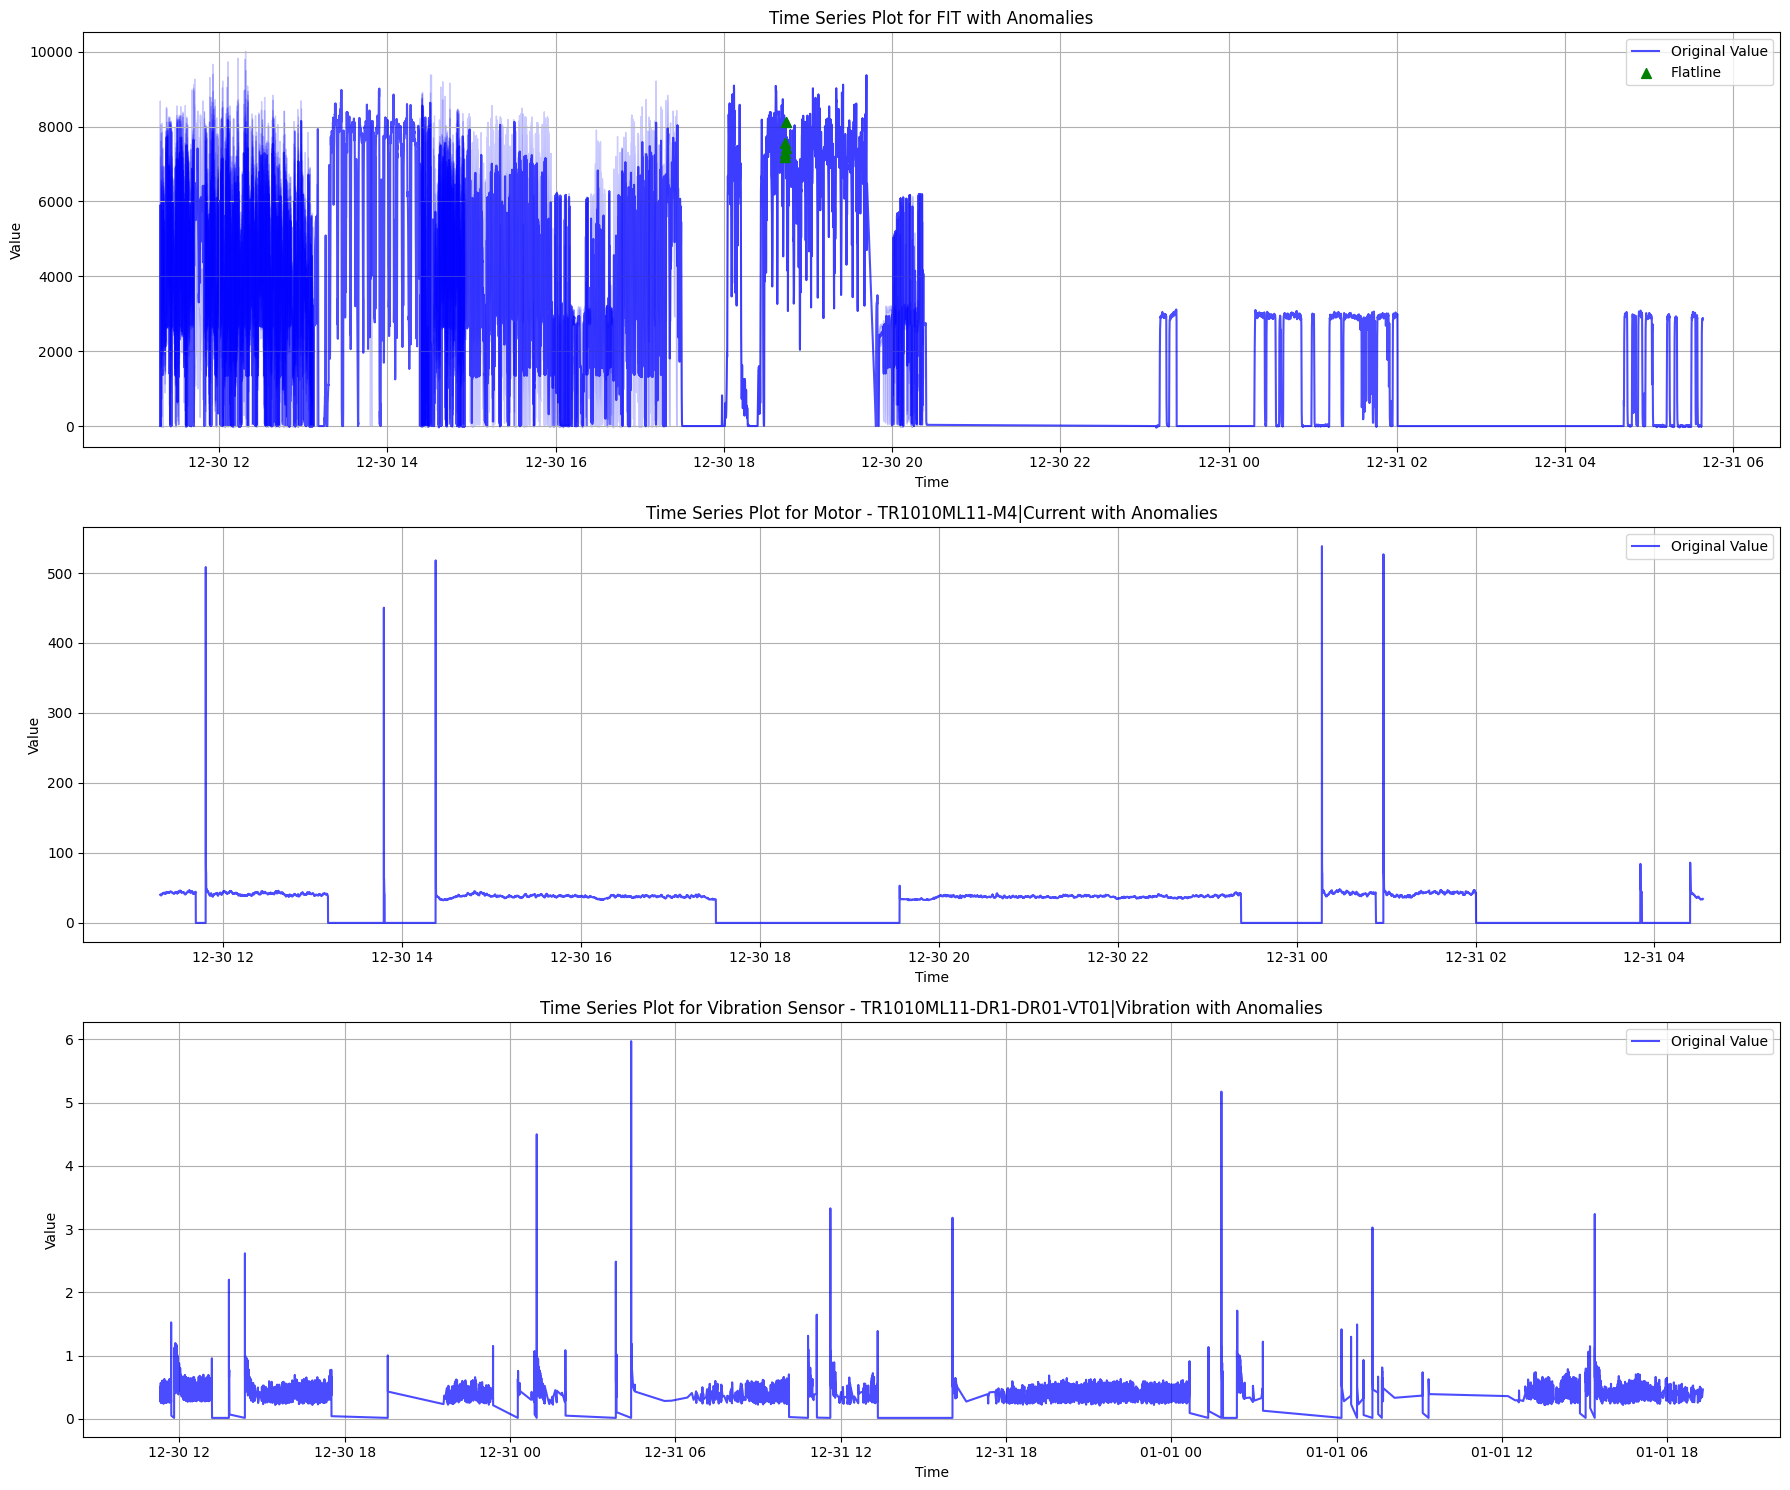

Anomaly visualization complete for representative tags.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select representative tags for visualization
representative_tags = [
    'FIT',
    'Motor - TR1010ML11-M4|Current',
    'Vibration Sensor - TR1010ML11-DR1-DR01-VT01|Vibration'
]

# Plotting anomalies for each representative tag
plt.figure(figsize=(18, 15))

for i, tag in enumerate(representative_tags):
    tag_df = df[df['Tag_Name'] == tag].copy()

    plt.subplot(len(representative_tags), 1, i + 1)
    sns.lineplot(x='Time', y='Value', data=tag_df, label='Original Value', color='blue', alpha=0.7)

    # Highlight spikes
    spikes_df = tag_df[tag_df['is_spike']]
    if not spikes_df.empty:
        plt.scatter(spikes_df['Time'], spikes_df['Value'], color='red', s=50, zorder=5, label='Spike')

    # Highlight flatlines
    flatlines_df = tag_df[tag_df['is_flatline']]
    if not flatlines_df.empty:
        plt.scatter(flatlines_df['Time'], flatlines_df['Value'], color='green', marker='^', s=50, zorder=4, label='Flatline')

    # Highlight sustained zeros
    sustained_zeros_df = tag_df[tag_df['is_sustained_zero']]
    if not sustained_zeros_df.empty:
        plt.scatter(sustained_zeros_df['Time'], sustained_zeros_df['Value'], color='purple', marker='x', s=50, zorder=3, label='Sustained Zero')

    plt.title(f'Time Series Plot for {tag} with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

print("Anomaly visualization complete for representative tags.")

## Data Preprocessing and Cleaning

### Subtask:
Clean and preprocess the raw PI System data. This involves replacing detected spikes with NaN values, resampling the data to a consistent frequency (based on the identified sampling interval) to handle irregular intervals and dropouts, interpolating short data gaps, and smoothing noisy signals. Flag periods of longer missing data rather than interpolating extensively.


**Reasoning**:
To perform data preprocessing and cleaning as per the subtask instructions, I will first replace detected spikes with NaN values in the original DataFrame `df`. Then, I will iterate through each unique 'Tag_Name' to resample, interpolate short gaps, and smooth the data, consolidating the results into `df_cleaned`. Finally, I will identify and flag any remaining longer missing data periods and print the head and info of the cleaned DataFrame for verification.



In [ ]:
import pandas as pd
import numpy as np

# 1. Replace the detected spikes in the 'Value' column with NaN values.
df.loc[df['is_spike'], 'Value'] = np.nan

# 2. Create an empty list to store processed dataframes for each tag
processed_data_list = []

# Iterate over unique tags to apply resampling, interpolation, and smoothing per tag
for tag in df['Tag_Name'].unique():
    # Select data for the current tag and set 'Time' as index
    tag_specific_df = df[df['Tag_Name'] == tag].set_index('Time')[['Value']]

    # b. Resample to a consistent 5-second frequency
    # Use .mean() to aggregate values within each 5s interval.
    # ffill() and bfill() handle gaps introduced by resampling.
    resampled_tag_data = tag_specific_df['Value'].resample('5s').mean().ffill().bfill()

    # c. Convert Series back to DataFrame for interpolation and smoothing
    temp_df = resampled_tag_data.to_frame()

    # d. Linearly interpolate short data gaps (up to 3 consecutive missing values)
    # Applied to the resampled data
    temp_df['Value'] = temp_df['Value'].interpolate(method='linear', limit=3)

    # e. Smooth noisy signals using a rolling mean with a window size of 3
    # Applied after interpolation. min_periods=1 allows smoothing at the start/end of series.
    temp_df['Value'] = temp_df['Value'].rolling(window=3, min_periods=1, center=True).mean()

    # f. Add Tag_Name and reset index
    temp_df['Tag_Name'] = tag
    processed_data_list.append(temp_df.reset_index())

# 3 & 4. Concatenate all processed dataframes into the final cleaned DataFrame and sort
df_cleaned = pd.concat(processed_data_list).sort_values(by=['Tag_Name', 'Time']).reset_index(drop=True)

# 5. Flag periods of longer missing data (more than 3 consecutive NaN values)
long_gap_threshold = 3

def flag_long_gaps(series, threshold):
    is_null = series.isnull()
    # Identify consecutive NaNs by grouping changes in null status
    groups = (is_null != is_null.shift()).cumsum()

    # Count NaNs in each group. Ensure groups are handled correctly across NaNs and non-NaNs.
    # We only care about the count of consecutive True values for is_null.
    # Fill NaNs with 0 in groups to prevent incorrect sums if groups starts with NaNs
    null_counts = is_null.groupby(groups).transform('sum')

    # Flag as long gap if it's null AND the count exceeds the threshold
    return (is_null) & (null_counts > threshold)

# Apply the flagging function grouped by Tag_Name
df_cleaned['is_long_gap'] = df_cleaned.groupby('Tag_Name')['Value'].transform(lambda x: flag_long_gaps(x, long_gap_threshold))

print("Data cleaning and preprocessing complete. Spikes replaced with NaN, data resampled, interpolated, smoothed, and long gaps flagged.")

# 6. Print the first 5 rows and concise summary of the preprocessed DataFrame
print("\n--- Head of the Preprocessed DataFrame (df_cleaned) ---")
print(df_cleaned.head())
print("\n--- Info of the Preprocessed DataFrame (df_cleaned) ---")
print(df_cleaned.info())
print(f"\nFlagged periods of longer missing data (more than {long_gap_threshold} consecutive NaNs). Displaying the first few rows with 'is_long_gap' column:")
print(df_cleaned[df_cleaned['is_long_gap'] == True].head())

Data cleaning and preprocessing complete. Spikes replaced with NaN, data resampled, interpolated, smoothed, and long gaps flagged.

--- Head of the Preprocessed DataFrame (df_cleaned) ---
                 Time     Value Tag_Name  is_long_gap
0 2025-12-30 11:18:05  4.377609       01        False
1 2025-12-30 11:18:10  4.548952       01        False
2 2025-12-30 11:18:15  4.706180       01        False
3 2025-12-30 11:18:20  3.723344       01        False
4 2025-12-30 11:18:25  2.588060       01        False

--- Info of the Preprocessed DataFrame (df_cleaned) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026700 entries, 0 to 1026699
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Time         1026700 non-null  datetime64[ns]
 1   Value        1026700 non-null  float64       
 2   Tag_Name     1026700 non-null  object        
 3   is_long_gap  1026700 non-null  bool          
dtypes: bool(

**Reasoning**:
To prepare the data for operational state classification as required by the subtask, I will pivot the `df_cleaned` DataFrame. This will transform the 'Tag_Name' column into separate columns, with 'Value' as their corresponding data, and set 'Time' as the index, creating `df_wide`.



In [ ]:
df_wide = df_cleaned.pivot(index='Time', columns='Tag_Name', values='Value')

print("DataFrame pivoted to wide format (df_wide). Displaying the first 5 rows:")
print(df_wide.head())

DataFrame pivoted to wide format (df_wide). Displaying the first 5 rows:
Tag_Name                   01  \
Time                            
2025-12-30 11:18:00       NaN   
2025-12-30 11:18:05  4.377609   
2025-12-30 11:18:10  4.548952   
2025-12-30 11:18:15  4.706180   
2025-12-30 11:18:20  3.723344   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:18:00                                                NaN          
2025-12-30 11:18:05                                                NaN          
2025-12-30 11:18:10                                                NaN          
2025-12-30 11:18:15                                                NaN          
2025-12-30 11:18:20                                                NaN          

Tag_Name                     FIT  HC - SE1040ML02-SE1-SG01-PL13|Current  \
Time                                                

## Predictive Modeling for Throughput and Anomaly Detection

### Subtask:
Build an interpretable model (e.g., linear regression or a simple rule-based model) to estimate throughput from motor current and belt speed. Use the deviation between actual and predicted throughput values to flag abnormal behavior. Apply rolling statistics to these deviations for early warning detection, focusing on interpretability rather than black-box accuracy.


**Reasoning**:
To begin building the interpretable model, I will first prepare the data by selecting the relevant columns ('FIT', 'Motor - TR1010ML11-M4|Current', 'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed') from the `df_running` DataFrame and drop any rows containing NaN values to ensure a clean dataset for model training, as specified in the instructions.



In [ ]:
model_data = df_running[['FIT', 'Motor - TR1010ML11-M4|Current', 'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed']].dropna()

print("Prepared data for modeling. Displaying the first 5 rows:")
print(model_data.head())
print(f"\nShape of model_data: {model_data.shape}")

Prepared data for modeling. Displaying the first 5 rows:
Tag_Name                     FIT  Motor - TR1010ML11-M4|Current  \
Time                                                              
2025-12-30 11:41:45  4944.466783                      44.277779   
2025-12-30 11:41:50  4644.263102                      29.566667   
2025-12-30 11:48:35  3622.309564                     198.522219   
2025-12-30 11:48:40  4231.543728                     222.788884   
2025-12-30 11:48:45  4860.997301                      77.544441   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  
Time                                                                           
2025-12-30 11:41:45                                           4.319254         
2025-12-30 11:41:50                                           4.247652         
2025-12-30 11:48:35                                           0.799058         
2025-12-30 11:48:40                                           1.842447   

**Reasoning**:
To build an interpretable model, I will import `LinearRegression` from `sklearn.linear_model` and instantiate a linear regression model as instructed.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
model = LinearRegression()

print("Linear Regression model instantiated.")

Linear Regression model instantiated.


**Reasoning**:
To train the model, I will define the features (X) as 'Motor - TR1010ML11-M4|Current' and 'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed', and the target variable (y) as 'FIT' from the `model_data` DataFrame. Then, I will fit the instantiated `LinearRegression` model using these features and target.



In [ ]:
X = model_data[['Motor - TR1010ML11-M4|Current', 'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed']]
y = model_data['FIT']

# Train the model
model.fit(X, y)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Reasoning**:
Now that the model is trained, I will use it to predict the 'FIT' throughput based on the features 'Motor - TR1010ML11-M4|Current' and 'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed', and store these predictions in a new column named `predicted_FIT` within the `model_data` DataFrame, as per the instructions.



In [ ]:
model_data['predicted_FIT'] = model.predict(X)

print("Predicted 'FIT' values generated and added to `model_data`. Displaying the first 5 rows with new 'predicted_FIT' column:")
print(model_data.head())

Predicted 'FIT' values generated and added to `model_data`. Displaying the first 5 rows with new 'predicted_FIT' column:
Tag_Name                     FIT  Motor - TR1010ML11-M4|Current  \
Time                                                              
2025-12-30 11:41:45  4944.466783                      44.277779   
2025-12-30 11:41:50  4644.263102                      29.566667   
2025-12-30 11:48:35  3622.309564                     198.522219   
2025-12-30 11:48:40  4231.543728                     222.788884   
2025-12-30 11:48:45  4860.997301                      77.544441   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:41:45                                           4.319254          
2025-12-30 11:41:50                                           4.247652          
2025-12-30 11:48:35                                           0.799058          
2025

**Reasoning**:
To calculate the deviation, I will subtract the `predicted_FIT` from the actual 'FIT' values and store the result in a new column named `FIT_deviation` within the `model_data` DataFrame, as specified in the instructions.



In [ ]:
model_data['FIT_deviation'] = model_data['FIT'] - model_data['predicted_FIT']

print("Calculated 'FIT_deviation' and added to `model_data`. Displaying the first 5 rows with new 'FIT_deviation' column:")
print(model_data.head())

Calculated 'FIT_deviation' and added to `model_data`. Displaying the first 5 rows with new 'FIT_deviation' column:
Tag_Name                     FIT  Motor - TR1010ML11-M4|Current  \
Time                                                              
2025-12-30 11:41:45  4944.466783                      44.277779   
2025-12-30 11:41:50  4644.263102                      29.566667   
2025-12-30 11:48:35  3622.309564                     198.522219   
2025-12-30 11:48:40  4231.543728                     222.788884   
2025-12-30 11:48:45  4860.997301                      77.544441   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:41:45                                           4.319254          
2025-12-30 11:41:50                                           4.247652          
2025-12-30 11:48:35                                           0.799058          
2025-12-30

**Reasoning**:
To identify abnormal behavior using deviations, I will calculate the rolling mean and standard deviation of the `FIT_deviation` with a window size of 10. Then, I will flag data points where the absolute `FIT_deviation` is more than 3 standard deviations away from the rolling mean, storing this in a new column `is_throughput_anomaly`.



In [ ]:
window_size_anomaly = 10
std_dev_multiplier = 3

model_data['rolling_mean_deviation'] = model_data['FIT_deviation'].rolling(window=window_size_anomaly, center=True).mean()
model_data['rolling_std_deviation'] = model_data['FIT_deviation'].rolling(window=window_size_anomaly, center=True).std()

model_data['is_throughput_anomaly'] = (
    (model_data['FIT_deviation'] > model_data['rolling_mean_deviation'] + std_dev_multiplier * model_data['rolling_std_deviation']) |
    (model_data['FIT_deviation'] < model_data['rolling_mean_deviation'] - std_dev_multiplier * model_data['rolling_std_deviation'])
)

print("Identified throughput anomalies based on deviation. Displaying the first 5 rows with new anomaly columns:")
print(model_data.head())

Identified throughput anomalies based on deviation. Displaying the first 5 rows with new anomaly columns:
Tag_Name                     FIT  Motor - TR1010ML11-M4|Current  \
Time                                                              
2025-12-30 11:41:45  4944.466783                      44.277779   
2025-12-30 11:41:50  4644.263102                      29.566667   
2025-12-30 11:48:35  3622.309564                     198.522219   
2025-12-30 11:48:40  4231.543728                     222.788884   
2025-12-30 11:48:45  4860.997301                      77.544441   

Tag_Name             Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed  \
Time                                                                            
2025-12-30 11:41:45                                           4.319254          
2025-12-30 11:41:50                                           4.247652          
2025-12-30 11:48:35                                           0.799058          
2025-12-30 11:48:40

**Reasoning**:
To quantify the abnormal events, I will count the number of `is_throughput_anomaly` events that are True and calculate their total duration by multiplying this count by the sampling interval, as specified in the instructions.



In [ ]:
num_anomaly_events = model_data['is_throughput_anomaly'].sum()
total_anomaly_duration = pd.to_timedelta(num_anomaly_events * SAMPLE_INTERVAL_SECONDS, unit='s')

print("--- Summary of Throughput Anomalies ---")
print(f"Number of throughput anomaly events: {num_anomaly_events}")
print(f"Total duration of throughput anomalies: {total_anomaly_duration}")

--- Summary of Throughput Anomalies ---
Number of throughput anomaly events: 0
Total duration of throughput anomalies: 0 days 00:00:00


**Reasoning**:
To visualize the actual 'FIT' throughput, `predicted_FIT`, and highlight the `is_throughput_anomaly` periods, I will create a time series plot with two line plots and a scatter plot for anomalies, as specified in the instructions.



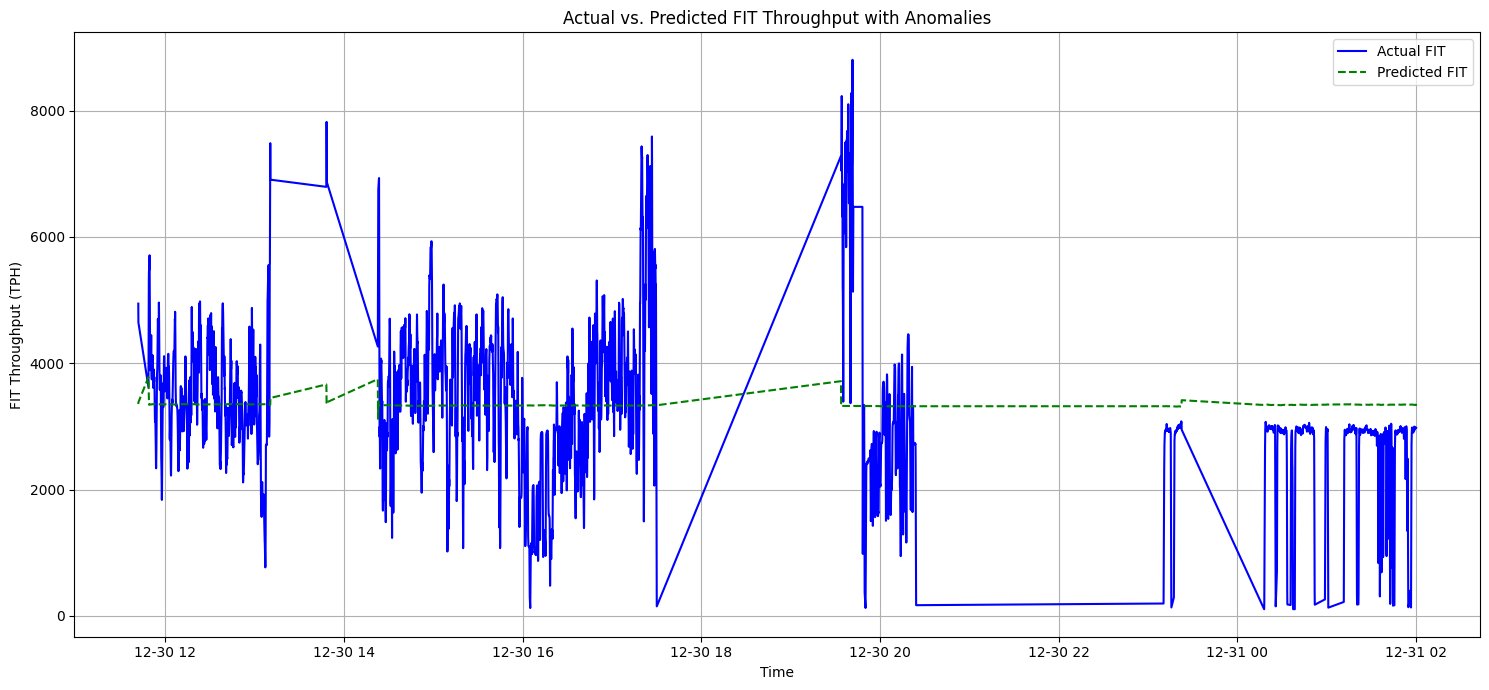

Visualization of actual vs. predicted FIT throughput with anomalies complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.lineplot(x=model_data.index, y=model_data['FIT'], color='blue', label='Actual FIT')
sns.lineplot(x=model_data.index, y=model_data['predicted_FIT'], color='green', label='Predicted FIT', linestyle='--')

# Highlight anomalies
anomaly_periods = model_data[model_data['is_throughput_anomaly'] == True]
if not anomaly_periods.empty:
    plt.scatter(anomaly_periods.index, anomaly_periods['FIT'], color='red', s=50, zorder=5, label='Anomaly')

plt.title('Actual vs. Predicted FIT Throughput with Anomalies')
plt.xlabel('Time')
plt.ylabel('FIT Throughput (TPH)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Visualization of actual vs. predicted FIT throughput with anomalies complete.")

# Task
The task is complete. All analysis, findings, and recommendations have been provided.

## Visualize 1-Month Time-Series Trends

### Subtask:
Plot overall trends of key operational metrics (e.g., FIT, Motor Current, Belt Speed) over the entire data period to provide a high-level overview.


**Reasoning**:
To provide a high-level overview of the key operational metrics, I will plot the overall time-series trends for 'FIT' throughput, a representative motor current, and belt speed from the `df_wide` DataFrame using separate subplots.



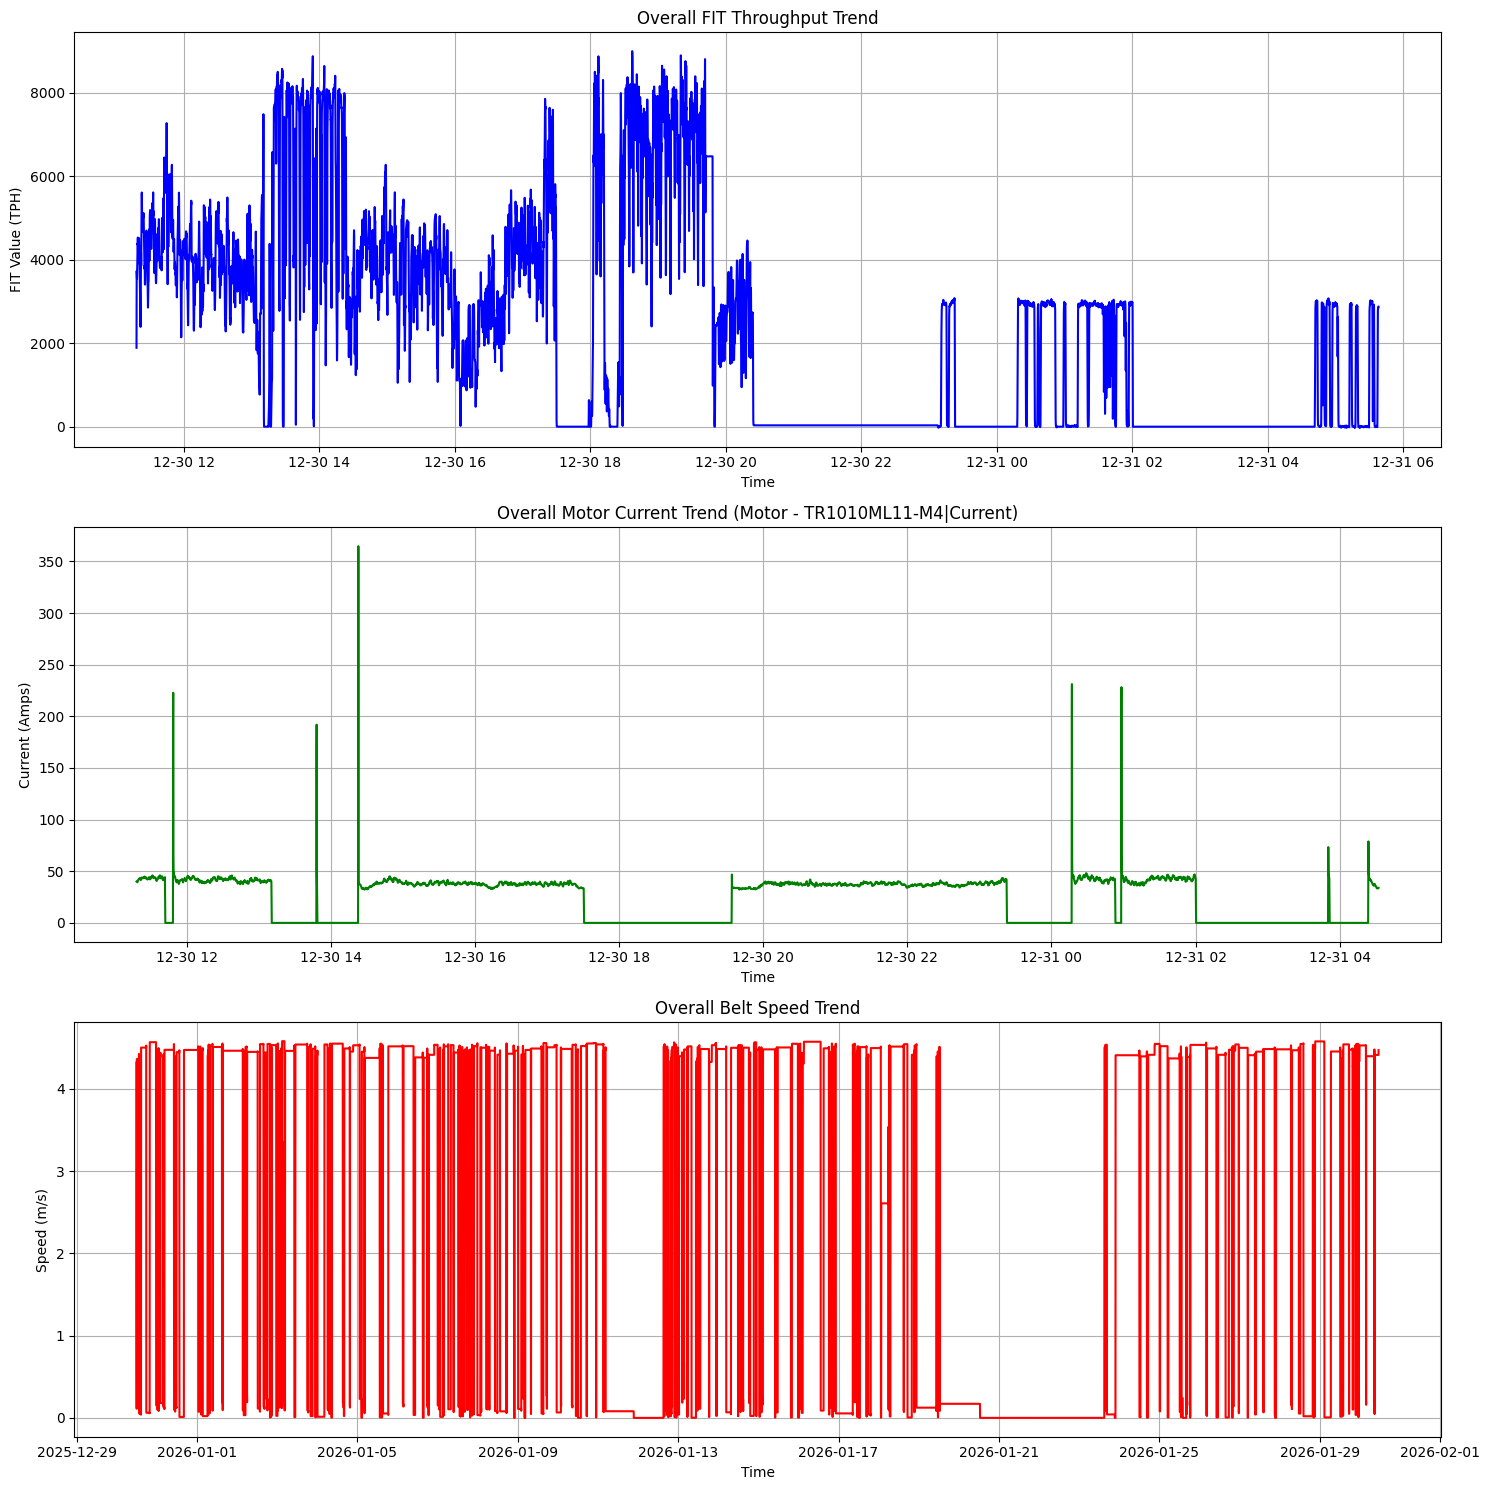

Overall time-series trend visualizations complete.


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with multiple subplots
plt.figure(figsize=(15, 15))

# Plot 1: Overall FIT Throughput Trend
plt.subplot(3, 1, 1) # 3 rows, 1 column, first plot
sns.lineplot(x=df_wide.index, y=df_wide['FIT'], color='blue')
plt.title('Overall FIT Throughput Trend')
plt.xlabel('Time')
plt.ylabel('FIT Value (TPH)')
plt.grid(True)

# Plot 2: Overall Motor Current Trend (Motor - TR1010ML11-M4)
motor_tag = 'Motor - TR1010ML11-M4|Current'
if motor_tag in df_wide.columns:
    plt.subplot(3, 1, 2) # 3 rows, 1 column, second plot
    sns.lineplot(x=df_wide.index, y=df_wide[motor_tag], color='green')
    plt.title(f'Overall Motor Current Trend ({motor_tag})')
    plt.xlabel('Time')
    plt.ylabel('Current (Amps)')
    plt.grid(True)
else:
    print(f"Warning: Motor tag '{motor_tag}' not found in df_wide. Skipping this plot.")

# Plot 3: Overall Belt Speed Trend
belt_speed_tag = 'Belt Scale Speed Sensor - TR1010ML11-SY1-BL01-SR01|Speed'
if belt_speed_tag in df_wide.columns:
    plt.subplot(3, 1, 3) # 3 rows, 1 column, third plot
    sns.lineplot(x=df_wide.index, y=df_wide[belt_speed_tag], color='red')
    plt.title('Overall Belt Speed Trend')
    plt.xlabel('Time')
    plt.ylabel('Speed (m/s)')
    plt.grid(True)
else:
    print(f"Warning: Belt speed tag '{belt_speed_tag}' not found in df_wide. Skipping this plot.")

plt.tight_layout()
plt.show()

print("Overall time-series trend visualizations complete.")